In [1]:
import csv
import datetime
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
archivo = 'ene_febDFde1a4.csv'
dataframefinal = pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' + archivo, sep = ',')
print(dataframefinal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40 non-null     int64  
 1   Unnamed: 0.1                  40 non-null     float64
 2   IRA_Alta                      40 non-null     float64
 3   Influenza                     40 non-null     float64
 4   Neumonia                      40 non-null     float64
 5   Bronquitis_bronquiolitis      40 non-null     float64
 6   Crisis_obstructiva_bronquial  40 non-null     float64
 7   Otra_causa_respiratoria       40 non-null     float64
 8   CAUSAS_SISTEMA_RESPIRATORIO   40 non-null     float64
 9   COVID19_Confirmado_u          40 non-null     float64
 10  COVID19_Confirmado_h          40 non-null     float64
 11  Humedad                       40 non-null     float64
 12  Rocio                         40 non-null     float64
 13  Tempera

In [2]:
import itertools
periodos = ['ene_feb','mar_abr','may_jun','jul_ago','sep_oct','nov_dic']
rangosetareos = ['DFtotaltodos','DFmenores','DFde1a4','DFde5a14','DFde15a64','DFde65ymas']
#la linea a continuacion es importantisima, crea un diccionario de dataframes y luego elimina las molestas columnas que se generan automaticamente 
diccionario = {x+y :pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' +x+y+ '.csv', sep = ',') for (x,y) in itertools.product(periodos,rangosetareos)}
for i in diccionario:
    del diccionario[i]["Unnamed: 0"]
    del diccionario[i]["Unnamed: 0.1"]

>## ***Importante***
>Para la creacion de los archivos .CSV que utilizo ademas del diccionario que creo aqui utilizo las claves para acceder a los valores autodescriptivos de la forma ***periodo-categoria*** donde los primeros 6 digitos hacen se refieren al periodo y los siguientes al rango de edad de la categoria al que pertenece siendo estos la concatenacion entre:
>>- ene_feb     
>>- mar_abr     
>>- may_jun 
>>- jul_ago  
>>- sep_oct
>>- nov_dic
>
>Cada periodos de dos en dos los meses del año y que comprenden 5 años desde ***2017 a 2021*** y los data frames
>
>>- DFtotaltodos: Todas las edades  
>>- DFmenores: Menores de 1 año
>>- DFde1a4: Niños de 1 a 4 años
>>- DFde5a14: Niños de 5 a 14 años
>>- DFde15a64: Adultos de 15 a 64 años
>>- DFde65ymas: Adultos mayores de 65 años
>

In [33]:
#del dataframefinal["Unnamed: 0"]
#del dataframefinal["Unnamed: 0.1"]
def algoritmo_dataframe(dataframefinal):
    print('----------------------')
    print('Media de cada variable')
    print('----------------------')
    print(dataframefinal.mean(axis=0))

    print('-------------------------')
    print('Varianza de cada variable')
    print('-------------------------')
    print(dataframefinal.var(axis=0))
    plt.style.use('seaborn-whitegrid')
    dataframefinal.plot(x=None, y=["MP10", "MP2.5"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad (microgramos por metro cubico)", fontsize=25)

    plt.show()
    dataframefinal.plot(x=None, y=["Temperatura", "Rocio", "Temperatura_min", "Temperatura_max"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Grados Celcius", fontsize=25)

    plt.show()
    
    plt.style.use('tableau-colorblind10')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["Humedad"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Porcentaje", fontsize=25)  #revisar porcentaje

    plt.show()
    #-------------------------------$$$$-------------------------------------
    plt.style.use('classic')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["IRA_Alta", "Influenza","Neumonia", "Bronquitis_bronquiolitis", "Crisis_obstructiva_bronquial",
                                   "Otra_causa_respiratoria", "CAUSAS_SISTEMA_RESPIRATORIO", "COVID19_Confirmado_u",
                                   "COVID19_Confirmado_h"], fontsize=20, kind="line",figsize=(20, 10))
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad de Diagnosticados", fontsize=25)  #revisar porcentaje

    # display plot
    plt.show()
    #normalizar usando standartscaler para comparar se puede utilizar print y return para ver el frame y su describe para comprobar que cumpla con una media 0 y std de 1
    plt.style.use('seaborn-whitegrid')
    
    matplotlib.rcParams.update(matplotlib.rcParamsDefault) # reset estilo a los valores por defecto
        
    normaliza2 = StandardScaler().fit_transform(dataframefinal)

    frame = pd.DataFrame(data = normaliza2,
                        index = None,
                        columns = dataframefinal.columns.values)
    display('     *** DataFrame normalizado a continuacion***',frame)
    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(dataframefinal)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']
    #modelo_pca.components_
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    dataframe_total_componentes = pd.DataFrame(
        data    = modelo_pca.components_,
        columns = dataframefinal.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
    )
    display('     *** DataFrame con todos los componentes principales PCA ***',dataframe_total_componentes)
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))    # aqui cambie el dato, original (8,4)
    componentes = modelo_pca.components_
    plt.imshow(componentes.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
    plt.xticks(range(len(dataframefinal.columns)), np.arange(modelo_pca.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();
    plt.show()
    # Porcentaje de varianza explicada por cada componente
    # ==============================================================================
    #print('----------------------------------------------------')
    #print('Porcentaje de varianza explicada por cada componente')
    #print('----------------------------------------------------')
    #print(modelo_pca.explained_variance_ratio_)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.bar(
        x      = np.arange(modelo_pca.n_components_) + 1,
        height = modelo_pca.explained_variance_ratio_
    )
    plt.show()
    
    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
        label = round(y, 2)
        ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_ylim(0, 1.1)
    ax.set_title('Porcentaje de varianza explicada por cada componente')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza explicada');
    plt.show() #####
    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
    print('------------------------------------------')
    print('Porcentaje de varianza explicada acumulada')
    print('------------------------------------------')
    print(prop_varianza_acum)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(
        np.arange(len(dataframefinal.columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
    )

    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )

    ax.set_ylim(0, 1.1)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_title('Porcentaje de varianza explicada acumulada')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza acumulada');
    plt.show()  ##### ojo aqui
    # Proyección de las observaciones de entrenamiento
    # ==============================================================================
    proyecciones = pca_pipe.transform(X=dataframefinal)
    proyecciones = pd.DataFrame(
        proyecciones,
        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
        index   = dataframefinal.index
    )
    #proyecciones.head()
    #Cambiando el numero de componentes a 4 o 6
    pca_pipe2 = make_pipeline(StandardScaler(), PCA(n_components=4))
    pca_pipe2.fit(dataframefinal)
    # Se extrae el modelo entrenado del pipeline
    modelo_pca2 = pca_pipe2.named_steps['pca']
    #modelo_pca.components_
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    pcadataframe = pd.DataFrame(
        data    = modelo_pca2.components_,
        columns = dataframefinal.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4'])
    #modelo_pca2.components_.index()
    display('     *** DataFrame 4 componentes principales a continuacion ***',pcadataframe)
    
    plt.figure(figsize=(8,6))
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[1,:], s=9**2, c=["Blue"], alpha=0.6)
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[2,:], s=9**2, c=["green"], alpha=0.6)
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[3,:], s=9**2, c=["red"], alpha=0.6)
    plt.subplot().legend(['PC2','PC3','PC4'])
    plt.xlabel('Primer componente PC1')
    plt.ylabel('Componentes secundarias')
    plt.show()
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
    componentes2 = modelo_pca2.components_
    plt.imshow(componentes2.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
    plt.xticks(range(4), np.arange(modelo_pca2.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();
    plt.show()
    
        #return

## A partir de aqui se realiza el analisis exploratorio de los datos
Por cada celda se llama a la funcion definida mas arriba y esta despliega la informacion en el siguiente orden
>- Media de cada variable    
>- Varianza de cada variable
>- Grafico de variables contaminantes
>- Grafico de variables ambientales
>- Grafico de Humedad
>- Grafico de cantidad de enfermedades
>- DataFrame con variables normalizadas
>- DataFrame con componentes principales PCA
>- Mapa de calor componentes principales PCA
>- Grafico de representacion de varianza de cada componente
>- Grafico de varianza acumulada de las componentes (muestra un valor medio de 73% de representacion en 4 componentes)
>- DataFrame para las primeras 4 componentes
>- Grafico muestra las 4 componentes en el plano cartesiano
>- Mapa de calor para esas 4 componentes

### - Categoria: Todas las edades
### - Periodo: Enero - Febrero (8 semanas por 5 años)

----------------------
Media de cada variable
----------------------
IRA_Alta                        63.8750
Influenza                        1.8500
Neumonia                         6.6000
Bronquitis_bronquiolitis        13.9250
Crisis_obstructiva_bronquial    13.1000
Otra_causa_respiratoria          9.5000
CAUSAS_SISTEMA_RESPIRATORIO      7.4000
COVID19_Confirmado_u             3.6000
COVID19_Confirmado_h             2.1000
Humedad                         65.5950
Rocio                           11.4150
Temperatura                     18.6725
Temperatura_min                 13.8150
Temperatura_max                 26.8125
MP10                            29.9325
MP2.5                            9.1300
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        387.394231
Influenza                         4.643590
Neumonia                          8.605128
Bronquitis_bronquiolitis         57.353205
Crisis_obstructiva_bronqui

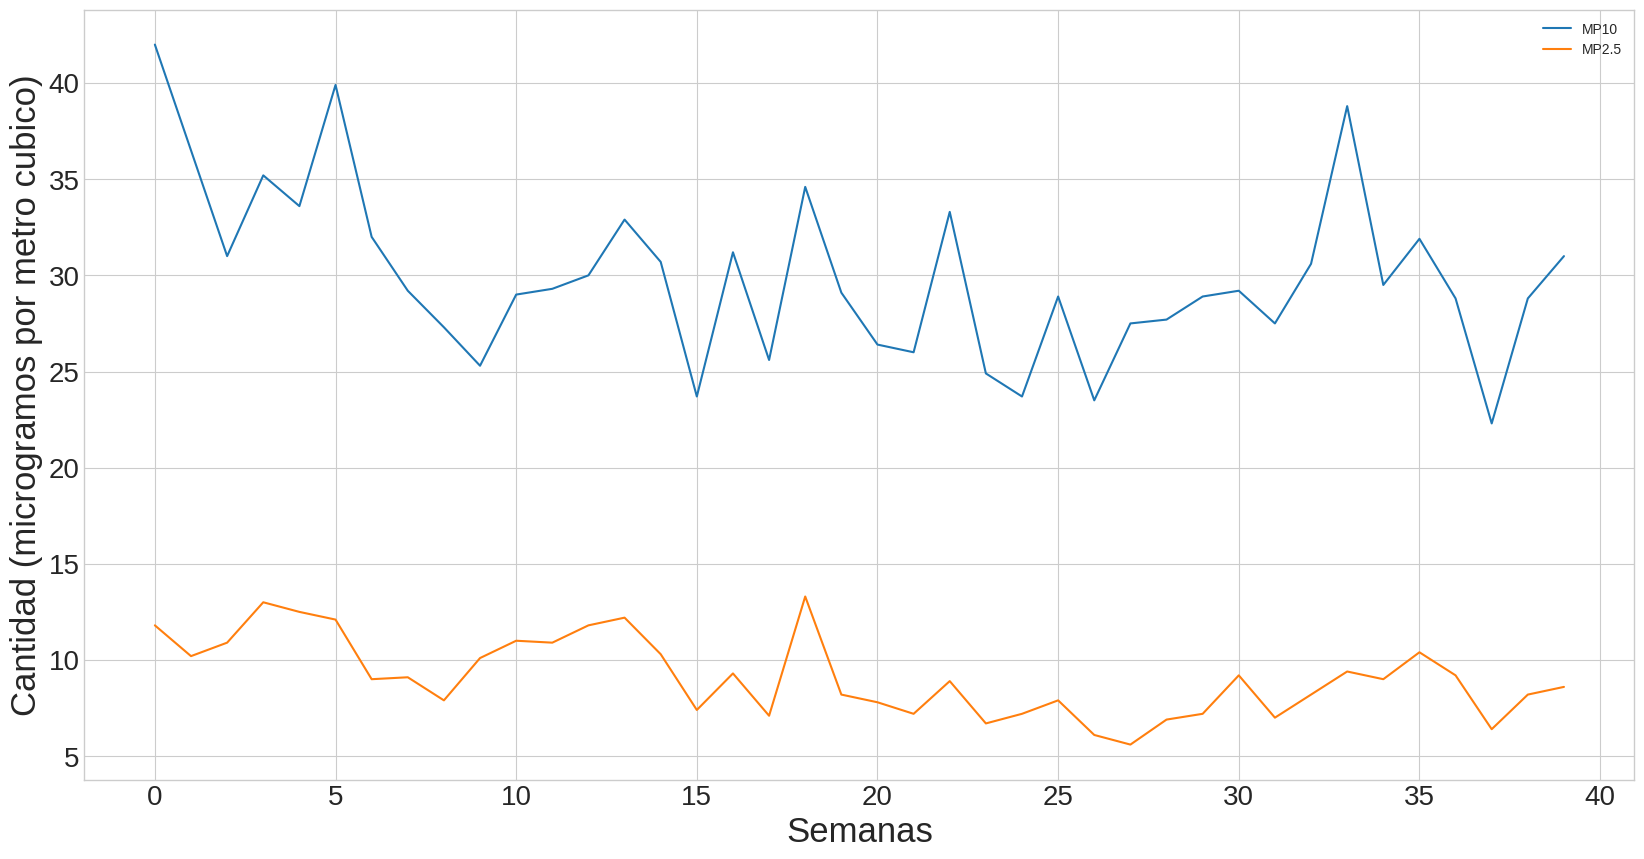

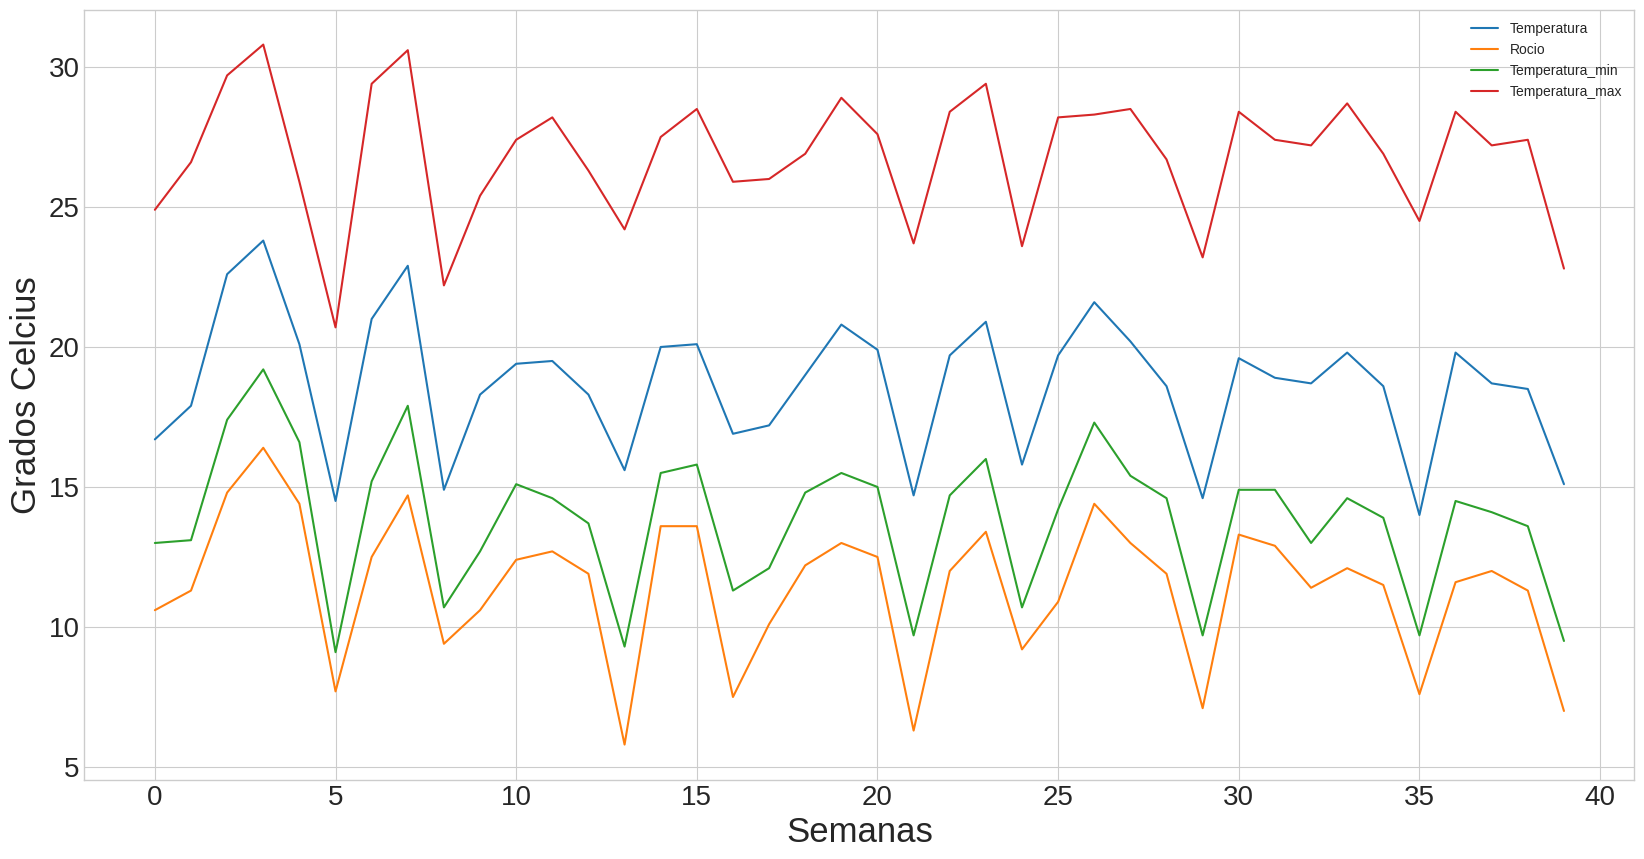

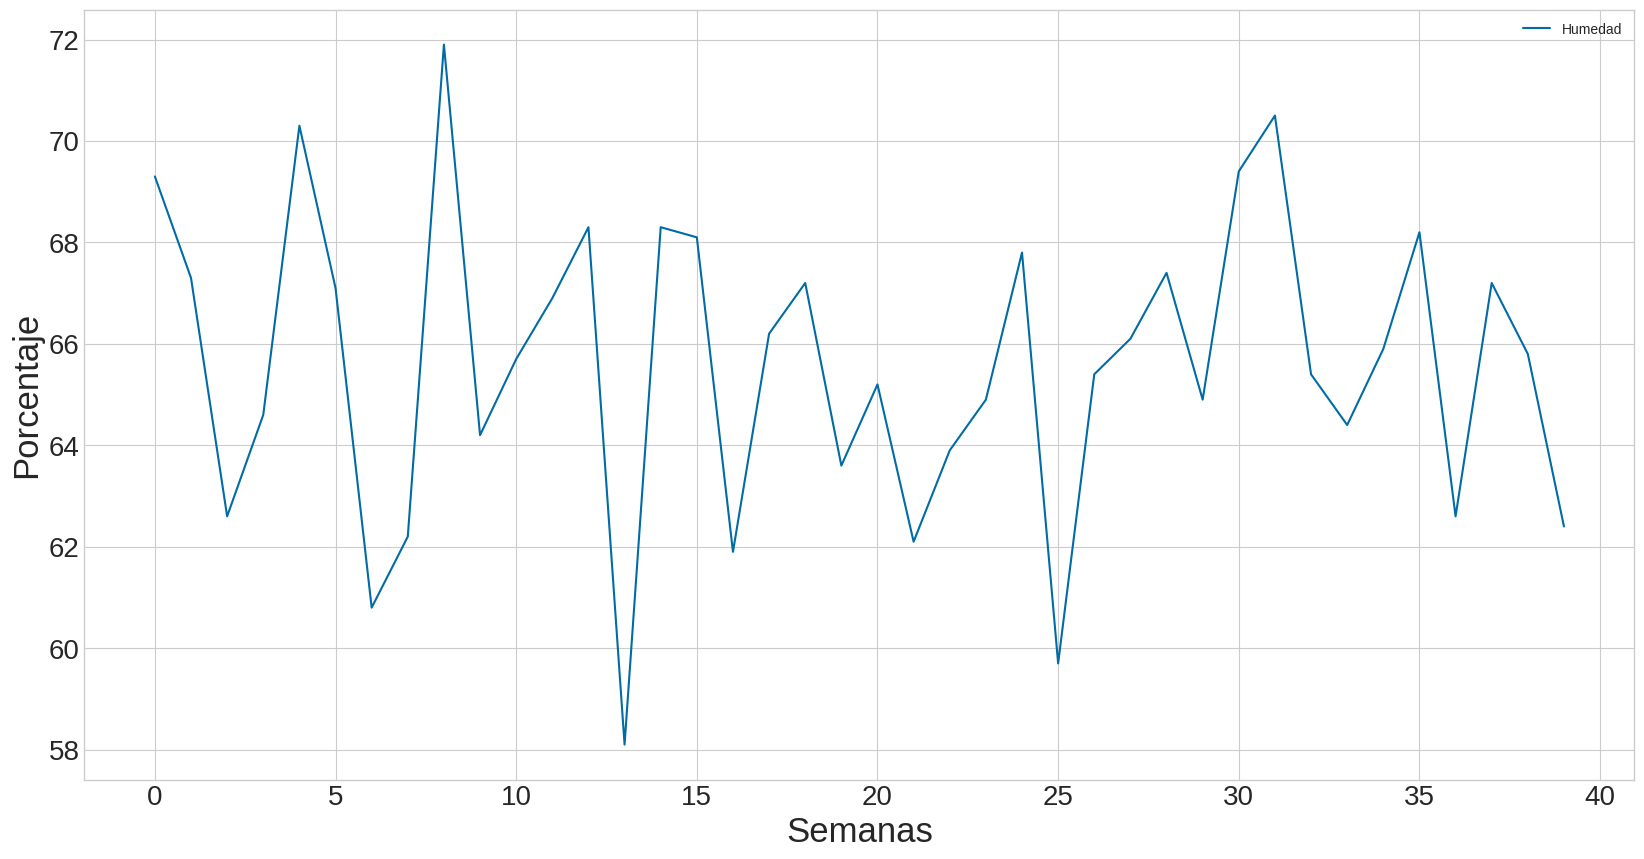

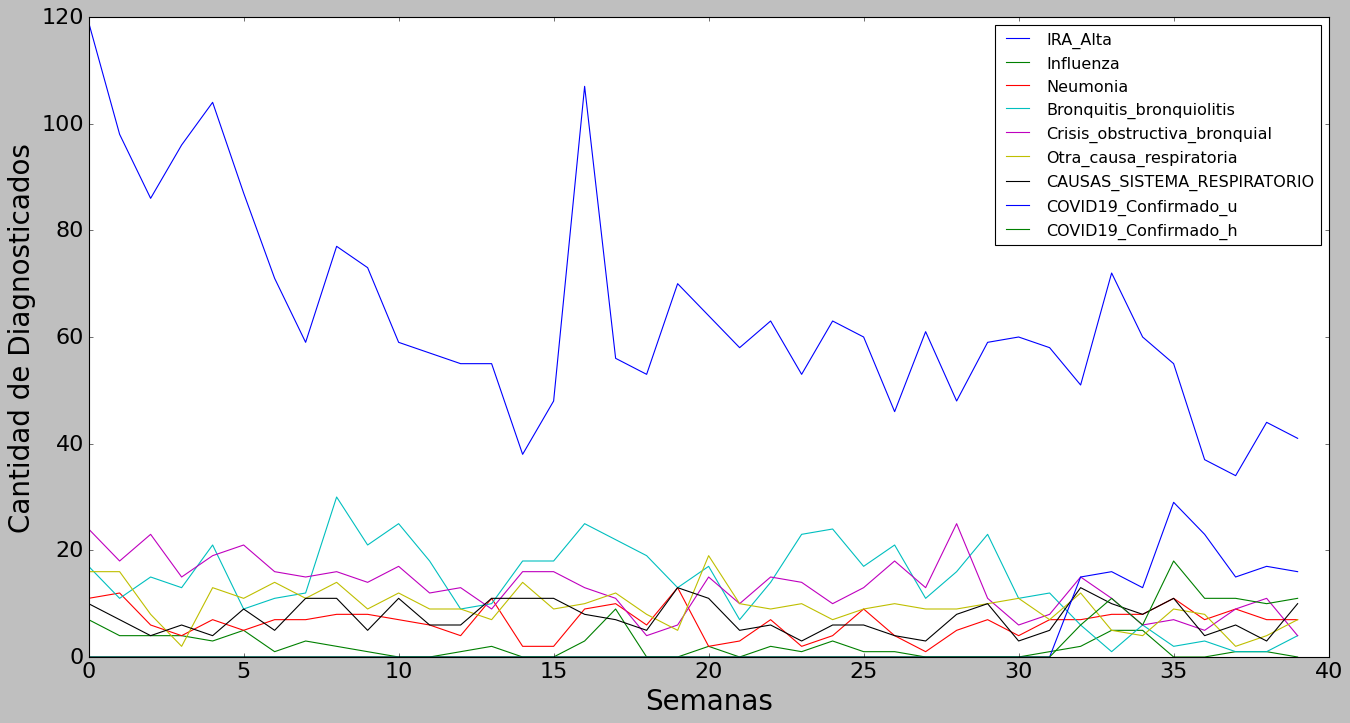

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.836415   2.420349  1.519049                  0.411210   
1   1.755876   1.010437  1.864287                 -0.391151   
2   1.138425   1.010437 -0.207143                  0.143756   
3   1.652967   1.010437 -0.897620                 -0.123697   
4   2.064601   0.540466  0.138095                  0.946118   
5   1.189879   1.480408 -0.552381                 -0.658605   
6   0.366611  -0.399475  0.138095                 -0.391151   
7  -0.250839   0.540466  0.138095                 -0.257424   
8   0.675337   0.070496  0.483334                  2.149660   
9   0.469520  -0.399475  0.483334                  0.946118   
10 -0.250839  -0.869446  0.138095                  1.481026   
11 -0.353748  -0.869446 -0.207143                  0.544937   
12 -0.456656  -0.399475 -0.897620                 -0.658605   
13 -0.456656   0.070496  1.519049                 -0.524878   
14 -1.331378  -0.869446 -1.588096                  0.544937   
15 -0.816836  -0.869446 -1.588096                  0.544937   
16  2.218964   0.540466  0.828572                  1.481026   
17 -0.405202   3.360290  1.173810                  1.079845   
18 -0.559565  -0.869446 -0.207143                  0.678664   
19  0.315157  -0.869446  2.209525                 -0.123697   
20  0.006432   0.070496 -1.588096                  0.411210   
21 -0.302294  -0.869446 -1.242858                 -0.926059   
22 -0.045022   0.070496  0.138095                  0.010030   
23 -0.559565  -0.399475 -1.588096                  1.213572   
24 -0.045022   0.540466 -0.897620                  1.347299   
25 -0.199385  -0.399475  0.828572                  0.411210   
26 -0.919744  -0.399475 -0.897620                  0.946118   
27 -0.147931  -0.869446 -1.933335                 -0.391151   
28 -0.816836  -0.869446 -0.552381                  0.277483   
29 -0.250839  -0.869446  0.138095                  1.213572   
30 -0.199385  -0.869446 -0.897620                 -0.391151   
31 -0.302294  -0.399475  0.138095                 -0.257424   
32 -0.662473   0.070496  0.138095                 -1.059786   
33  0.418066   1.480408  0.483334                 -1.728420   
34 -0.199385   1.480408  0.483334                 -1.059786   
35 -0.456656  -0.869446  1.519049                 -1.594694   
36 -1.382833  -0.869446  0.138095                 -1.460967   
37 -1.537195  -0.399475  0.828572                 -1.728420   
38 -1.022653  -0.399475  0.138095                 -1.728420   
39 -1.177016  -0.869446  0.138095                 -1.327240   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       2.088445                 1.799319   
1                       0.938842                 1.799319   
2                       1.896844                -0.415227   
3                       0.364041                -2.076137   
4                       1.130442                 0.968864   
5                       1.513643                 0.415227   
6                       0.555641                 1.245682   
7                       0.364041                 0.415227   
8                       0.555641                 1.245682   
9                       0.172440                -0.138409   
10                      0.747242                 0.692046   
11                     -0.210760                -0.138409   
12                     -0.019160                -0.138409   
13                     -0.785562                -0.692046   
14                      0.555641                 1.245682   
15                      0.555641                -0.138409   
16                     -0.019160                 0.138409   
17                     -0.402361                 0.692046   
18                     -1.743564                -0.415227   
19                     -1.360363                -1.245682   
20                      0.364041                 2.629774   
21                     -0.593961                 0.138409   
22               

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  -0.072352   0.002727  0.217350                 -0.184044   
PC2   0.402539   0.270159  0.103464                  0.296198   
PC3   0.260344   0.283743  0.302923                 -0.326447   
PC4   0.047319  -0.002304  0.247665                  0.087800   
PC5  -0.158518   0.003305  0.229631                  0.047381   
PC6   0.185668   0.623408  0.299169                  0.072171   
PC7   0.006834  -0.110343  0.440373                  0.378323   
PC8  -0.155441   0.342104 -0.441322                 -0.096798   
PC9  -0.192714   0.489362 -0.256632                 -0.107533   
PC10  0.125481  -0.237915  0.176062                 -0.570488   
PC11  0.687141  -0.173648 -0.394173                  0.225383   
PC12 -0.390210   0.000124  0.016047                  0.462550   
PC13 -0.018271  -0.031672  0.071041                 -0.013661   
PC14  0.013072  -0.028424  0.012939                  0.012911   
PC15 -0.011718   0.024280  0.000962                 -0.044023   
PC16 -0.030795  -0.000034  0.018023                 -0.010275   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      -0.213536                -0.068157   
PC2                       0.307590                 0.327371   
PC3                       0.024564                -0.151248   
PC4                      -0.183036                -0.213659   
PC5                       0.202529                 0.354340   
PC6                       0.076072                -0.161945   
PC7                      -0.467240                -0.307984   
PC8                       0.153582                -0.608897   
PC9                      -0.651524                 0.420706   
PC10                     -0.095717                -0.046013   
PC11                     -0.291492                -0.069624   
PC12                      0.019148                -0.110794   
PC13                     -0.131291                 0.062870   
PC14                      0.018049                -0.044381   
PC15                     -0.012496                 0.004335   
PC16                      0.016744                 0.009455   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.169995              0.275005              0.283458   
PC2                      0.137420             -0.307125             -0.304972   
PC3                      0.053672              0.245514              0.242290   
PC4                     -0.024130             -0.268770             -0.269120   
PC5                      0.750895              0.121856              0.102371   
PC6                     -0.245463              0.070580              0.081621   
PC7                      0.256889             -0.112900             -0.093930   
PC8                      0.447902             -0.148248             -0.120926   
PC9                      0.047273             -0.068588             -0.125922   
PC10                     0.076981             -0.347984             -0.303848   
PC11                     0.188555              0.168036              0.179683   
PC12                    -0.118440              0.041188              0.065936   
PC13                    -0.013610              0.006105              0.034262   
PC14                    -0.002557              0.667254             -0.674769   
PC15                     0.009044              0.201894             -0.227945   
PC16                    -0.005964             -0.034958              0.040823   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  -0.036854 -0.423725    -0.419453        -0.431286        -0.361918   
PC2   0.106034 -0.132815    -0.172611        -0.148005        -0.246980   
PC3  -0.097515  0.157332     0.190243         0.172030         0.202075   
PC4  -0.791684 -0.217109     0.085753        -0.069342         0.124830   
PC5  -0.150284  0.063887     0.113000         0.083732         0.174489   


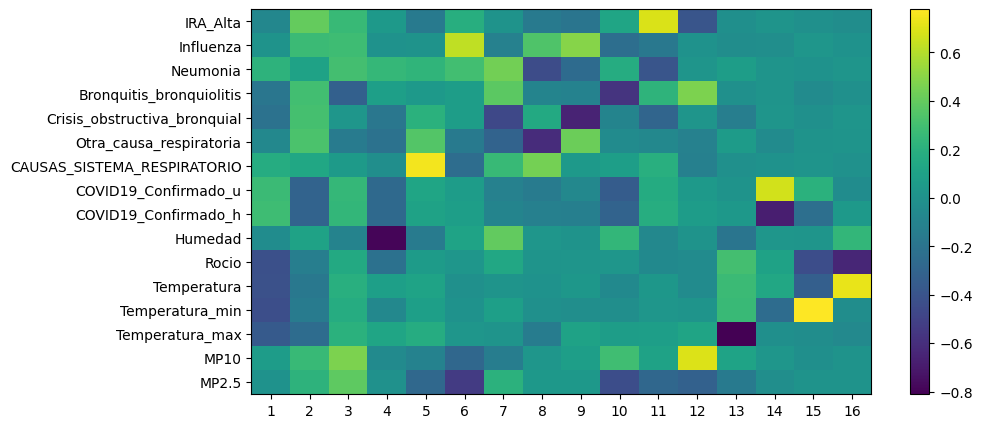

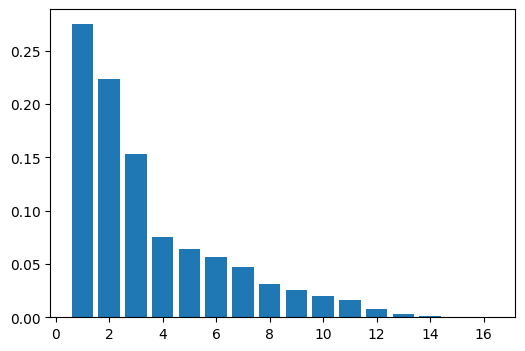

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27511666 0.49822541 0.65141619 0.72682816 0.7909854  0.84754783
 0.89437435 0.9258889  0.95111243 0.97077929 0.98672664 0.99495317
 0.99825642 0.99927479 0.99989187 1.        ]


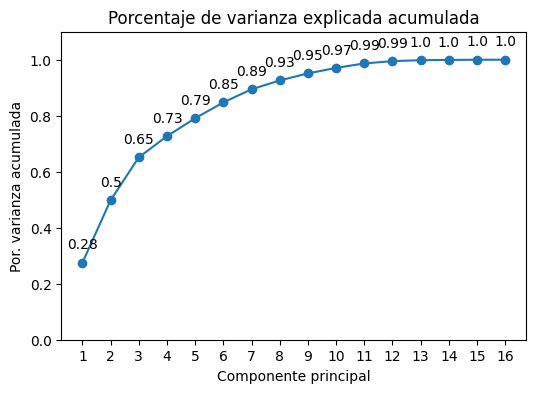

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.072352   0.002727  0.217350                 -0.184044   
PC2  0.402539   0.270159  0.103464                  0.296198   
PC3  0.260344   0.283743  0.302923                 -0.326447   
PC4  0.047319  -0.002304  0.247665                  0.087800   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.213536                -0.068157   
PC2                      0.307590                 0.327371   
PC3                      0.024564                -0.151248   
PC4                     -0.183036                -0.213659   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.169995              0.275005              0.283458   
PC2                     0.137420             -0.307125             -0.304972   
PC3                     0.053672              0.245514              0.242290   
PC4                    -0.024130             -0.268770             -0.269120   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.036854 -0.423725    -0.419453        -0.431286        -0.361918   
PC2  0.106034 -0.132815    -0.172611        -0.148005        -0.246980   
PC3 -0.097515  0.157332     0.190243         0.172030         0.202075   
PC4 -0.791684 -0.217109     0.085753        -0.069342         0.124830   

         MP10     MP2.5  
PC1  0.068505 -0.000220  
PC2  0.262928  0.218687  
PC3  0.467711  0.385230  
PC4 -0.051382 -0.005141

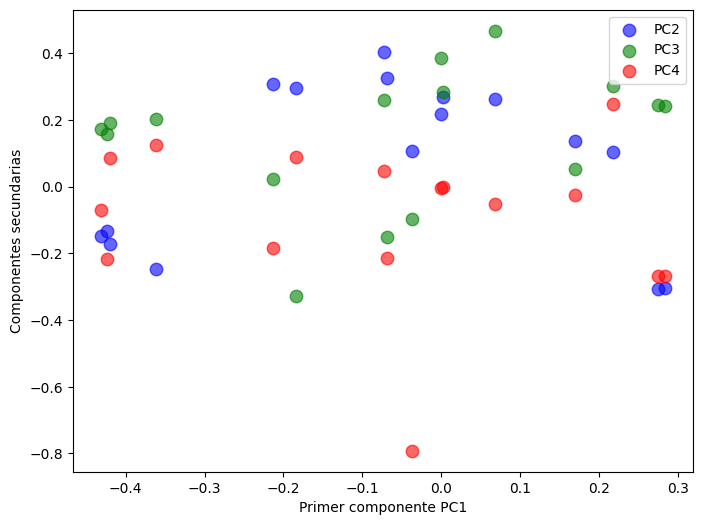

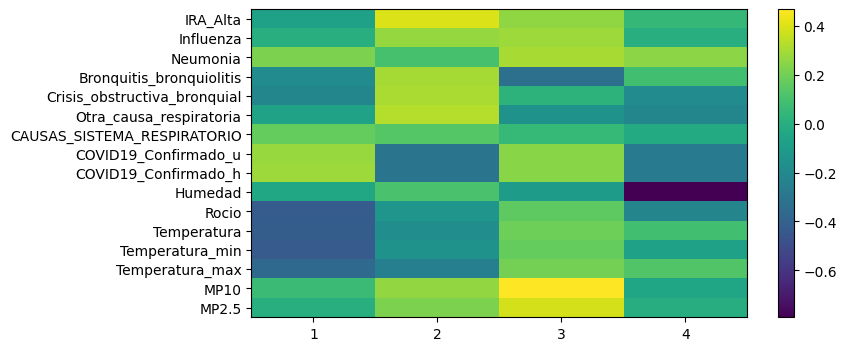

In [34]:
algoritmo_dataframe(diccionario['ene_febDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Marzo - Abril (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        93.155556
Influenza                        3.111111
Neumonia                         6.622222
Bronquitis_bronquiolitis        31.288889
Crisis_obstructiva_bronquial    16.311111
Otra_causa_respiratoria         11.266667
CAUSAS_SISTEMA_RESPIRATORIO      7.044444
COVID19_Confirmado_u             7.133333
COVID19_Confirmado_h             3.800000
Humedad                         68.904444
Rocio                           10.371111
Temperatura                     16.728889
Temperatura_min                 11.942222
Temperatura_max                 24.851111
MP10                            36.442222
MP2.5                           11.591111
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        1581.952525
Influenza                         14.328283
Neumonia                          10.467677
Bronquitis_bronquiolitis         7

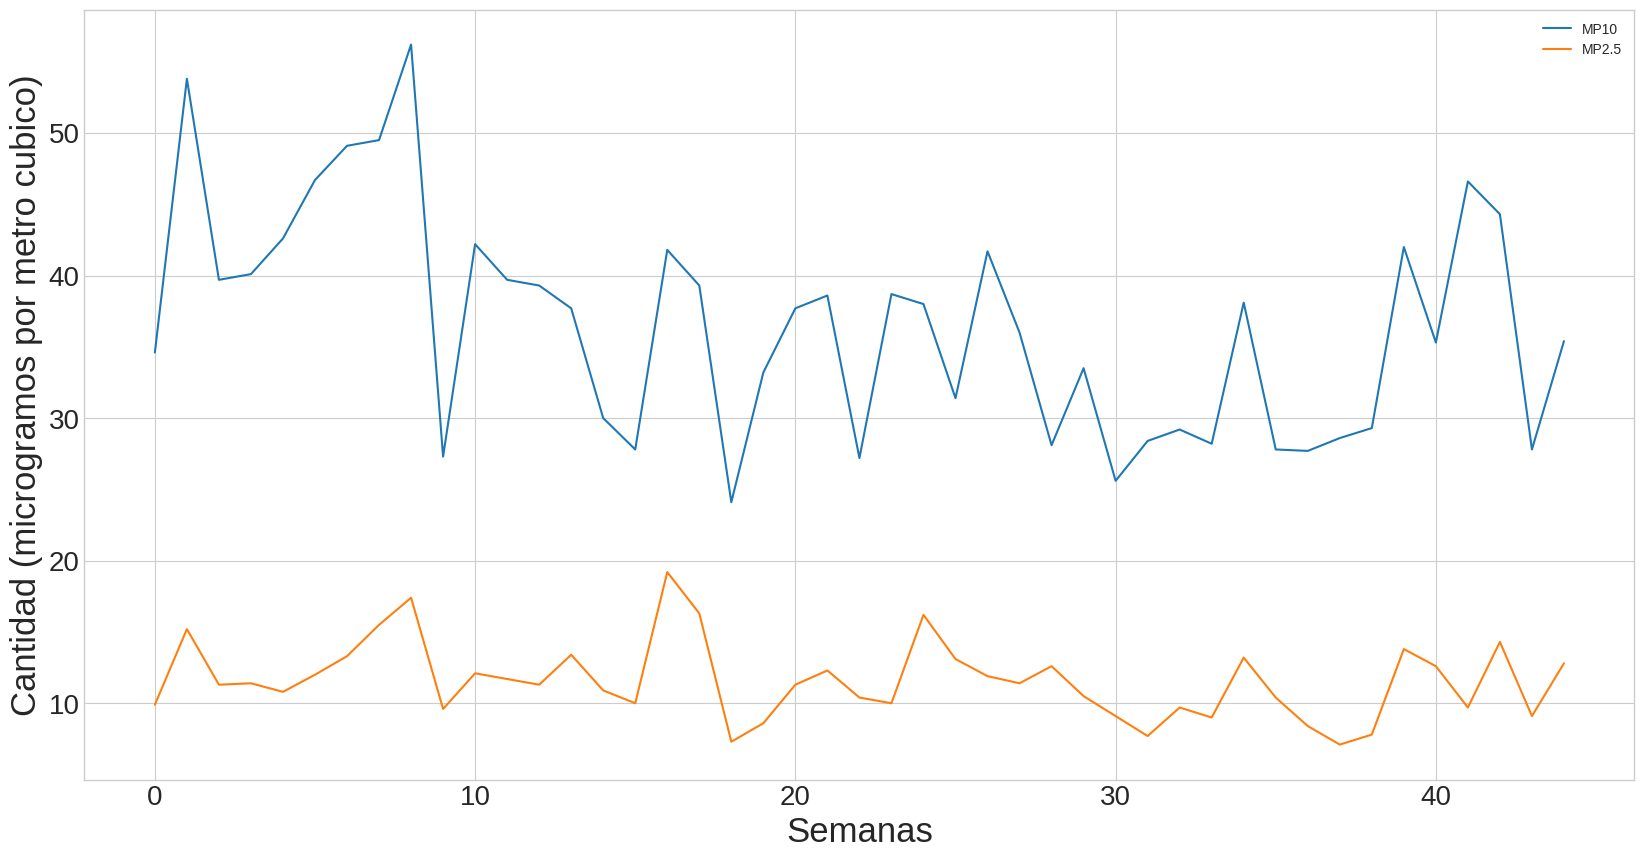

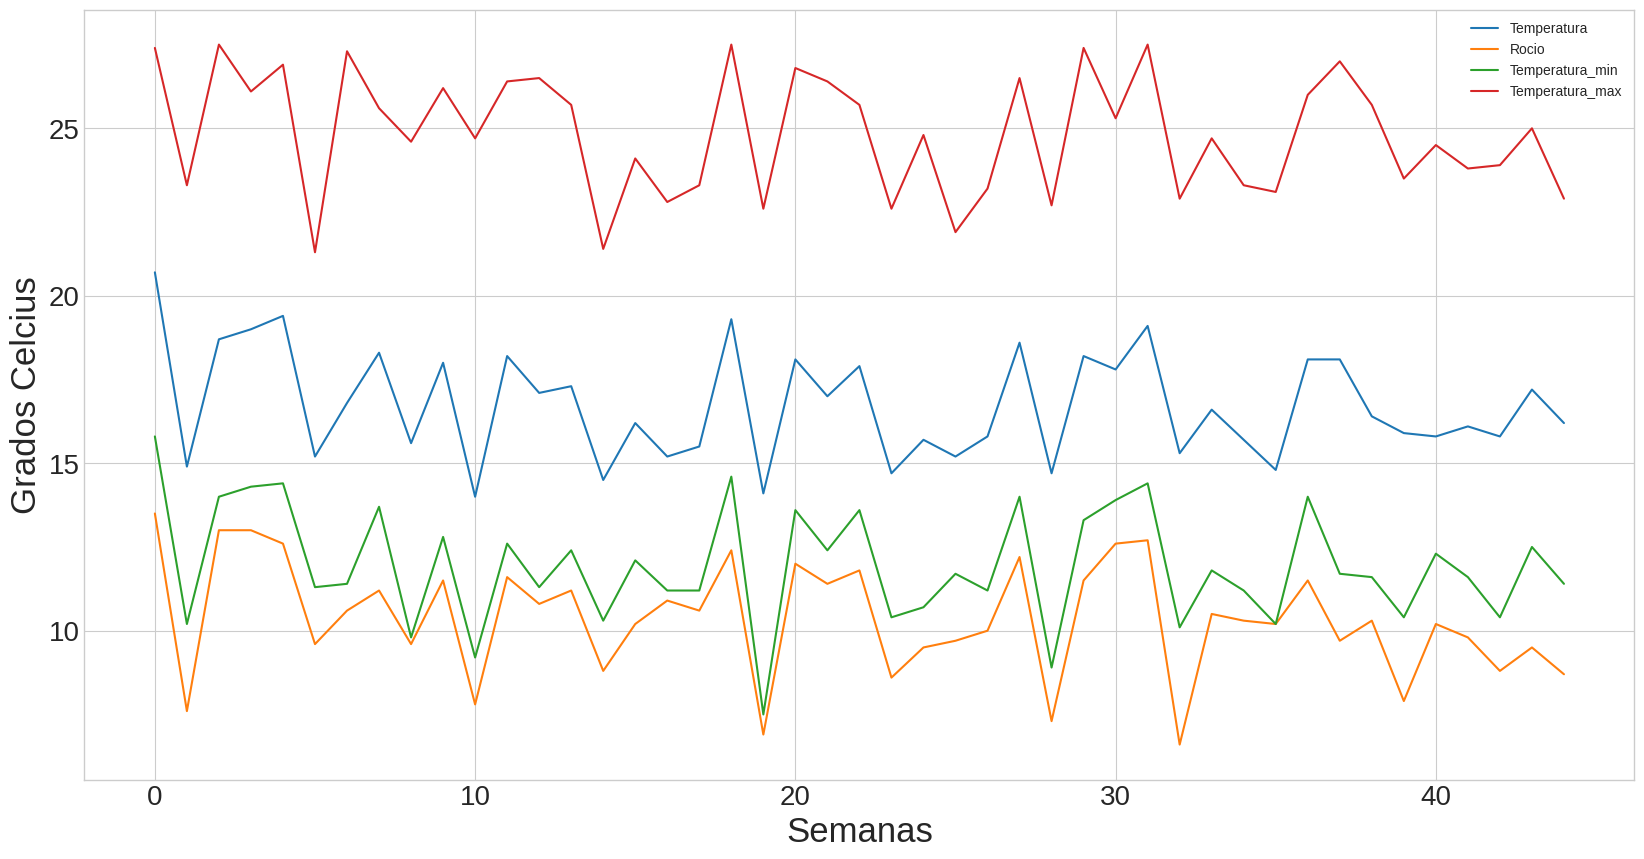

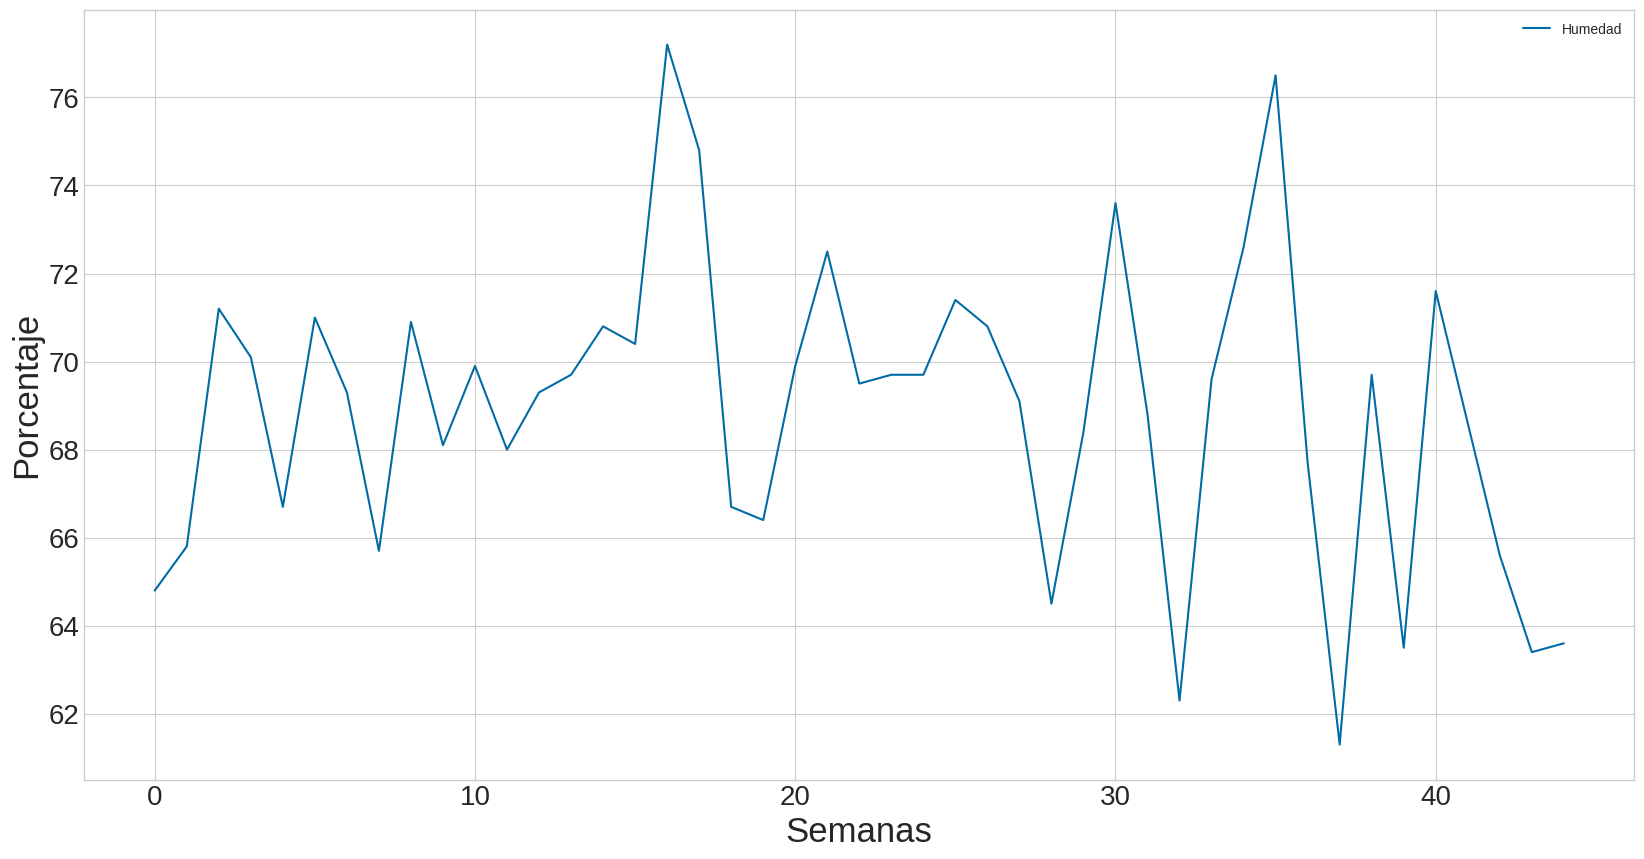

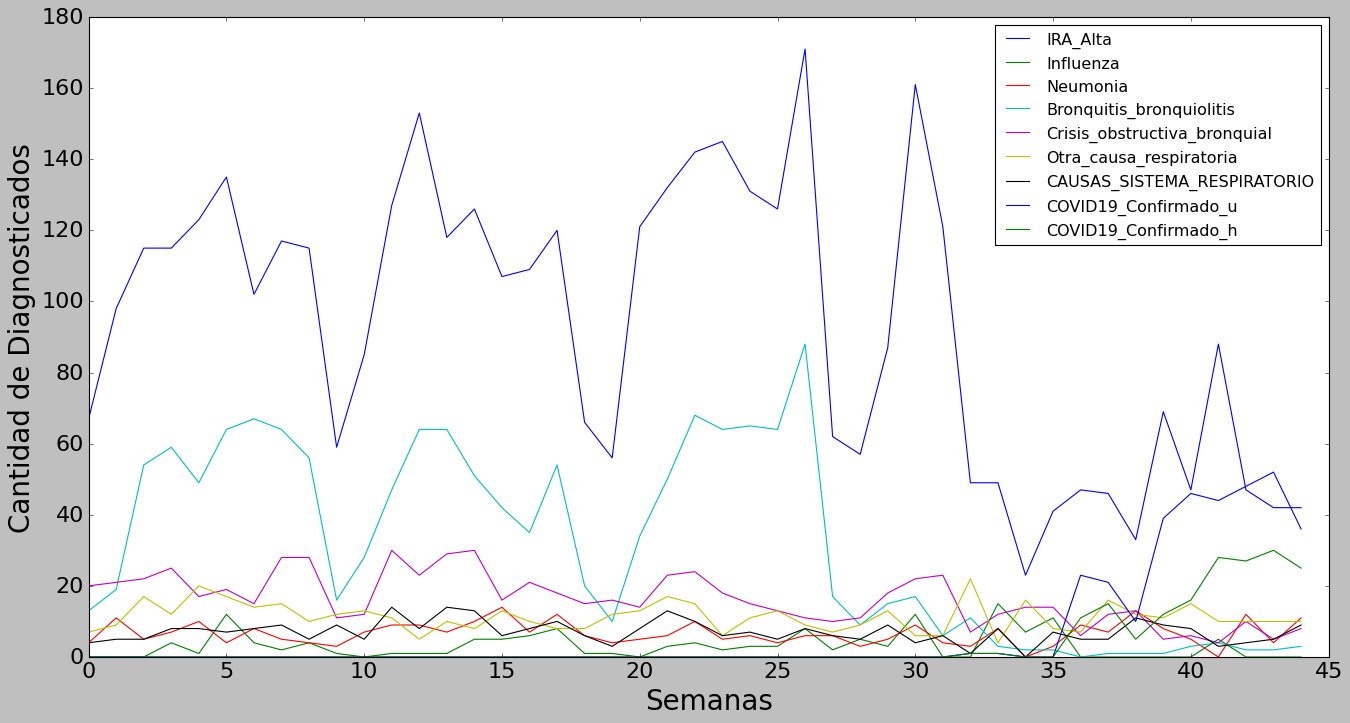

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0  -0.665039  -0.831186 -0.819642                 -0.695896   
1   0.123176  -0.831186  1.368386                 -0.467595   
2   0.555423  -0.831186 -0.507067                  0.864163   
3   0.555423   0.237482  0.118084                  1.054414   
4   0.758834  -0.564019  1.055810                  0.673911   
5   1.063949   2.374818 -0.819642                  1.244665   
6   0.224882   0.237482  0.430659                  1.358815   
7   0.606276  -0.296852 -0.507067                  1.244665   
8   0.555423   0.237482 -0.819642                  0.940263   
9  -0.868449  -0.564019 -1.132217                 -0.581745   
10 -0.207366  -0.831186  0.118084                 -0.125143   
11  0.860539  -0.564019  0.743235                  0.597811   
12  1.521623  -0.564019  0.743235                  1.244665   
13  0.631702  -0.564019  0.118084                  1.244665   
14  0.835113   0.504649  1.055810                  0.750012   
15  0.352013   0.504649  2.306112                  0.407560   
16  0.402866   0.771816  0.118084                  0.141209   
17  0.682555   1.306150  1.680961                  0.864163   
18 -0.690465  -0.564019 -0.194491                 -0.429545   
19 -0.944728  -0.564019 -0.819642                 -0.810047   
20  0.707981  -0.831186 -0.507067                  0.103158   
21  0.987671  -0.029685 -0.194491                  0.711962   
22  1.241934   0.237482  1.055810                  1.396865   
23  1.318212  -0.296852 -0.507067                  1.244665   
24  0.962244  -0.029685 -0.194491                  1.282715   
25  0.835113  -0.029685 -0.819642                  1.244665   
26  1.979296   1.306150 -0.194491                  2.157870   
27 -0.792171  -0.296852 -0.194491                 -0.543695   
28 -0.919302   0.504649 -1.132217                 -0.848097   
29 -0.156513  -0.029685 -0.507067                 -0.619796   
30  1.725033   2.374818  0.743235                 -0.543695   
31  0.707981  -0.831186 -0.819642                 -0.962248   
32 -1.122712  -0.831186 -1.132217                 -0.771996   
33 -1.122712   3.176319  0.430659                 -1.076398   
34 -1.783796   1.038983 -2.069944                 -1.114448   
35 -1.326123   2.107651 -1.132217                 -1.114448   
36 -1.173565  -0.831186  0.743235                 -1.190549   
37 -1.198991  -0.831186  0.118084                 -1.152499   
38 -1.529533  -0.831186  1.993536                 -1.152499   
39 -0.614186  -0.831186  0.430659                 -1.152499   
40 -1.173565  -0.831186 -0.507067                 -1.076398   
41 -0.131087   0.504649 -2.069944                 -1.038348   
42 -1.173565  -0.831186  1.680961                 -1.114448   
43 -1.300697  -0.831186 -0.819642                 -1.114448   
44 -1.300697  -0.831186  1.368386                 -1.076398   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       0.521035                -1.081180   
1                       0.662279                -0.574377   
2                       0.803523                 1.452835   
3                       1.227256                 0.185828   
4                       0.097302                 2.213040   
5                       0.379790                 1.452835   
6                      -0.185187                 0.692631   
7                       1.650989                 0.946032   
8                       1.650989                -0.320975   
9                      -0.750164                 0.185828   
10                     -0.608920                 0.439229   
11                      1.933478                -0.067574   
12                      0.944767                -1.587983   
13                      1.792233                -0.320975   
14                      1.933478                -0.827778   
15                     -0.043943                 0.439229   
16                      0.662279                -0.320975   
17     

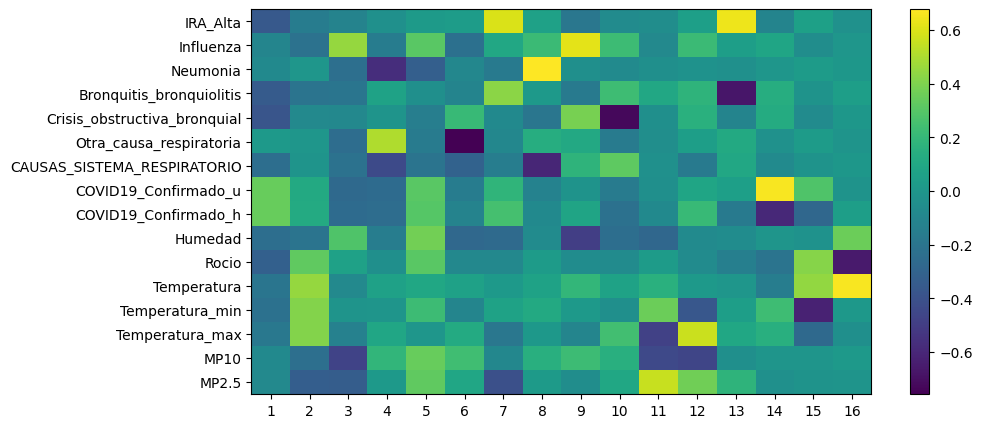

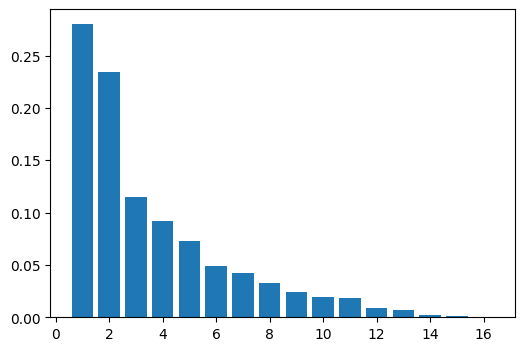

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28016922 0.51435611 0.62953278 0.72112481 0.7942299  0.84333021
 0.88523239 0.918274   0.9428594  0.96231717 0.98039522 0.98949253
 0.99666269 0.9984874  0.999885   1.        ]


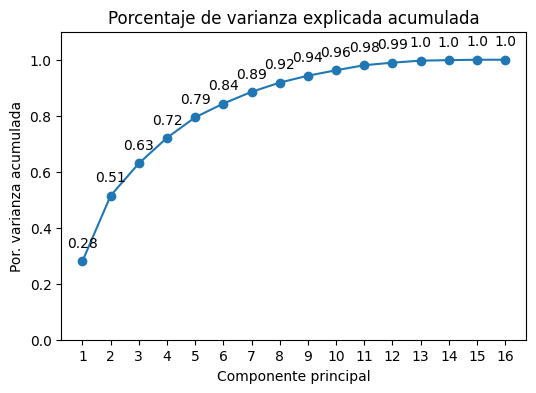

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.358751  -0.105541 -0.078256                 -0.346128   
PC2 -0.154894  -0.214835 -0.001898                 -0.205987   
PC3 -0.118232   0.452353 -0.231568                 -0.202353   
PC4 -0.039969  -0.156812 -0.572274                  0.070892   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.380546                 0.016542   
PC2                     -0.083862                -0.005553   
PC3                     -0.085315                -0.247279   
PC4                     -0.014756                 0.505786   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                    -0.237145              0.345841              0.344437   
PC2                    -0.012057              0.114881              0.122488   
PC3                    -0.218502             -0.269886             -0.254318   
PC4                    -0.434519             -0.254836             -0.245434   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.239638 -0.317398    -0.197648        -0.224160        -0.185415   
PC2 -0.206632  0.328236     0.450691         0.409317         0.410544   
PC3  0.281157  0.063043    -0.079611        -0.013758        -0.125625   
PC4 -0.146911 -0.040104     0.062889        -0.006396         0.089640   

         MP10     MP2.5  
PC1 -0.075425 -0.084336  
PC2 -0.234796 -0.327469  
PC3 -0.466528 -0.331907  
PC4  0.188948  0.018471

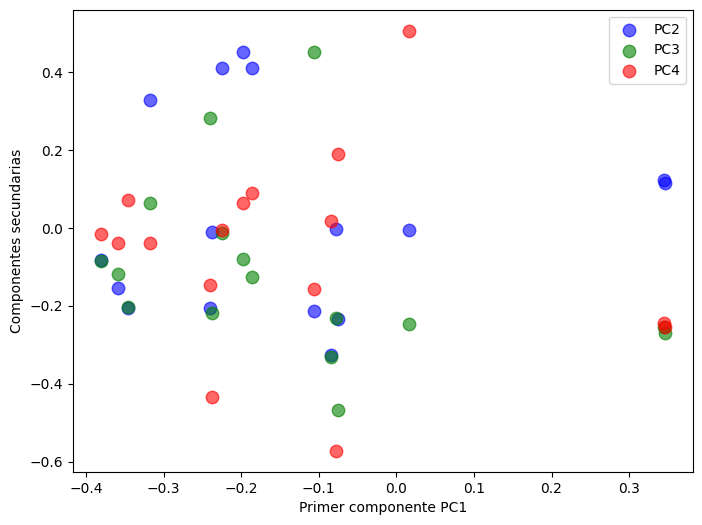

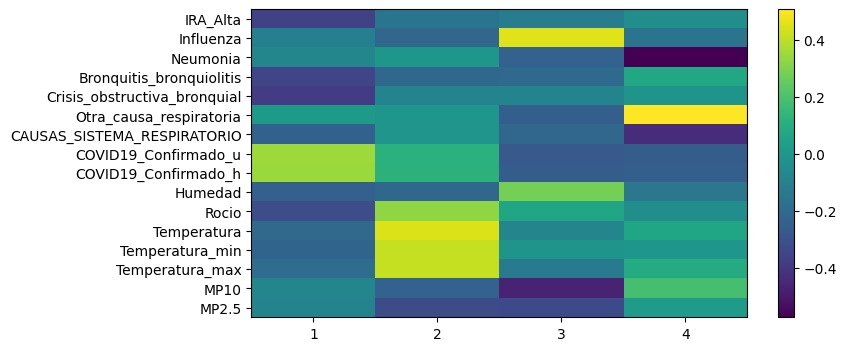

In [27]:
algoritmo_dataframe(diccionario['mar_abrDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Mayo - Junio (8 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        113.475
Influenza                        10.975
Neumonia                          9.450
Bronquitis_bronquiolitis         50.050
Crisis_obstructiva_bronquial     24.275
Otra_causa_respiratoria          13.025
CAUSAS_SISTEMA_RESPIRATORIO      10.825
COVID19_Confirmado_u              8.375
COVID19_Confirmado_h              4.775
Humedad                          65.915
Rocio                             7.385
Temperatura                      14.675
Temperatura_min                   9.550
Temperatura_max                  22.525
MP10                             54.360
MP2.5                            17.145
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        3014.460897
Influenza                        139.153205
Neumonia                          41.023077
Bronquitis_bronquiolitis        1835.125641
Crisis_obstructiva_bro

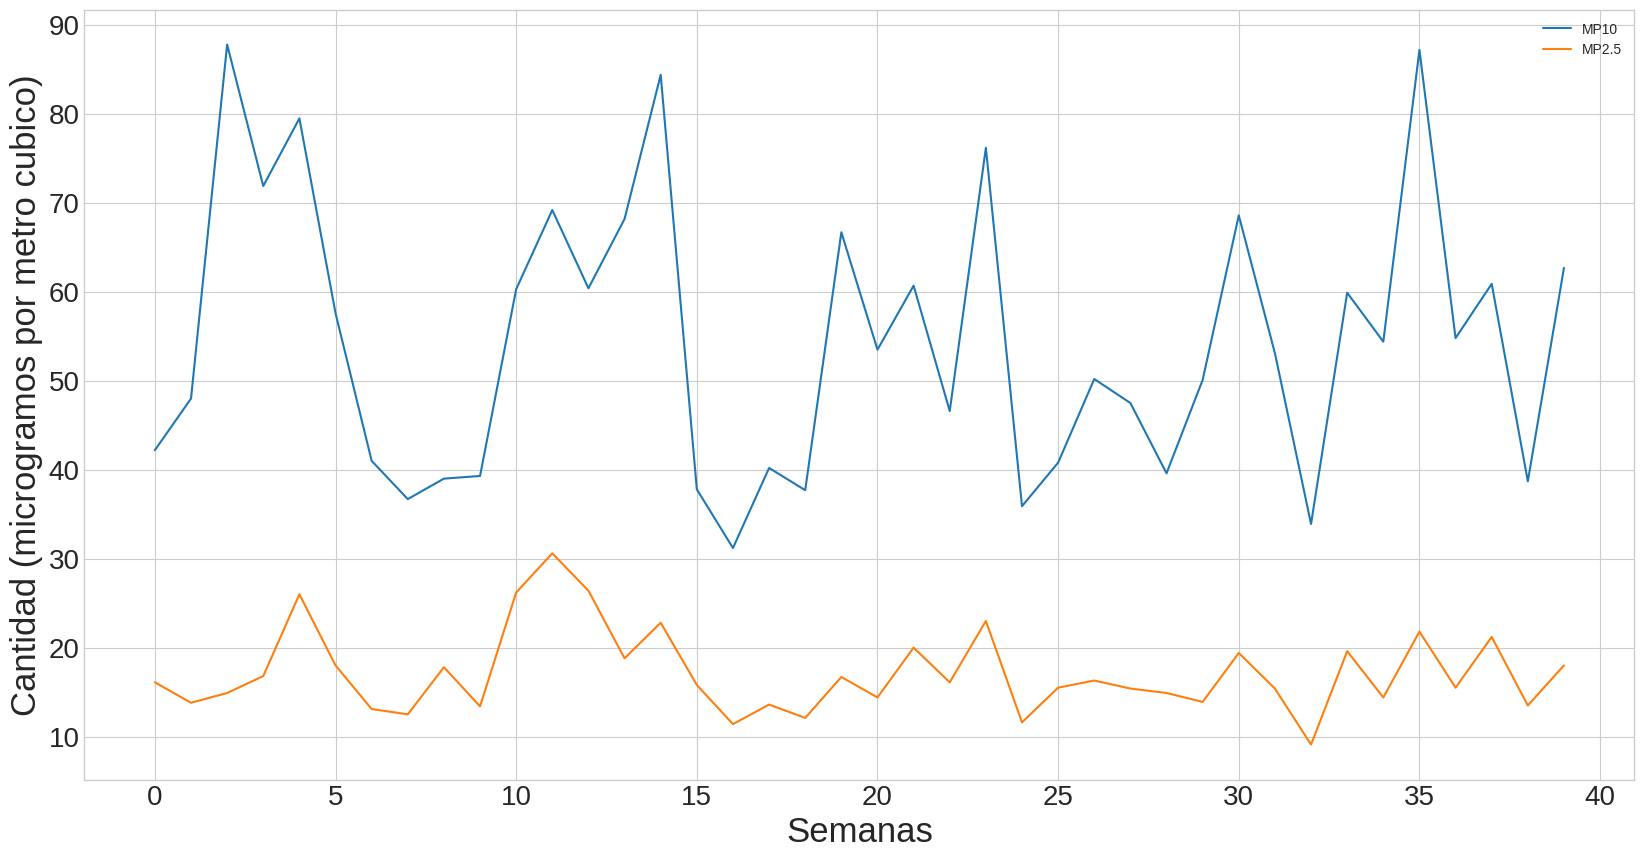

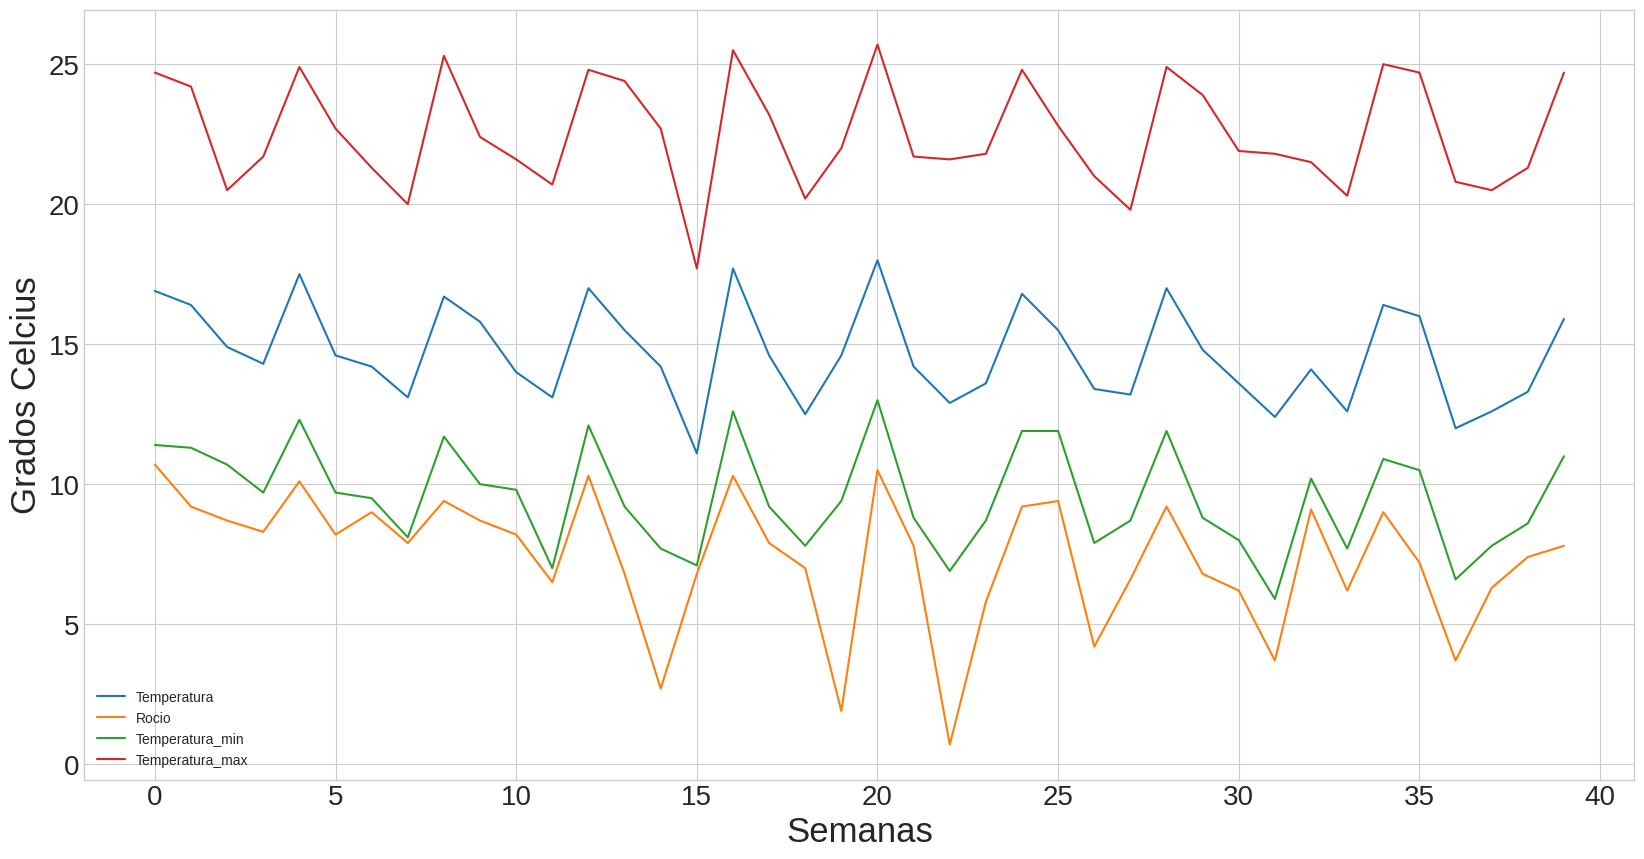

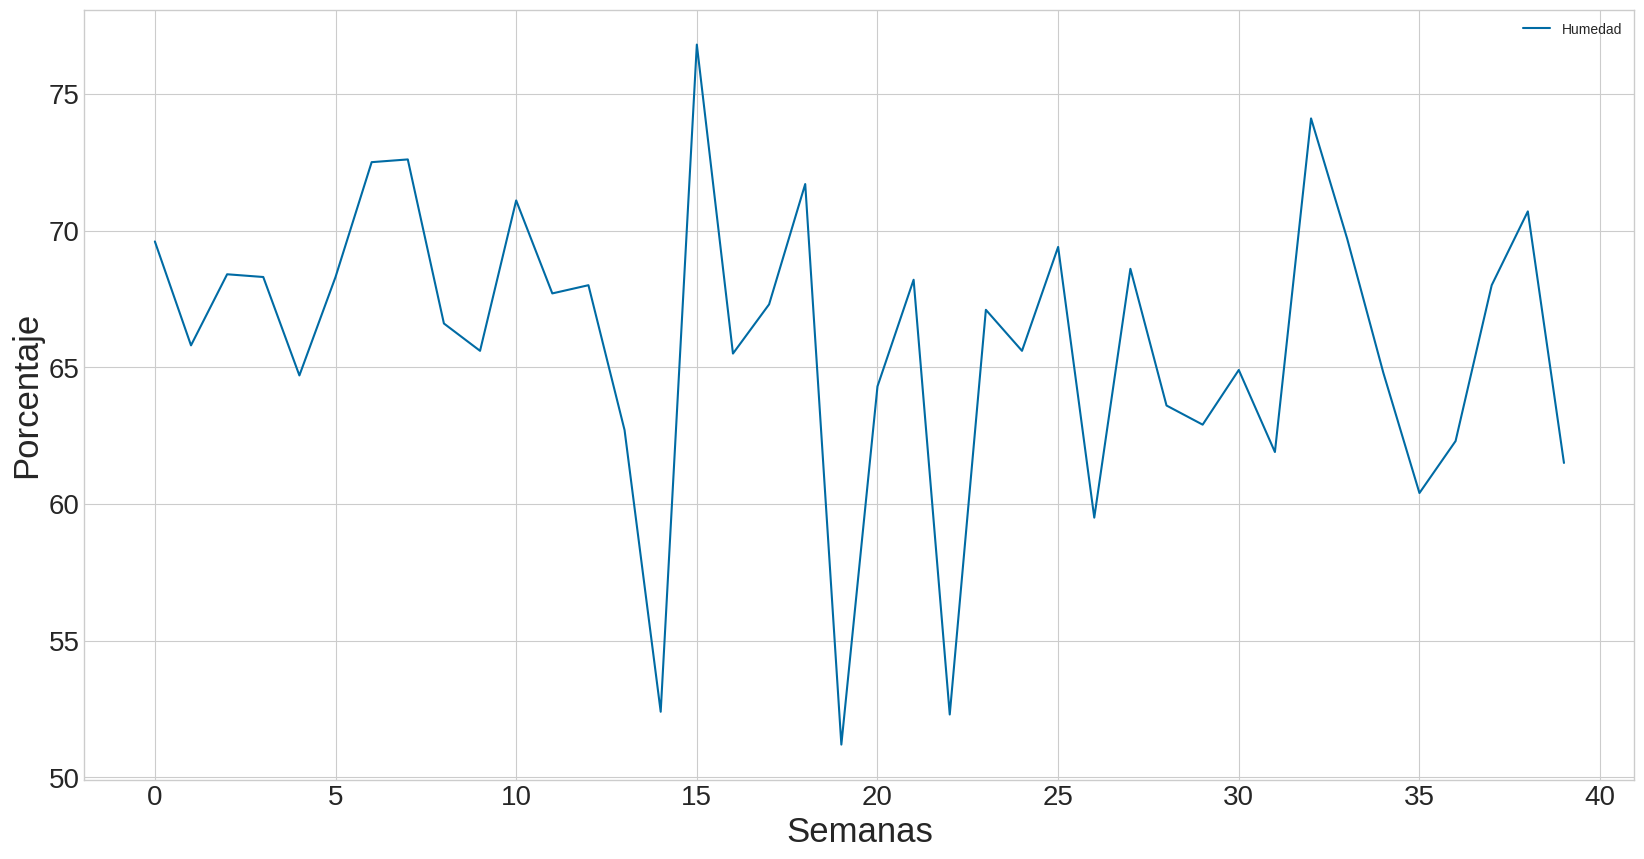

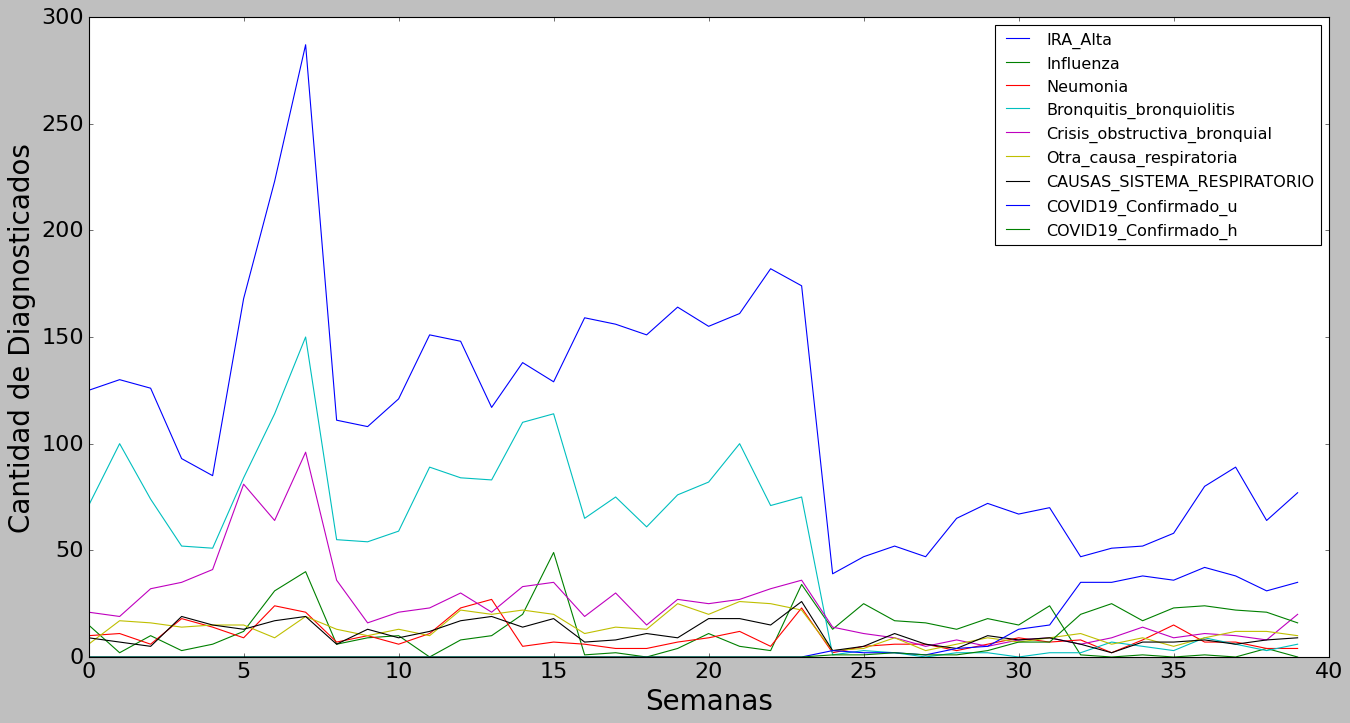

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   0.212586   0.345555  0.086965                  0.495278   
1   0.304814  -0.770523  0.245084                  1.180865   
2   0.231031  -0.083706 -0.545510                  0.566201   
3  -0.377674  -0.684671  1.351916                  0.046100   
4  -0.525239  -0.427114  0.719441                  0.022459   
5   1.005747   0.087998 -0.071153                  0.802610   
6   2.020255   1.719189  2.300629                  1.511838   
7   3.200773   2.491858  1.826272                  2.362912   
8  -0.045653  -0.427114 -0.387391                  0.117023   
9  -0.100990  -0.169558  0.086965                  0.093382   
10  0.138803  -0.083706 -0.545510                  0.211586   
11  0.692171  -0.942227  0.245084                  0.920815   
12  0.636834  -0.255410  2.142510                  0.802610   
13  0.065021  -0.083706  2.774985                  0.778969   
14  0.452378   0.774815 -0.703629                  1.417275   
15  0.286368   3.264527 -0.387391                  1.511838   
16  0.839736  -0.856375 -0.545510                  0.353432   
17  0.784399  -0.770523 -0.861748                  0.589842   
18  0.692171  -0.942227 -0.861748                  0.258868   
19  0.931964  -0.598819 -0.387391                  0.613482   
20  0.765954   0.002146 -0.071153                  0.755328   
21  0.876627  -0.512966  0.403203                  1.180865   
22  1.263985  -0.684671 -0.703629                  0.495278   
23  1.116420   1.976745  2.142510                  0.589842   
24 -1.373736   0.173851 -1.177985                 -1.159588   
25 -1.226171   1.204076 -0.703629                 -1.112306   
26 -1.133943   0.517259 -0.545510                 -1.135947   
27 -1.226171   0.431407 -0.545510                 -1.183229   
28 -0.894151   0.173851 -1.019866                 -1.135947   
29 -0.765031   0.603111 -0.545510                 -1.135947   
30 -0.857259   0.345555 -0.071153                 -1.183229   
31 -0.801923   1.118224 -0.387391                 -1.135947   
32 -1.226171  -0.856375 -0.229272                 -1.135947   
33 -1.152389  -0.942227 -1.177985                 -1.017743   
34 -1.133943  -0.856375 -0.229272                 -1.065024   
35 -1.023270  -0.942227  0.877559                 -1.112306   
36 -0.617467  -0.856375 -0.387391                 -0.970461   
37 -0.451456  -0.942227 -0.387391                 -1.041384   
38 -0.912596  -0.598819 -0.861748                 -1.112306   
39 -0.672803  -0.942227 -0.861748                 -1.041384   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                      -0.170053                -1.118121   
1                      -0.273902                 0.632673   
2                       0.401116                 0.473510   
3                       0.556890                 0.155184   
4                       0.868437                 0.314347   
5                       2.945415                 0.314347   
6                       2.062699                -0.640631   
7                       3.724282                 0.950999   
8                       0.608814                -0.003979   
9                      -0.429675                -0.481468   
10                     -0.170053                -0.003979   
11                     -0.066204                -0.481468   
12                      0.297268                 1.428489   
13                     -0.170053                 1.110163   
14                      0.453041                 1.428489   
15                      0.556890                 1.110163   
16                     -0.273902                -0.322305   
17                      0.297268                 0.155184   
18                     -0.481599                -0.003979   
19                      0.141494                 1.905978   
20                      0.037645                 1.110163   
21                      0.141494                 2.065141   
22               

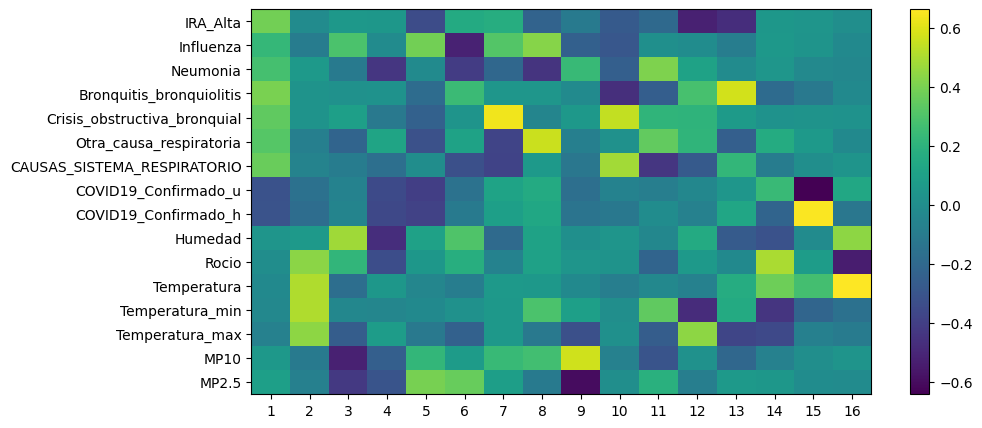

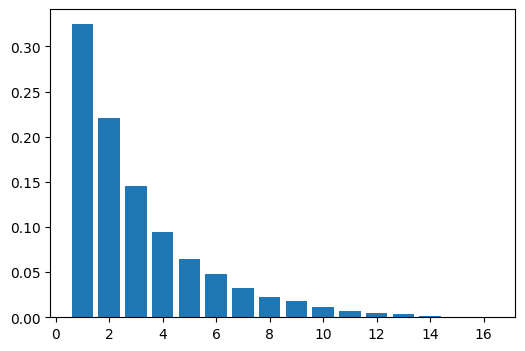

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.32480962 0.54560271 0.69094571 0.78488169 0.84893581 0.89695405
 0.92961841 0.95238574 0.97085059 0.9820431  0.98933815 0.99442566
 0.99803282 0.99904716 0.99983022 1.        ]


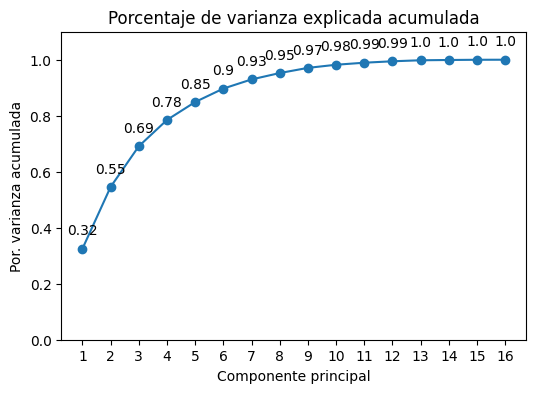

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.382712   0.224280  0.275875                  0.402305   
PC2 -0.012386  -0.092682  0.061998                  0.028948   
PC3  0.053188   0.291516 -0.111653                  0.019109   
PC4  0.049193  -0.013756 -0.437326                  0.022147   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.346198                 0.316000   
PC2                      0.026128                -0.077546   
PC3                      0.093799                -0.222625   
PC4                     -0.116297                 0.119426   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.363761             -0.313703             -0.310160   
PC2                    -0.060513             -0.155337             -0.175721   
PC3                    -0.095834             -0.062213             -0.054293   
PC4                    -0.165344             -0.347379             -0.360716   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.037885 -0.003985    -0.022211        -0.031991        -0.067816   
PC2  0.057869  0.438344     0.507091         0.508754         0.440207   
PC3  0.476666  0.217209    -0.169152        -0.038529        -0.256970   
PC4 -0.474175 -0.334232     0.047216        -0.042958         0.079366   

         MP10     MP2.5  
PC1  0.051248  0.091871  
PC2 -0.102521 -0.073826  
PC3 -0.523528 -0.424728  
PC4 -0.246709 -0.303216

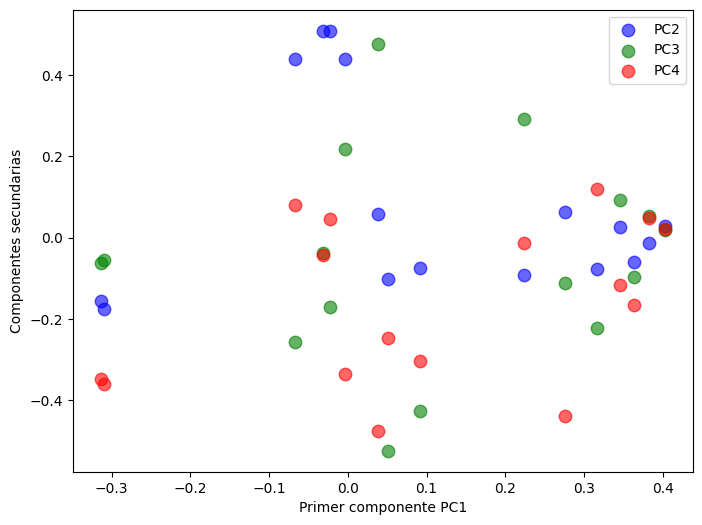

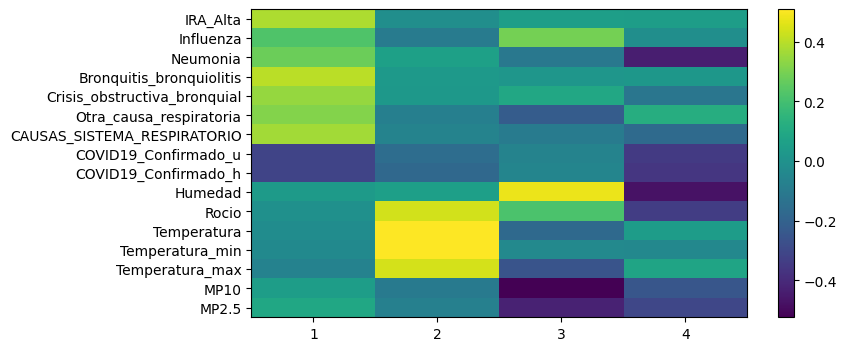

In [28]:
algoritmo_dataframe(diccionario['may_junDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Julio - Agosto (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        121.488889
Influenza                        19.555556
Neumonia                         13.400000
Bronquitis_bronquiolitis         59.088889
Crisis_obstructiva_bronquial     30.422222
Otra_causa_respiratoria          14.222222
CAUSAS_SISTEMA_RESPIRATORIO      15.600000
COVID19_Confirmado_u              7.088889
COVID19_Confirmado_h              3.688889
Humedad                          66.402222
Rocio                             7.342222
Temperatura                      14.486667
Temperatura_min                   9.391111
Temperatura_max                  22.582222
MP10                             50.020000
MP2.5                            17.953333
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        6081.937374
Influenza                        577.570707
Neumonia                          93.927273
Bronquitis_bronqui

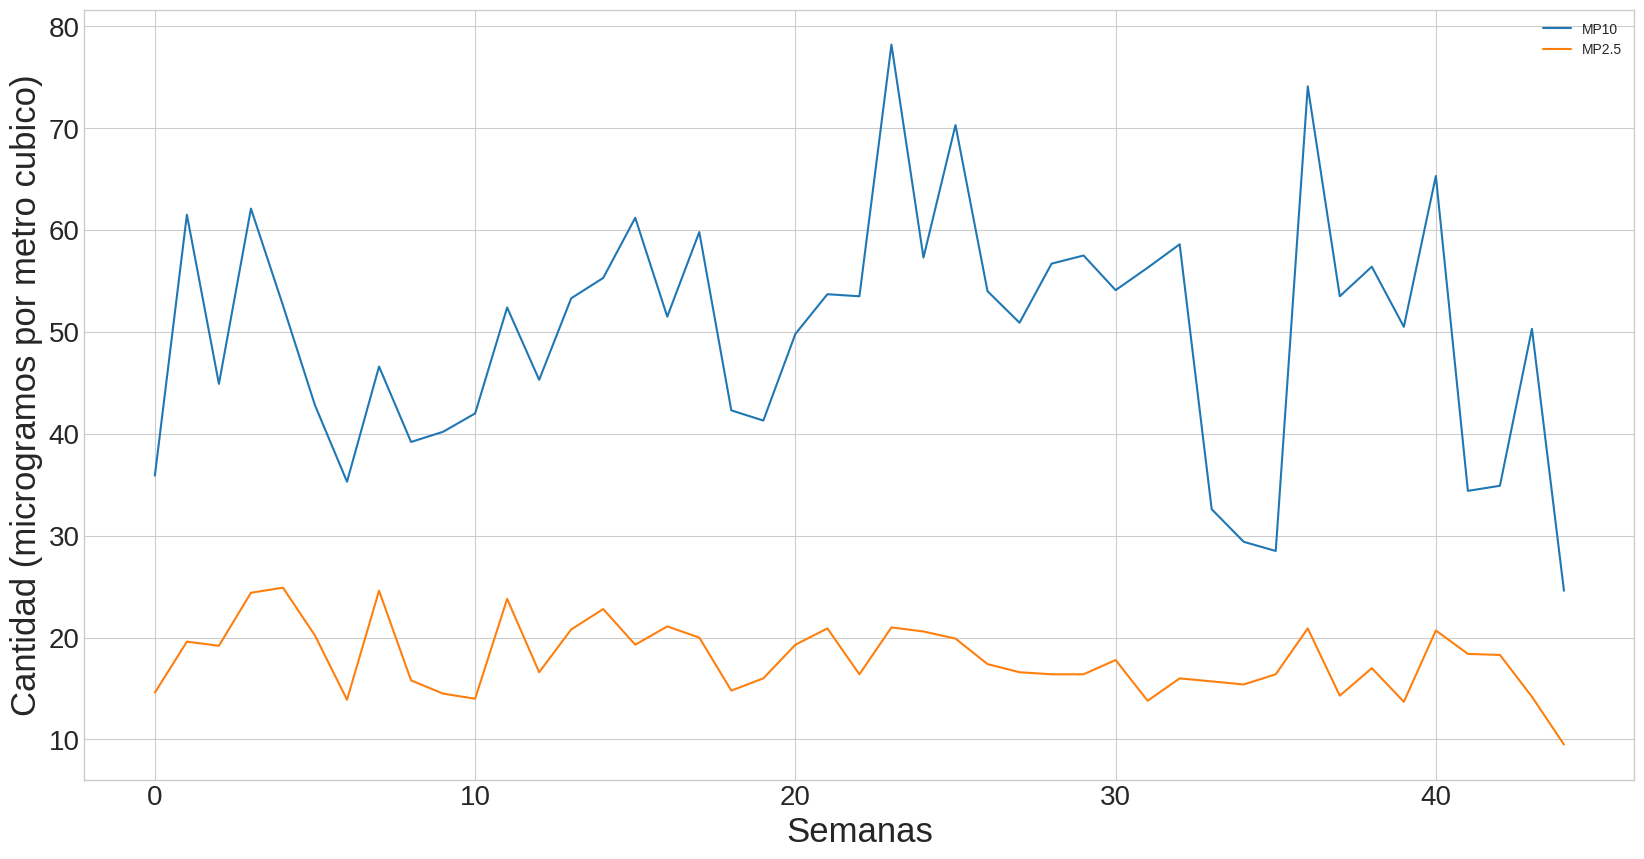

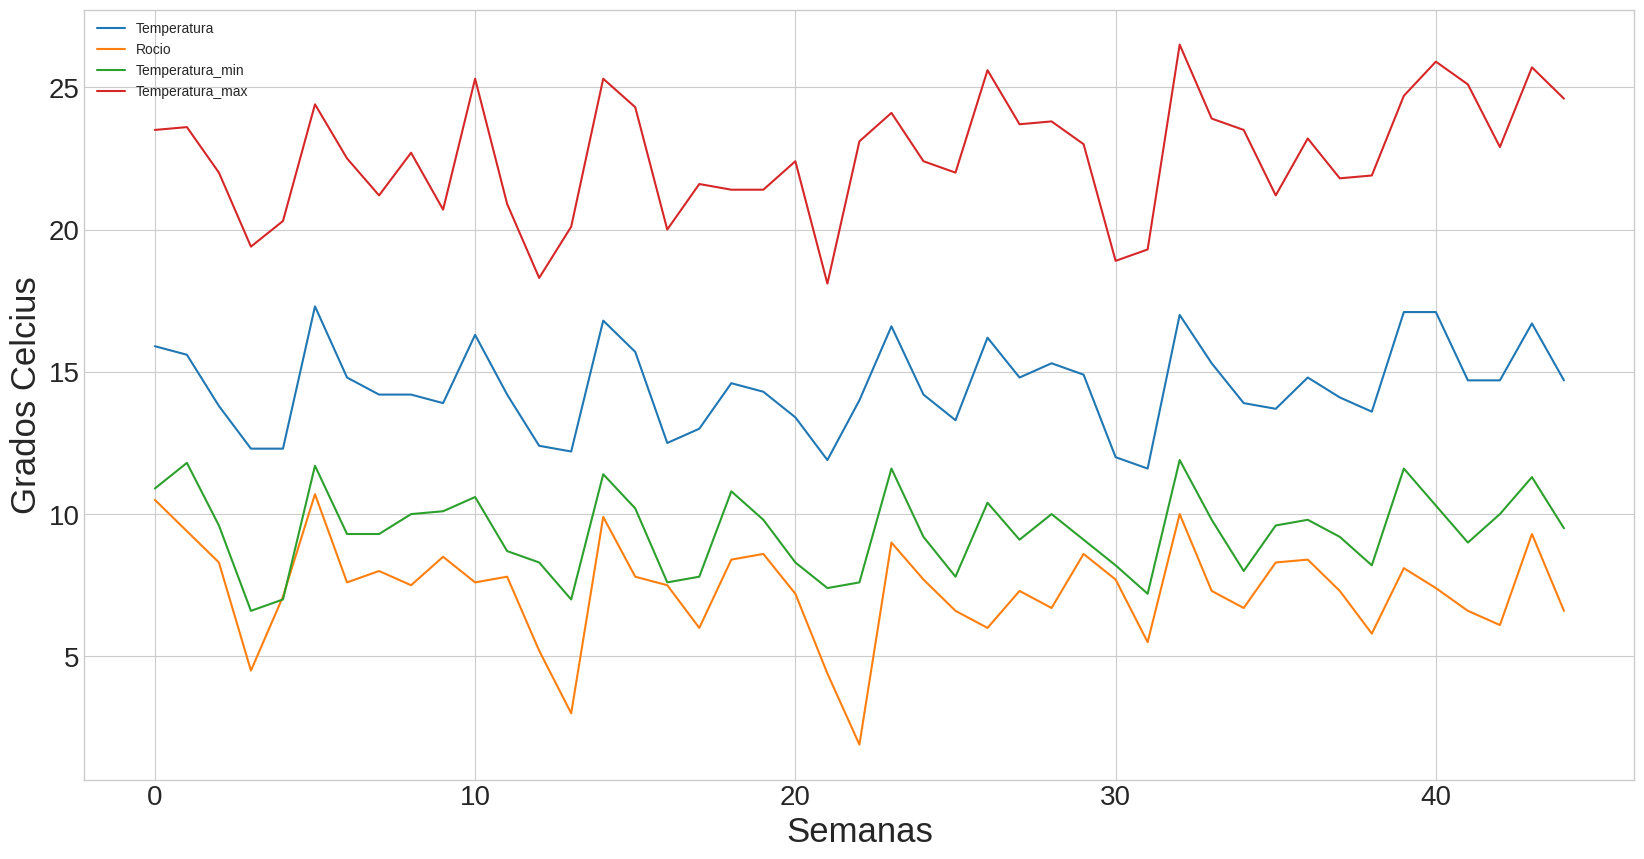

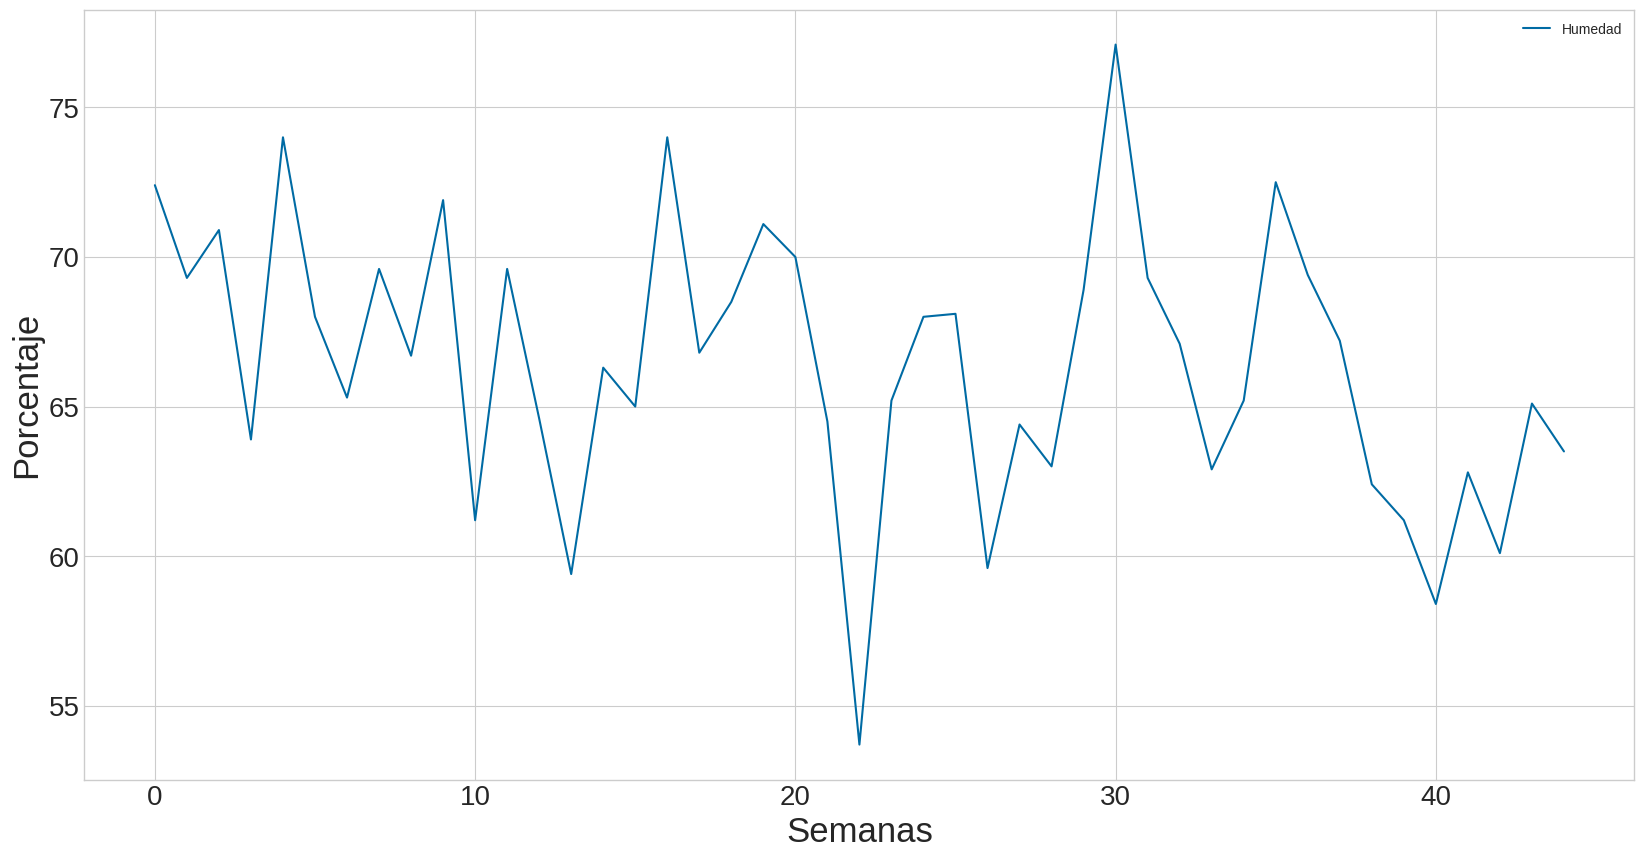

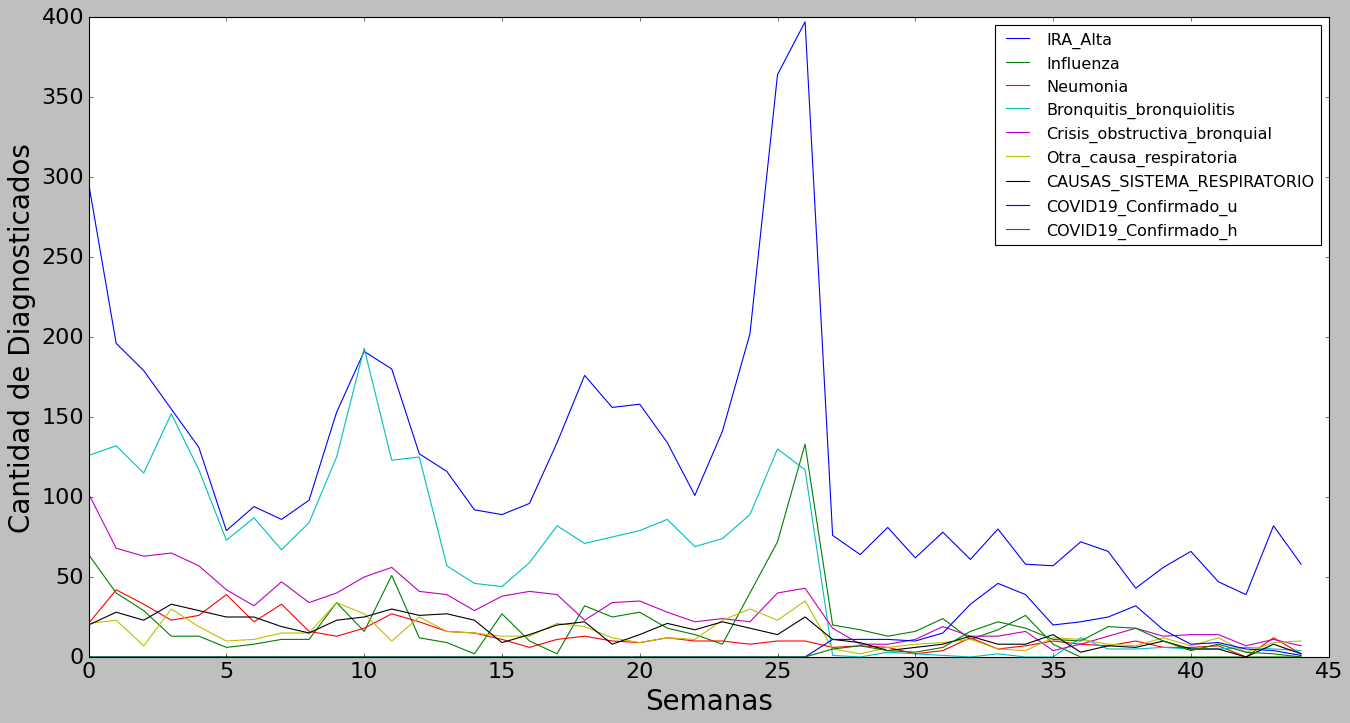

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.262987   1.870229  0.793045                  1.268516   
1   0.966229   0.860305  2.984352                  1.382266   
2   0.745780   0.397424  2.045220                  1.059976   
3   0.434558  -0.275859  1.001741                  1.761430   
4   0.123336  -0.275859  1.314785                  1.097892   
5  -0.550978  -0.570420  2.671308                  0.263730   
6  -0.356464  -0.486260  0.897393                  0.529145   
7  -0.460205  -0.360019  2.045220                  0.149981   
8  -0.304594  -0.360019  0.271305                  0.472271   
9   0.408623   0.607824 -0.041739                  1.249558   
10  0.901391  -0.149618  0.480001                  2.538718   
11  0.758748   1.323187  1.419133                  1.211641   
12  0.071466  -0.317939  0.897393                  1.249558   
13 -0.071178  -0.444179  0.271305                 -0.039602   
14 -0.382400  -0.738741  0.166957                 -0.248142   
15 -0.421302   0.313263 -0.250435                 -0.286059   
16 -0.330529  -0.402099 -0.772175                 -0.001685   
17  0.162239  -0.738741 -0.250435                  0.434354   
18  0.706877   0.523664 -0.041739                  0.225814   
19  0.447526   0.229103 -0.354783                  0.301646   
20  0.473461   0.355344 -0.459131                  0.377479   
21  0.162239  -0.065458 -0.146087                  0.510187   
22 -0.265691  -0.233779 -0.354783                  0.187897   
23  0.253012  -0.486260 -0.354783                  0.282688   
24  1.044034   0.860305 -0.563479                  0.567062   
25  3.144782   2.206870 -0.354783                  1.344349   
26  3.572712   4.773760 -0.354783                  1.097892   
27 -0.589881   0.018702 -0.772175                 -1.101262   
28 -0.745492  -0.107538 -0.667827                 -1.120221   
29 -0.525043  -0.275859 -0.772175                 -1.063346   
30 -0.771427  -0.149618 -1.189567                 -1.082304   
31 -0.563946   0.187023 -0.980871                 -1.101262   
32 -0.784395  -0.360019 -0.146087                 -1.120221   
33 -0.538010  -0.107538 -0.876523                 -1.082304   
34 -0.823297   0.271183 -0.667827                 -1.120221   
35 -0.836265  -0.486260 -0.354783                 -1.120221   
36 -0.641751  -0.822901 -0.563479                 -0.892722   
37 -0.719557  -0.822901 -0.667827                 -1.025430   
38 -1.017811  -0.822901 -0.354783                 -1.025430   
39 -0.849232  -0.822901 -0.772175                 -1.006471   
40 -0.719557  -0.822901 -0.772175                 -1.025430   
41 -0.965941  -0.822901 -0.667827                 -1.025430   
42 -1.069681  -0.822901 -1.398263                 -1.006471   
43 -0.512075  -0.822901 -0.146087                 -1.025430   
44 -0.823297  -0.822901 -1.189567                 -1.044388   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       3.533158                 0.826015   
1                       1.854880                 1.069758   
2                       1.608075                -0.880180   
3                       1.706797                 1.922856   
4                       1.311908                 0.582273   
5                       0.571492                -0.514567   
6                       0.077881                -0.392696   
7                       0.818297                 0.094789   
8                       0.176603                 0.094789   
9                       0.472770                 2.410340   
10                      0.966381                 1.557242   
11                      1.262547                -0.514567   
12                      0.522131                 1.313500   
13                      0.423409                 0.216660   
14                     -0.070202                 0.094789   
15                      0.374047                -0.148954   
16                      0.522131                -0.148954   
17     

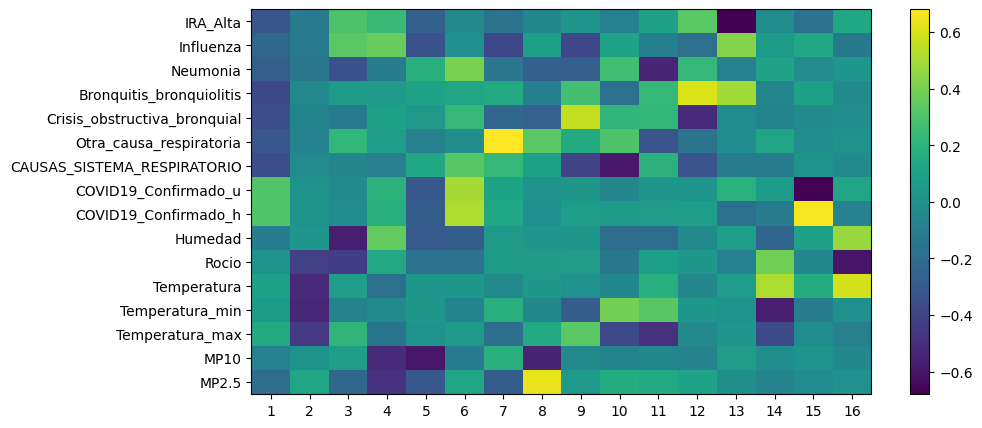

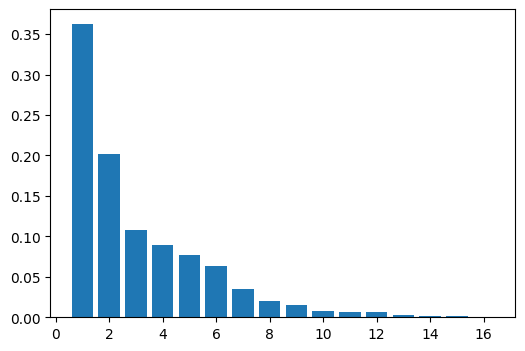

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.36261046 0.56443734 0.67220309 0.76204095 0.83917847 0.90269725
 0.93732206 0.95692445 0.97253831 0.9800498  0.9871771  0.99369312
 0.99639625 0.99831936 0.99951357 1.        ]


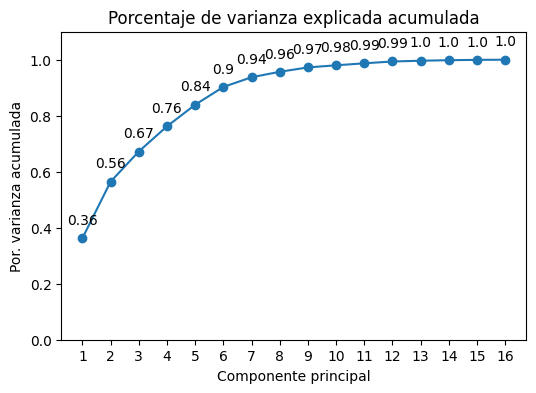

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.315400  -0.226627 -0.270198                 -0.385928   
PC2 -0.117575  -0.117025 -0.132676                 -0.038502   
PC3  0.300739   0.333420 -0.335919                  0.060532   
PC4  0.242489   0.362900 -0.108915                  0.051903   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.354063                -0.309804   
PC2                     -0.066855                -0.075382   
PC3                     -0.116636                 0.220171   
PC4                      0.098773                 0.072282   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                    -0.352729              0.310325              0.311582   
PC2                    -0.023161              0.016083              0.011965   
PC3                    -0.058775             -0.027642             -0.017429   
PC4                    -0.086271              0.194773              0.176231   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.103535  0.011043     0.092946         0.060149         0.144812   
PC2  0.035394 -0.421064    -0.520020        -0.523013        -0.453154   
PC3 -0.566077 -0.431226     0.077324        -0.072872         0.208703   
PC4  0.351652  0.138635    -0.179608        -0.027259        -0.152920   

         MP10     MP2.5  
PC1 -0.081246 -0.193403  
PC2  0.018988  0.118682  
PC3  0.075886 -0.219718  
PC4 -0.516109 -0.487744

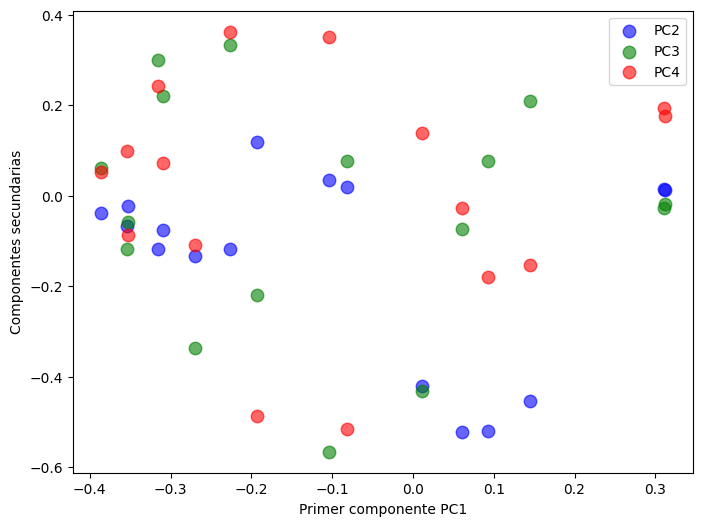

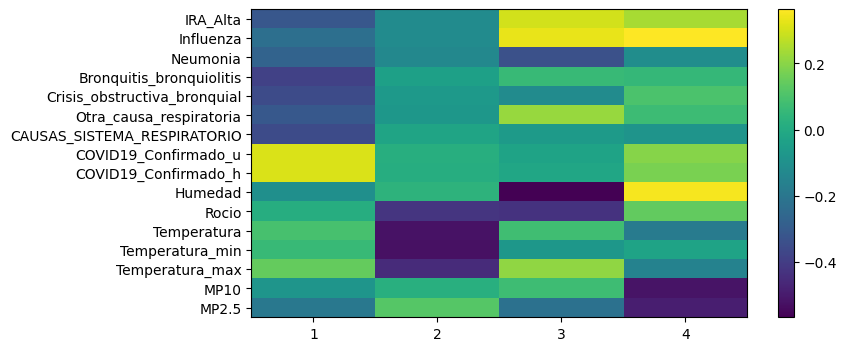

In [29]:
algoritmo_dataframe(diccionario['jul_agoDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Septiembre - Octubre (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        103.288889
Influenza                         7.977778
Neumonia                         10.133333
Bronquitis_bronquiolitis         45.933333
Crisis_obstructiva_bronquial     23.133333
Otra_causa_respiratoria          13.600000
CAUSAS_SISTEMA_RESPIRATORIO      11.066667
COVID19_Confirmado_u              2.355556
COVID19_Confirmado_h              1.200000
Humedad                          66.411111
Rocio                             8.622222
Temperatura                      15.677778
Temperatura_min                  10.555556
Temperatura_max                  24.251111
MP10                             36.375556
MP2.5                            12.491111
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        4074.710101
Influenza                        161.840404
Neumonia                          35.981818
Bronquitis_bronqui

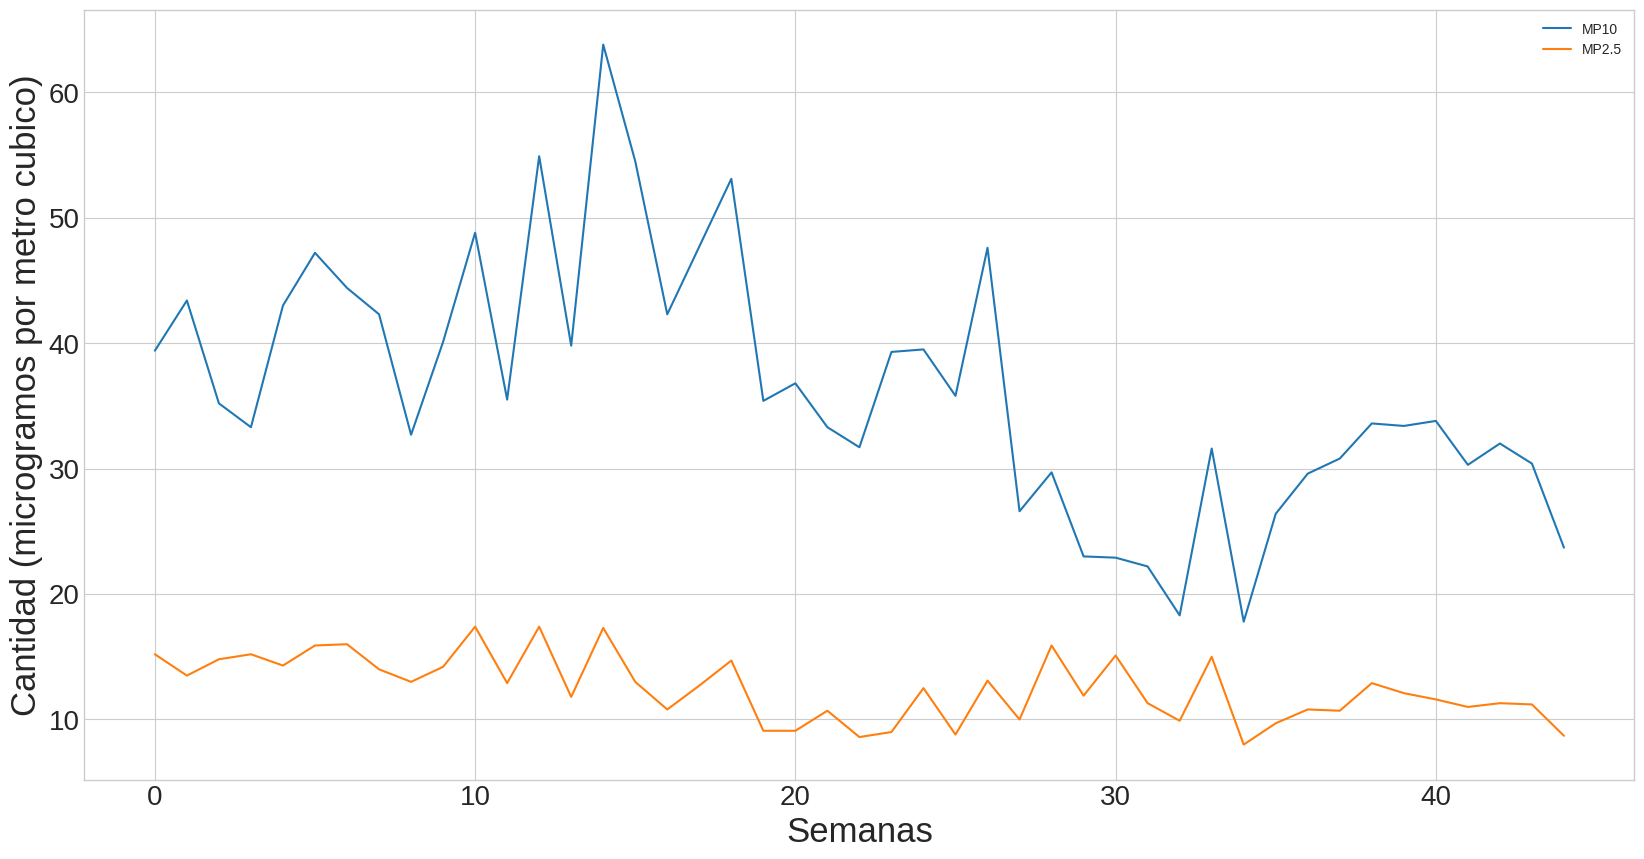

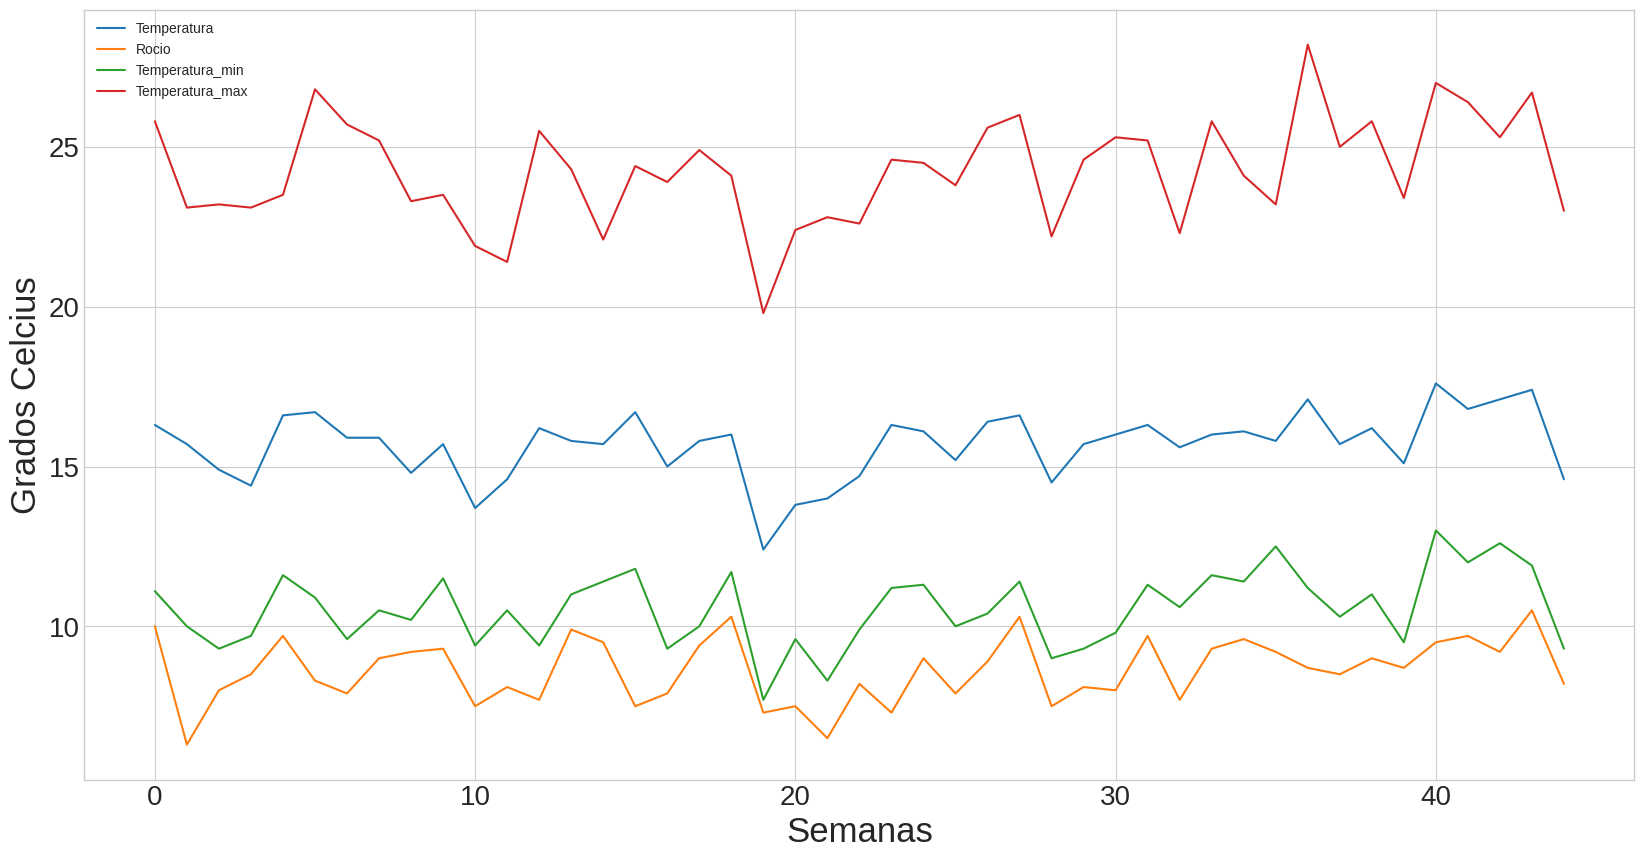

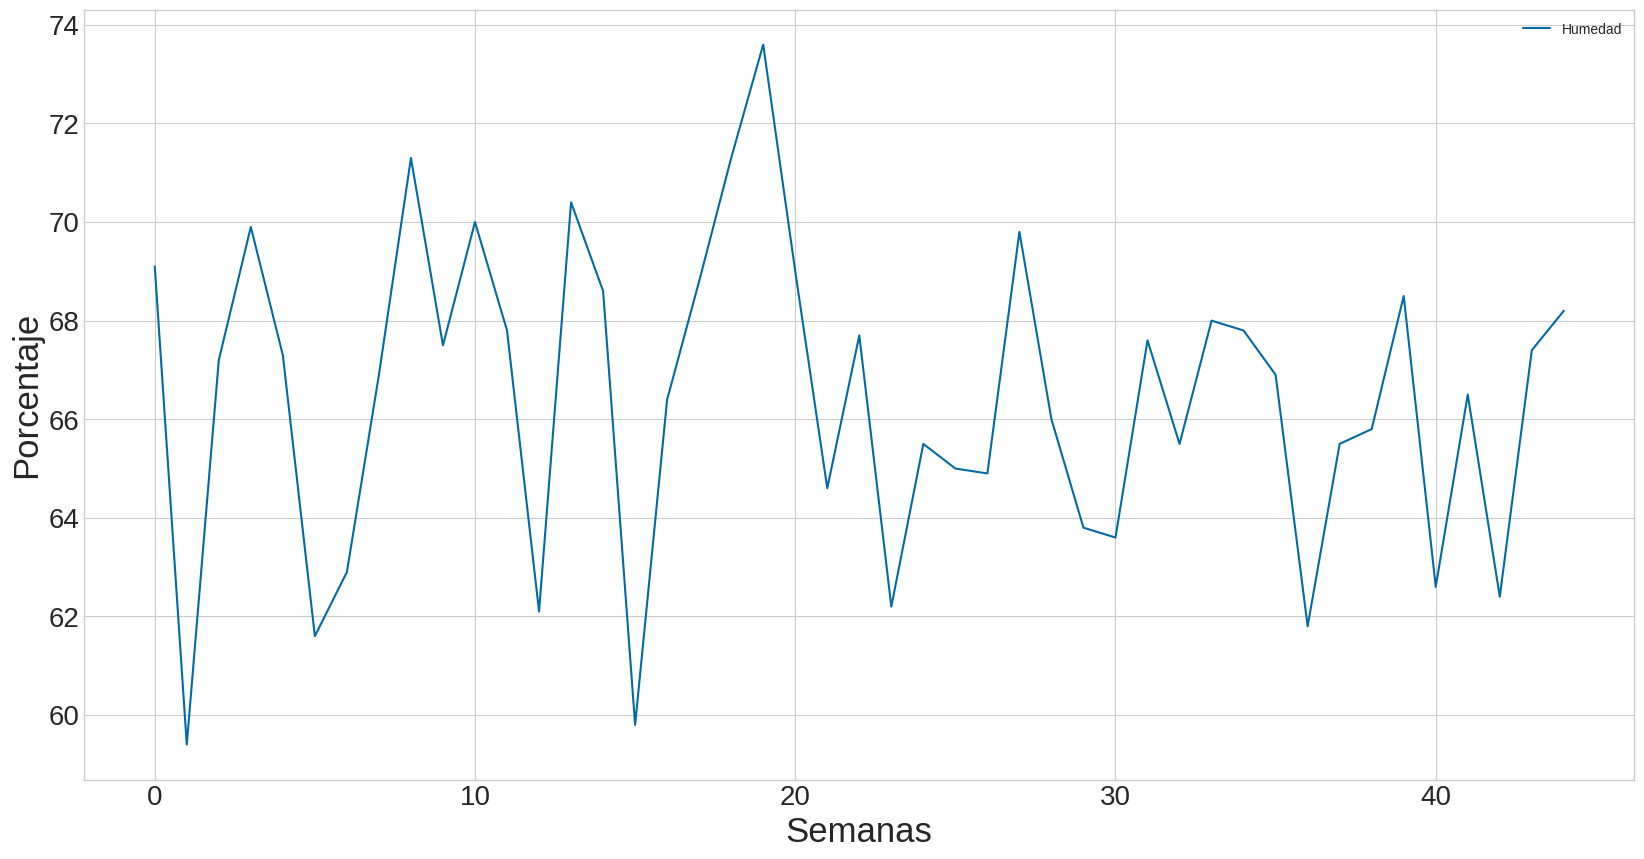

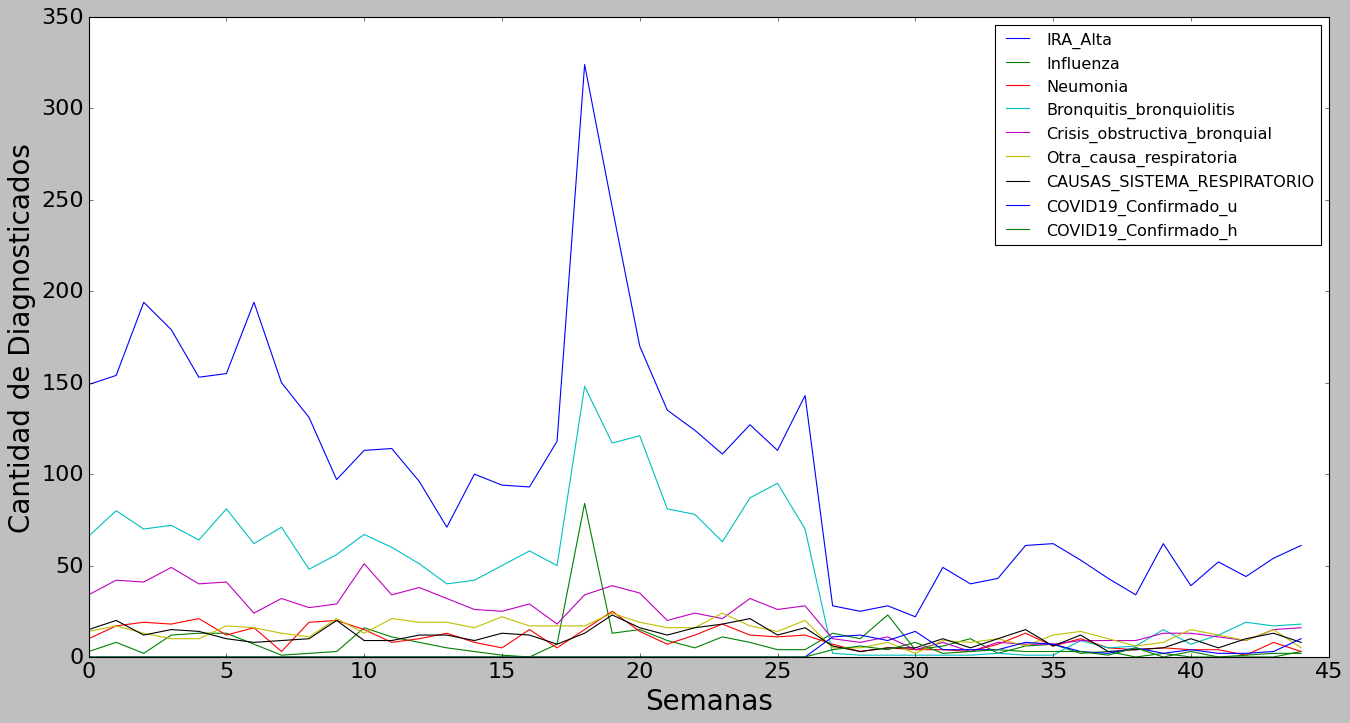

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   0.724191  -0.395705 -0.022479                  0.535511   
1   0.803405   0.001767  1.157669                  0.909123   
2   1.437117  -0.475200  1.494854                  0.642257   
3   1.199475   0.319744  1.326261                  0.695630   
4   0.787563   0.399238  1.832039                  0.482138   
5   0.819248   0.399238  0.314706                  0.935810   
6   1.437117  -0.077728  0.989076                  0.428765   
7   0.740034  -0.554694 -1.202627                  0.668944   
8   0.439021  -0.475200  1.494854                  0.055152   
9  -0.099634  -0.395705  1.663446                  0.268645   
10  0.153851   0.637722  0.820484                  0.562197   
11  0.169694   0.240250 -0.359664                  0.375391   
12 -0.115476   0.001767 -0.022479                  0.135212   
13 -0.511546  -0.236717  0.483299                 -0.158340   
14 -0.052105  -0.395705 -0.359664                 -0.104967   
15 -0.147162  -0.554694 -0.865442                  0.108525   
16 -0.163005  -0.634189  0.820484                  0.322018   
17  0.233065  -0.077728 -0.865442                  0.108525   
18  3.496679   6.043340  0.820484                  2.723811   
19  2.260942   0.399238  2.506409                  1.896527   
20  1.056890   0.558227  0.651891                  2.003273   
21  0.502392   0.081261 -0.528257                  0.935810   
22  0.328122  -0.236717  0.314706                  0.855750   
23  0.122165   0.240250  1.326261                  0.455451   
24  0.375650   0.001767  0.314706                  1.095929   
25  0.153851  -0.316211  0.146114                  1.309422   
26  0.629135  -0.316211  0.314706                  0.642257   
27 -1.192786   0.399238 -0.528257                 -1.172431   
28 -1.240314   0.160755 -1.202627                 -1.199117   
29 -1.192786   1.194182 -0.865442                 -1.199117   
30 -1.287842  -0.316211 -1.034034                 -1.199117   
31 -0.860087  -0.157222 -1.034034                 -1.199117   
32 -1.002672   0.160755 -1.202627                 -1.199117   
33 -0.955144  -0.475200 -0.528257                 -1.172431   
34 -0.669974  -0.157222  0.483299                 -1.199117   
35 -0.654131  -0.077728 -0.696849                 -1.199117   
36 -0.796716  -0.475200 -0.022479                 -0.985625   
37 -0.955144  -0.395705 -0.865442                 -1.092371   
38 -1.097729  -0.634189 -1.034034                 -1.065684   
39 -0.654131  -0.475200 -0.865442                 -0.825505   
40 -1.018515  -0.634189 -1.034034                 -1.038998   
41 -0.812559  -0.634189 -1.034034                 -0.905565   
42 -0.939301  -0.634189 -1.539812                 -0.718759   
43 -0.780873  -0.634189 -0.359664                 -0.772132   
44 -0.669974  -0.395705 -1.202627                 -0.745445   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       0.832609                 0.074570   
1                       1.445572                 0.633846   
2                       1.368951                -0.111855   
3                       1.981915                -0.671131   
4                       1.292331                -0.671131   
5                       1.368951                 0.633846   
6                       0.066404                 0.447421   
7                       0.679368                -0.111855   
8                       0.296266                -0.484706   
9                       0.449506                 1.379547   
10                      2.135156                -0.111855   
11                      0.832609                 1.379547   
12                      1.139090                 1.006697   
13                      0.679368                 1.006697   
14                      0.219645                 0.447421   
15                      0.143025                 1.565973   
16                      0.449506                 0.633846   
17     

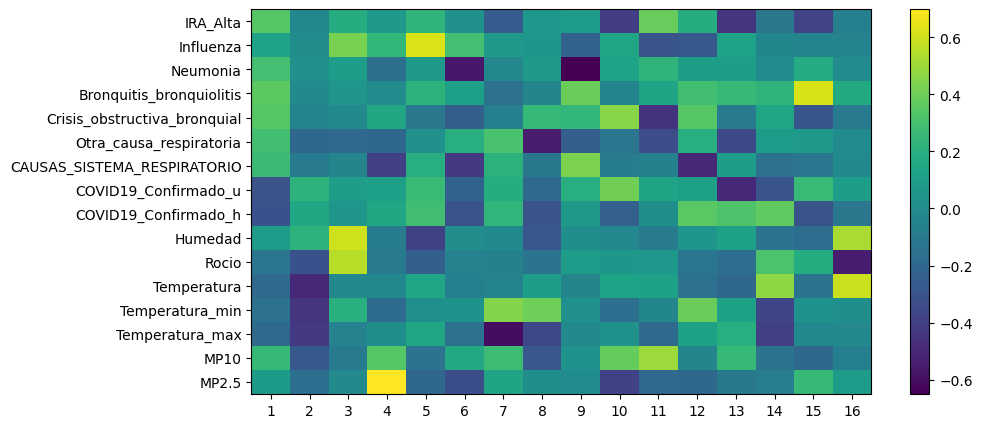

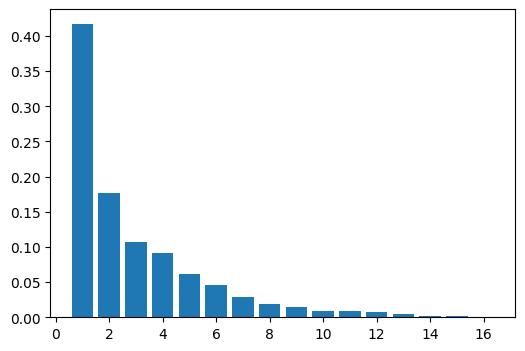

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.41718812 0.59391136 0.70143953 0.79346002 0.85513177 0.90172092
 0.93079351 0.95025046 0.96463321 0.97414445 0.98278728 0.99011523
 0.99510941 0.99753748 0.99934583 1.        ]


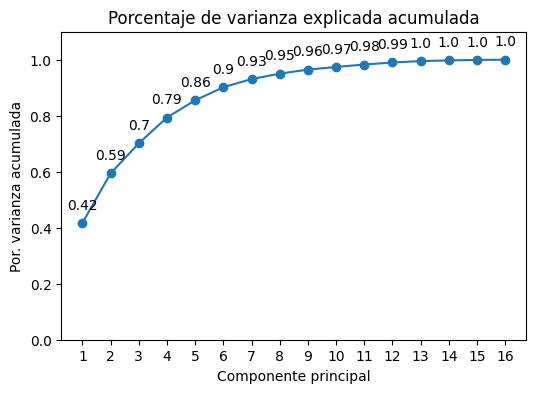

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.339880   0.131090  0.297410                  0.359078   
PC2 -0.020075   0.008787  0.030037                 -0.011328   
PC3  0.185540   0.424721  0.098903                  0.054816   
PC4  0.079858   0.243675 -0.151420                  0.002180   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.344036                 0.288287   
PC2                     -0.040799                -0.195178   
PC3                     -0.003745                -0.192496   
PC4                      0.156080                -0.201389   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.267291             -0.307555             -0.311106   
PC2                    -0.091207              0.221831              0.154718   
PC3                    -0.037103              0.105008              0.052041   
PC4                    -0.393376              0.108260              0.155113   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.093013 -0.122083    -0.191006        -0.143432        -0.185084   
PC2  0.221212 -0.310606    -0.498680        -0.447929        -0.422127   
PC3  0.598402  0.555540    -0.013534         0.203997        -0.054658   
PC4 -0.081291 -0.096628    -0.023177        -0.181708         0.022501   

         MP10     MP2.5  
PC1  0.252233  0.084412  
PC2 -0.280524 -0.160148  
PC3 -0.093289 -0.004712  
PC4  0.343795  0.698332

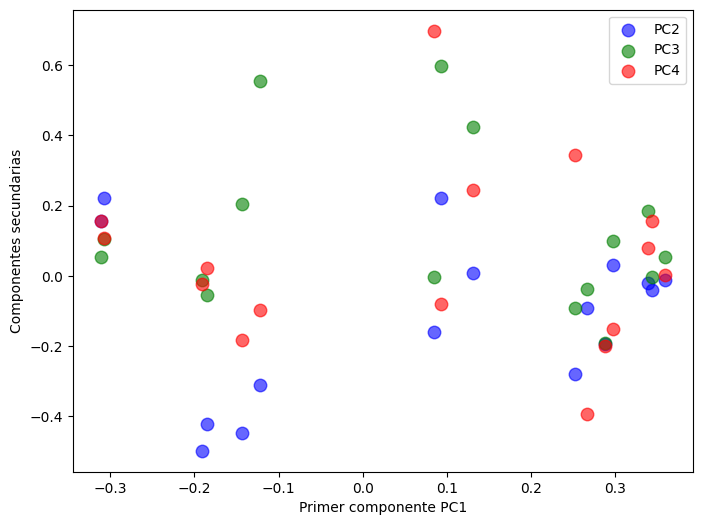

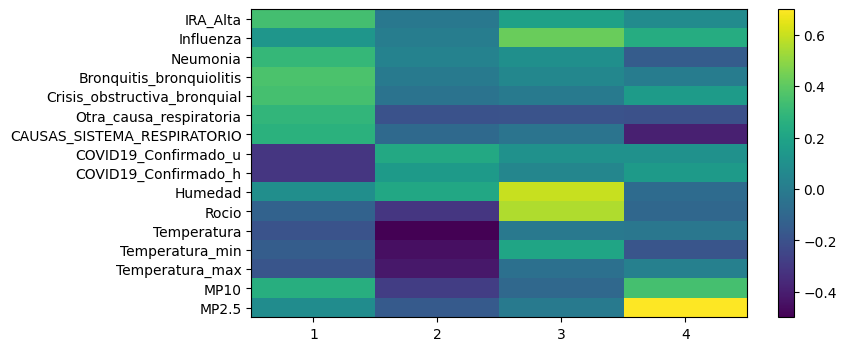

In [30]:
algoritmo_dataframe(diccionario['sep_octDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Noviembre - Diciembre (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                         1.577778
Influenza                        0.044444
Neumonia                         3.022222
Bronquitis_bronquiolitis         0.088889
Crisis_obstructiva_bronquial     6.577778
Otra_causa_respiratoria          4.088889
CAUSAS_SISTEMA_RESPIRATORIO      3.333333
COVID19_Confirmado_u             0.600000
COVID19_Confirmado_h             0.400000
Humedad                         65.597778
Rocio                           10.406667
Temperatura                     17.664444
Temperatura_min                 12.657778
Temperatura_max                 25.744444
MP10                            31.604444
MP2.5                            9.057778
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                         2.340404
Influenza                        0.043434
Neumonia                         3.885859
Bronquitis_bronquiolitis         0.08282

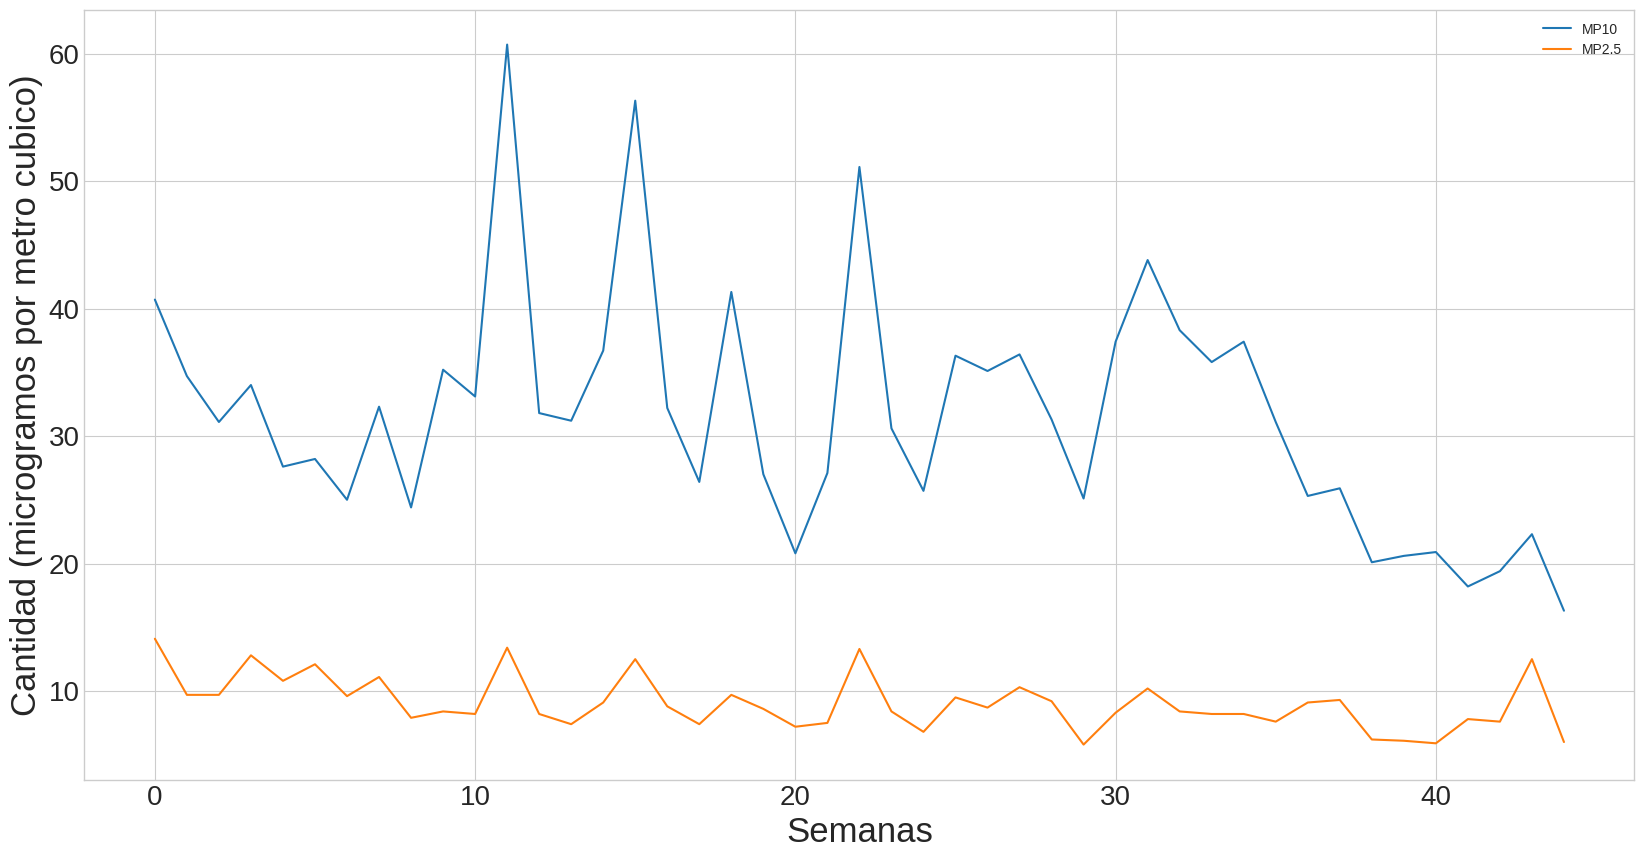

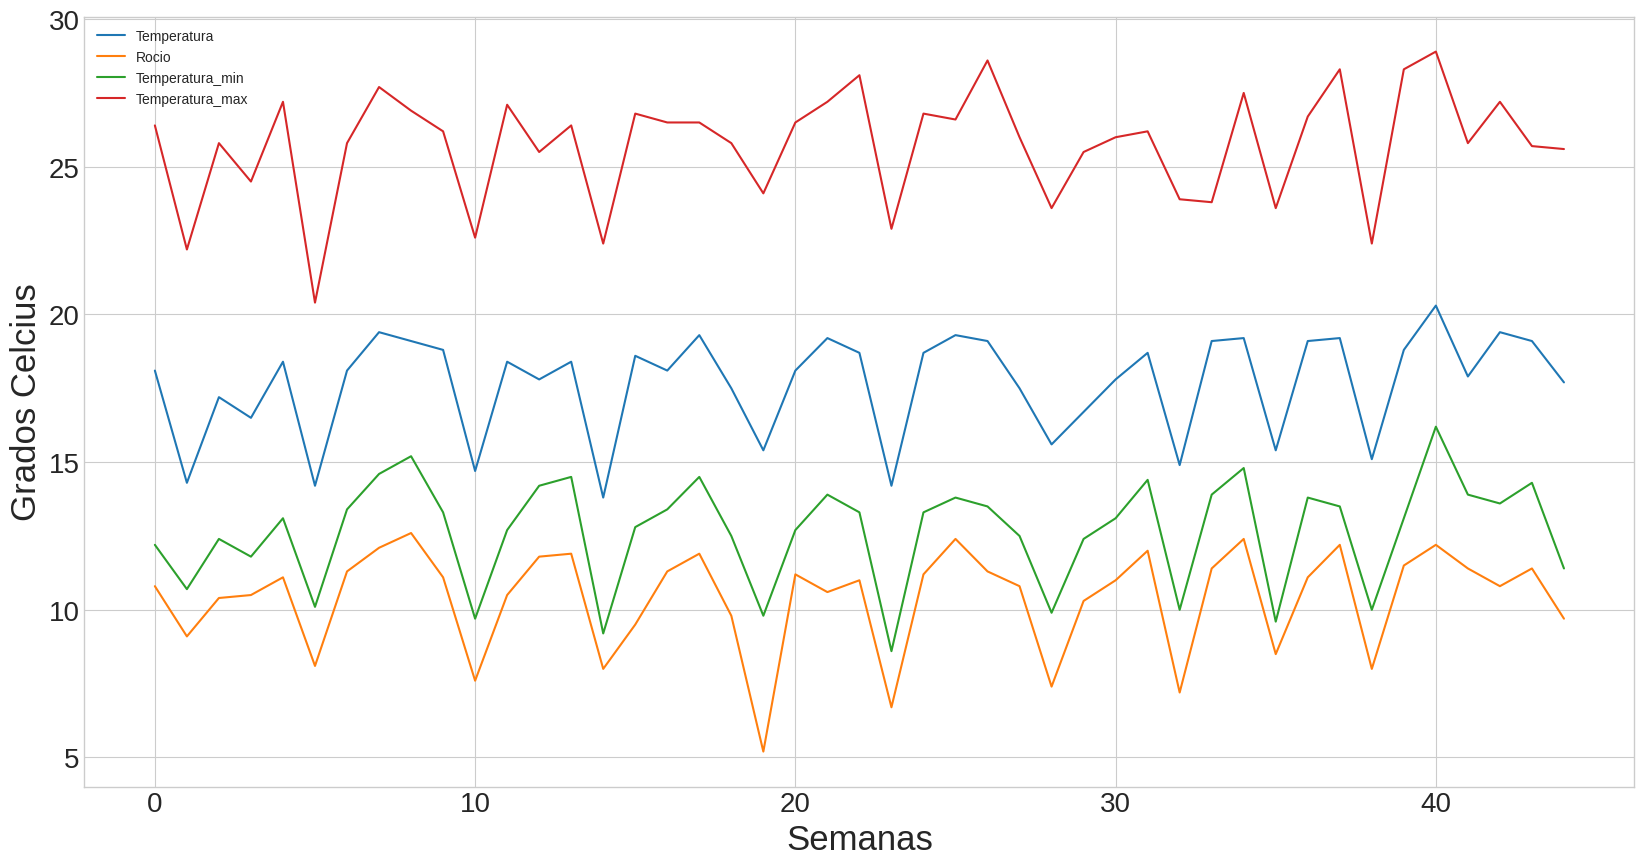

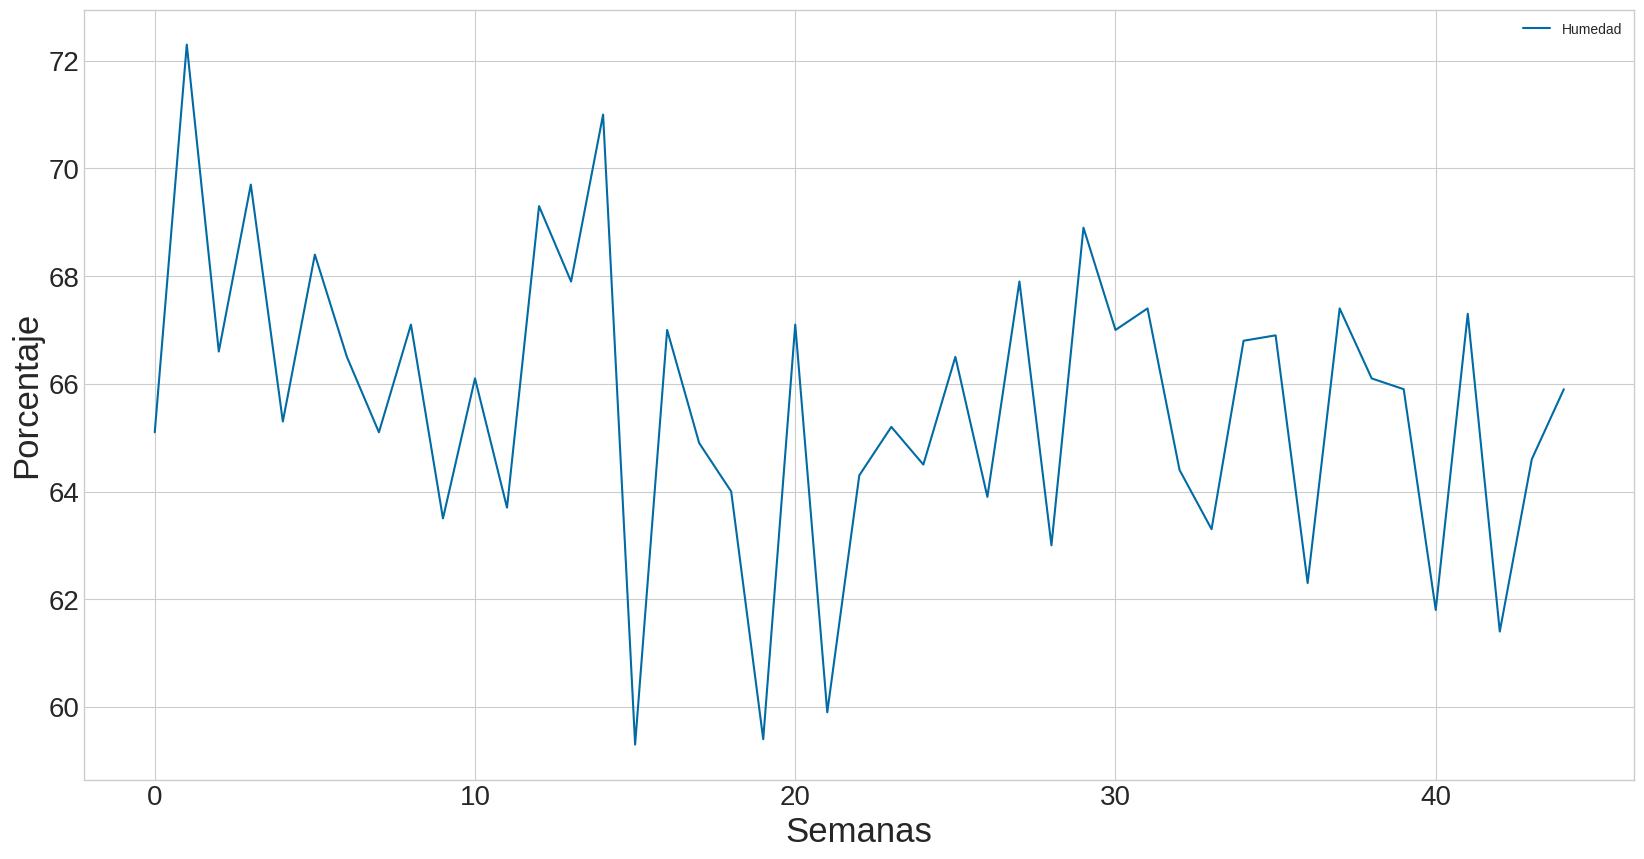

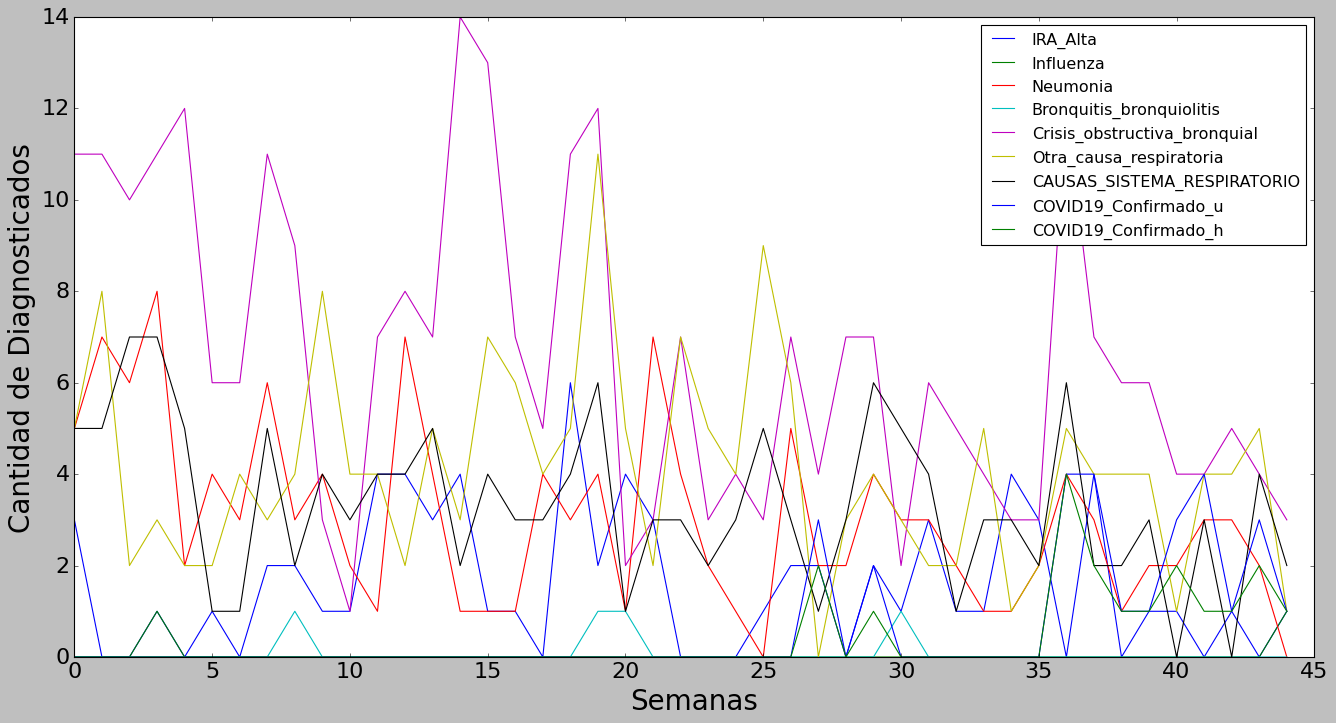

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   0.940160  -0.215666  1.014645                 -0.312348   
1  -1.042990  -0.215666  2.040690                 -0.312348   
2  -1.042990  -0.215666  1.527667                 -0.312348   
3  -0.381940   4.636809  2.553712                 -0.312348   
4  -1.042990  -0.215666 -0.524423                 -0.312348   
5  -0.381940  -0.215666  0.501622                 -0.312348   
6  -1.042990  -0.215666 -0.011401                 -0.312348   
7   0.279110  -0.215666  1.527667                 -0.312348   
8   0.279110  -0.215666 -0.011401                  3.201562   
9  -0.381940  -0.215666  0.501622                 -0.312348   
10 -0.381940  -0.215666 -0.524423                 -0.312348   
11  1.601211  -0.215666 -1.037446                 -0.312348   
12  1.601211  -0.215666  2.040690                 -0.312348   
13  0.940160  -0.215666  0.501622                 -0.312348   
14  1.601211  -0.215666 -1.037446                 -0.312348   
15 -0.381940  -0.215666 -1.037446                 -0.312348   
16 -0.381940  -0.215666 -1.037446                 -0.312348   
17 -1.042990  -0.215666  0.501622                 -0.312348   
18  2.923311  -0.215666 -0.011401                 -0.312348   
19  0.279110  -0.215666  0.501622                  3.201562   
20  1.601211  -0.215666 -1.037446                  3.201562   
21  0.940160  -0.215666  2.040690                 -0.312348   
22 -1.042990  -0.215666  0.501622                 -0.312348   
23 -1.042990  -0.215666 -0.524423                 -0.312348   
24 -1.042990  -0.215666 -1.037446                 -0.312348   
25 -0.381940  -0.215666 -1.550468                 -0.312348   
26  0.279110  -0.215666  1.014645                 -0.312348   
27  0.279110  -0.215666 -0.524423                 -0.312348   
28 -1.042990  -0.215666 -0.524423                 -0.312348   
29  0.279110  -0.215666  0.501622                 -0.312348   
30 -0.381940  -0.215666 -0.011401                  3.201562   
31  0.940160  -0.215666 -0.011401                 -0.312348   
32 -0.381940  -0.215666 -0.524423                 -0.312348   
33 -0.381940  -0.215666 -1.037446                 -0.312348   
34  1.601211  -0.215666 -1.037446                 -0.312348   
35  0.940160  -0.215666 -0.524423                 -0.312348   
36 -1.042990  -0.215666  0.501622                 -0.312348   
37  1.601211  -0.215666 -0.011401                 -0.312348   
38 -1.042990  -0.215666 -1.037446                 -0.312348   
39 -0.381940  -0.215666 -0.524423                 -0.312348   
40 -0.381940  -0.215666 -0.524423                 -0.312348   
41 -1.042990  -0.215666 -0.011401                 -0.312348   
42 -0.381940  -0.215666 -0.011401                 -0.312348   
43 -1.042990  -0.215666 -0.524423                 -0.312348   
44 -0.381940   4.636809 -1.550468                 -0.312348   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       1.307232                 0.412399   
1                       1.307232                 1.770298   
2                       1.011627                -0.945500   
3                       1.307232                -0.492867   
4                       1.602837                -0.945500   
5                      -0.170794                -0.945500   
6                      -0.170794                -0.040234   
7                       1.307232                -0.492867   
8                       0.716021                -0.040234   
9                      -1.057610                 1.770298   
10                     -1.648820                -0.040234   
11                      0.124811                -0.040234   
12                      0.420416                -0.945500   
13                      0.124811                 0.412399   
14                      2.194047                -0.492867   
15                      1.898442                 1.317665   
16                      0.124811                 0.865032   
17     

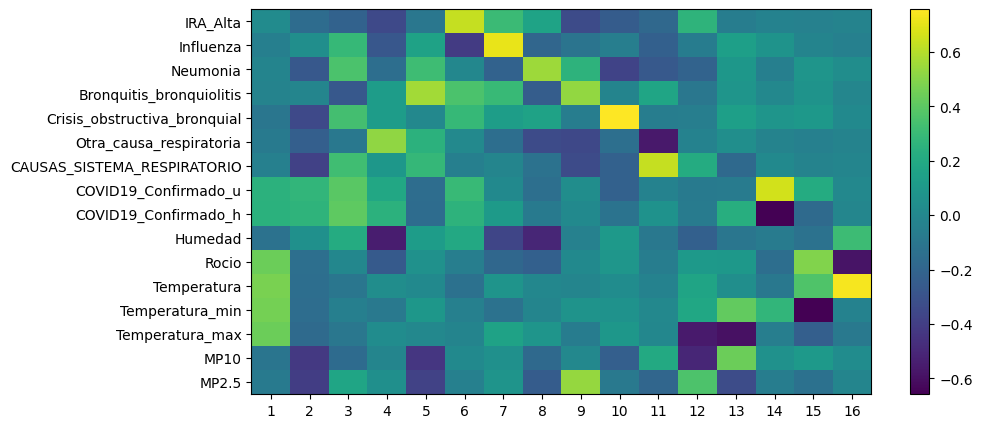

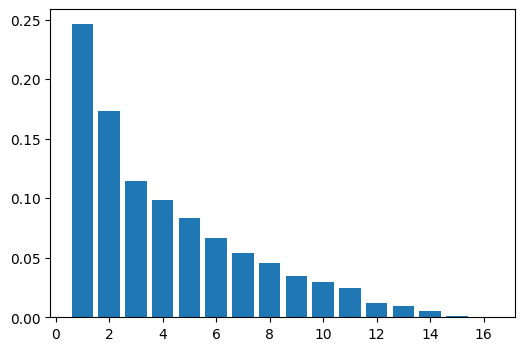

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.24639142 0.41944074 0.53386068 0.63205697 0.71571631 0.78231918
 0.83640651 0.88209819 0.91715402 0.94672467 0.97168353 0.98392507
 0.99352201 0.9984957  0.99980684 1.        ]


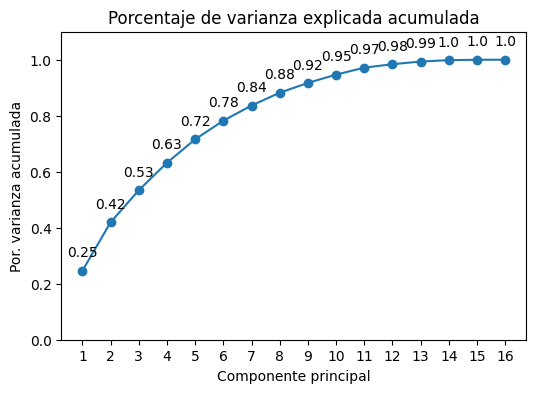

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.025980  -0.049331 -0.021939                 -0.025224   
PC2 -0.158740   0.042192 -0.268328                 -0.011771   
PC3 -0.211413   0.290240  0.356449                 -0.269365   
PC4 -0.345187  -0.274682 -0.148758                  0.125239   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.102157                -0.076599   
PC2                     -0.344813                -0.227576   
PC3                      0.335338                -0.090102   
PC4                      0.124927                 0.522666   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                    -0.040981              0.253425              0.244728   
PC2                    -0.383925              0.272972              0.262072   
PC3                     0.322371              0.392772              0.408258   
PC4                     0.088127              0.190854              0.250506   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.124960  0.437425     0.472824         0.462020         0.436703   
PC2  0.050921 -0.139120    -0.149224        -0.150699        -0.170529   
PC3  0.213443 -0.003752    -0.104320        -0.046938        -0.098037   
PC4 -0.542467 -0.255755     0.033054        -0.087507         0.031148   

         MP10     MP2.5  
PC1 -0.110494 -0.082311  
PC2 -0.424950 -0.403750  
PC3 -0.166259  0.173501  
PC4 -0.011694  0.048074

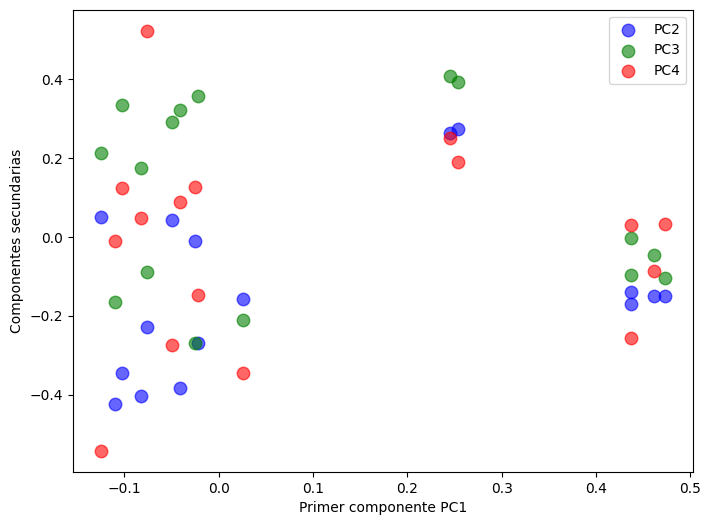

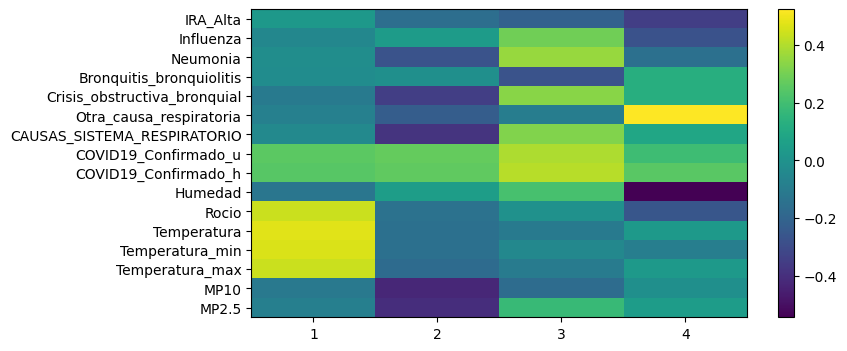

In [31]:
algoritmo_dataframe(diccionario['nov_dicDFde65ymas'])

### Dentro de este pequeño for esta el describe de cada una de los 36 dataframes (cada periodo y categoria)

In [8]:
#print(list(map(lambda x:diccionario[x].describe(), diccionario)))
for i in diccionario:
    print('     Periodo y categoria: '+i)
    display(diccionario[i].describe())
#dataframefinal.describe() 
#Count = cantidad de datos
#Mean = promedio 
#std = desviación estandar
#min = mínimo
#max = máximo

     Periodo y categoria: ene_febDFtotaltodos


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.00000                  40.00000   
mean    63.875000   1.850000   6.60000                  13.92500   
std     19.682333   2.154899   2.93345                   7.57319   
min     34.000000   0.000000   1.00000                   1.00000   
25%     53.000000   0.000000   4.00000                   9.00000   
50%     59.000000   1.000000   7.00000                  13.50000   
75%     71.250000   3.000000   8.00000                  19.50000   
max    119.000000   9.000000  13.00000                  30.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      13.100000                 9.500000   
std                        5.285685                 3.658499   
min                        4.000000                 2.000000   
25%                        9.750000                 7.750000   
50%                       13.000000                 9.000000   
75%                       16.000000                11.250000   
max                       25.000000                19.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      7.400000              3.600000   
std                       3.053371              7.631917   
min                       3.000000              0.000000   
25%                       5.000000              0.000000   
50%                       6.500000              0.000000   
75%                      10.250000              0.000000   
max                      13.000000             29.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               2.100000  65.595000  11.415000    18.672500   
std                4.539287   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max               18.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFmenores


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.00000                 40.000000   
mean    8.950000   0.125000   0.15000                  4.500000   
std     4.755294   0.515777   0.36162                  3.250247   
min     1.000000   0.000000   0.00000                  0.000000   
25%     5.750000   0.000000   0.00000                  2.000000   
50%     8.000000   0.000000   0.00000                  4.500000   
75%    13.000000   0.000000   0.00000                  7.000000   
max    18.000000   3.000000   1.00000                 11.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.050000                 0.625000   
std                        0.220721                 0.867874   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      0.250000              0.025000   
std                       0.543021              0.158114   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       0.000000              0.000000   
max                       2.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.025000  65.595000  11.415000    18.672500   
std                0.158114   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max                1.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   18.725000   0.350000   0.475000                  5.950000   
std     9.969151   0.769615   0.750641                  3.630003   
min     4.000000   0.000000   0.000000                  0.000000   
25%    12.000000   0.000000   0.000000                  3.000000   
50%    18.000000   0.000000   0.000000                  6.000000   
75%    23.000000   0.000000   1.000000                  8.250000   
max    46.000000   3.000000   3.000000                 13.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.125000                 0.500000   
std                        0.334932                 0.905822   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.250000                   0.0   
std                       0.630425                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       3.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.595000  11.415000    18.672500   
std                     0.0   3.015511   2.522976     2.407466   
min                     0.0  58.100000   5.800000    14.000000   
25%                     0.0  63.825000  10.475000    17.125000   
50%                     0.0  65.750000  11.950000    18.950000   
75%                     0.0  67.500000  13.000000    20.025000   
max                     0.0  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde5a14


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.00000                 40.000000   
mean   15.650000   0.700000   0.15000                  3.175000   
std     8.125774   0.939176   0.36162                  2.406055   
min     2.000000   0.000000   0.00000                  0.000000   
25%     9.000000   0.000000   0.00000                  1.000000   
50%    15.000000   0.000000   0.00000                  2.500000   
75%    21.000000   2.000000   0.00000                  5.000000   
max    33.000000   3.000000   1.00000                  8.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.575000                 0.800000   
std                        0.594311                 1.362501   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 0.000000   
75%                        1.000000                 1.000000   
max                        2.000000                 6.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.200000                   0.0   
std                       0.516398                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       2.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.595000  11.415000    18.672500   
std                     0.0   3.015511   2.522976     2.407466   
min                     0.0  58.100000   5.800000    14.000000   
25%                     0.0  63.825000  10.475000    17.125000   
50%                     0.0  65.750000  11.950000    18.950000   
75%                     0.0  67.500000  13.000000    20.025000   
max                     0.0  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   19.025000   0.600000   2.950000                  0.250000   
std     8.939935   1.007663   2.194983                  0.630425   
min     8.000000   0.000000   0.000000                  0.000000   
25%    13.000000   0.000000   1.000000                  0.000000   
50%    16.000000   0.000000   3.000000                  0.000000   
75%    24.000000   1.000000   5.000000                  0.000000   
max    43.000000   4.000000   7.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       7.050000                 4.075000   
std                        3.396454                 1.831176   
min                        1.000000                 0.000000   
25%                        4.750000                 3.000000   
50%                        7.000000                 4.000000   
75%                        9.000000                 5.000000   
max                       18.000000                 8.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.150000              2.350000   
std                       2.032429              4.959063   
min                       0.000000              0.000000   
25%                       1.750000              0.000000   
50%                       3.000000              0.000000   
75%                       5.000000              0.000000   
max                       8.000000             18.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               1.250000  65.595000  11.415000    18.672500   
std                2.686624   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max               10.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean    1.525000   0.075000   2.875000                  0.050000   
std     1.601081   0.266747   1.588218                  0.220721   
min     0.000000   0.000000   0.000000                  0.000000   
25%     0.000000   0.000000   2.000000                  0.000000   
50%     1.000000   0.000000   3.000000                  0.000000   
75%     2.000000   0.000000   4.000000                  0.000000   
max     7.000000   1.000000   7.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                     40.0   
mean                       5.300000                      3.5   
std                        2.936944                      2.0   
min                        1.000000                      0.0   
25%                        3.000000                      2.0   
50%                        5.000000                      3.0   
75%                        7.000000                      4.0   
max                       12.000000                      9.0   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.550000              1.225000   
std                       1.866712              2.731464   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.250000              0.000000   
max                       8.000000             11.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.825000  65.595000  11.415000    18.672500   
std                1.920036   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max                8.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: mar_abrDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    93.155556   3.111111   6.622222                 31.288889   
std     39.773767   3.785272   3.235379                 26.578035   
min     23.000000   0.000000   0.000000                  0.000000   
25%     56.000000   0.000000   4.000000                  4.000000   
50%    102.000000   2.000000   6.000000                 20.000000   
75%    123.000000   5.000000   9.000000                 56.000000   
max    171.000000  15.000000  14.000000                 88.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      16.311111                11.266667   
std                        7.159933                 3.990899   
min                        4.000000                 4.000000   
25%                       11.000000                 8.000000   
50%                       15.000000                11.000000   
75%                       22.000000                13.000000   
max                       30.000000                22.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      7.044444              7.133333   
std                       3.081879             15.564528   
min                       0.000000              0.000000   
25%                       5.000000              0.000000   
50%                       7.000000              0.000000   
75%                       9.000000              0.000000   
max                      14.000000             52.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count              45.00000  45.000000  45.000000    45.000000   
mean                3.80000  68.904444  10.371111    16.728889   
std                 8.47617   3.467443   1.722923     1.637296   
min                 0.00000  61.300000   6.600000    14.000000   
25%                 0.00000  66.700000   9.500000    15.500000   
50%                 0.00000  69.500000  10.300000    16.400000   
75%                 0.00000  70.800000  11.500000    18.100000   
max                30.00000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   12.088889   0.022222   0.177778                  6.666667   
std     8.081467   0.149071   0.490310                  6.131143   
min     0.000000   0.000000   0.000000                  0.000000   
25%     5.000000   0.000000   0.000000                  1.000000   
50%    12.000000   0.000000   0.000000                  6.000000   
75%    18.000000   0.000000   0.000000                 11.000000   
max    36.000000   1.000000   2.000000                 22.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                          45.0                45.000000   
mean                            0.0                 0.822222   
std                             0.0                 1.006544   
min                             0.0                 0.000000   
25%                             0.0                 0.000000   
50%                             0.0                 1.000000   
75%                             0.0                 1.000000   
max                             0.0                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      0.288889                   0.0   
std                       0.626034                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       3.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  68.904444  10.371111    16.728889   
std                0.149071   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                1.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   27.288889   0.400000   0.400000                 16.088889   
std    20.420157   1.031327   0.863397                 14.986088   
min     1.000000   0.000000   0.000000                  0.000000   
25%     8.000000   0.000000   0.000000                  1.000000   
50%    23.000000   0.000000   0.000000                 10.000000   
75%    43.000000   0.000000   0.000000                 29.000000   
max    89.000000   6.000000   4.000000                 51.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.333333                 0.822222   
std                        0.768706                 1.050733   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 1.000000   
max                        3.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      0.355556                   0.0   
std                       0.570309                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       1.000000                   0.0   
max                       2.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  68.904444  10.371111    16.728889   
std                0.149071   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                1.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   21.288889   1.088889   0.311111                  7.888889   
std    13.076040   1.592914   0.668180                  7.046025   
min     2.000000   0.000000   0.000000                  0.000000   
25%     9.000000   0.000000   0.000000                  2.000000   
50%    24.000000   0.000000   0.000000                  6.000000   
75%    30.000000   2.000000   0.000000                 14.000000   
max    45.000000   6.000000   3.000000                 24.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.866667                 0.866667   
std                        1.159937                 0.919486   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        1.000000                 1.000000   
max                        5.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.511111              0.177778   
std                       0.869227              0.534657   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       4.000000              3.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.044444  68.904444  10.371111    16.728889   
std                0.298142   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                2.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    30.577778   1.555556   3.022222                  0.422222   
std     19.719037   3.151879   2.359593                  0.753443   
min     12.000000   0.000000   0.000000                  0.000000   
25%     21.000000   0.000000   2.000000                  0.000000   
50%     25.000000   0.000000   2.000000                  0.000000   
75%     30.000000   1.000000   4.000000                  1.000000   
max    123.000000  15.000000  10.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       9.933333                 5.155556   
std                        5.029007                 3.044784   
min                        1.000000                 1.000000   
25%                        7.000000                 3.000000   
50%                        9.000000                 4.000000   
75%                       13.000000                 6.000000   
max                       22.000000                18.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      2.844444              5.866667   
std                       1.594815             13.028989   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       3.000000              0.000000   
max                       8.000000             43.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               3.000000  68.904444  10.371111    16.728889   
std                6.855655   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max               24.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.911111   0.044444   2.711111                  0.222222   
std     1.221441   0.208409   1.575699                  0.471405   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   3.000000                  0.000000   
max     5.000000   1.000000   7.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       5.177778                 3.600000   
std                        2.846760                 1.737292   
min                        0.000000                 0.000000   
25%                        3.000000                 2.000000   
50%                        5.000000                 4.000000   
75%                        7.000000                 5.000000   
max                       15.000000                 7.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.044444              1.088889   
std                       1.953500              2.391483   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.000000              0.000000   
max                       7.000000              9.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.711111  68.904444  10.371111    16.728889   
std                1.659987   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                6.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: may_junDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.000000                 40.000000   
mean   113.475000  10.975000   9.450000                 50.050000   
std     54.904106  11.796322   6.404926                 42.838366   
min     39.000000   0.000000   2.000000                  0.000000   
25%     66.500000   1.750000   5.750000                  3.000000   
50%    114.000000   8.500000   7.000000                 57.000000   
75%    152.000000  15.250000  11.000000                 82.250000   
max    287.000000  49.000000  27.000000                150.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      24.275000                13.025000   
std                       19.504092                 6.362903   
min                        5.000000                 3.000000   
25%                        9.750000                 9.000000   
50%                       20.500000                12.000000   
75%                       32.000000                17.500000   
max                       96.000000                26.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                     10.825000              8.375000   
std                       5.481379             14.527935   
min                       2.000000              0.000000   
25%                       7.000000              0.000000   
50%                       9.000000              0.000000   
75%                      15.000000              7.000000   
max                      26.000000             42.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               4.775000  65.915000   7.385000    14.675000   
std                8.477686   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                4.000000  68.800000   9.125000    16.100000   
max               25.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                  40.00000   
mean   13.825000   0.125000   0.525000                  11.22500   
std     8.926732   0.404304   1.535687                  10.52832   
min     2.000000   0.000000   0.000000                   0.00000   
25%     6.000000   0.000000   0.000000                   0.75000   
50%    13.500000   0.000000   0.000000                  11.00000   
75%    22.000000   0.000000   0.000000                  19.25000   
max    29.000000   2.000000   8.000000                  39.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.075000                 0.850000   
std                        0.266747                 1.098951   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.250000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      1.375000              0.100000   
std                       2.108438              0.303822   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.500000              0.000000   
75%                       2.250000              0.000000   
max                       9.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.050000  65.915000   7.385000    14.675000   
std                0.220721   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.000000  68.800000   9.125000    16.100000   
max                1.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                  40.00000   
mean   33.975000   2.000000   1.025000                  25.65000   
std    23.907393   3.544588   2.056728                  22.28205   
min     1.000000   0.000000   0.000000                   0.00000   
25%    11.000000   0.000000   0.000000                   1.00000   
50%    38.500000   0.000000   0.000000                  29.00000   
75%    52.250000   2.250000   1.000000                  44.00000   
max    78.000000  15.000000  10.000000                  69.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.250000                 0.950000   
std                        0.630425                 1.036513   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 1.000000   
max                        3.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.925000                   0.0   
std                       1.268706                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       1.000000                   0.0   
75%                       1.000000                   0.0   
max                       5.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.915000   7.385000    14.675000   
std                     0.0   5.497811   2.379674     1.758897   
min                     0.0  51.200000   0.700000    11.100000   
25%                     0.0  63.425000   6.450000    13.275000   
50%                     0.0  66.850000   7.850000    14.450000   
75%                     0.0  68.800000   9.125000    16.100000   
max                     0.0  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.000000                 40.000000   
mean    27.650000   4.375000   0.500000                 12.425000   
std     22.517856   7.564043   1.176697                 11.390251   
min      1.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  2.000000   
50%     26.500000   1.500000   0.000000                 13.000000   
75%     41.250000   4.250000   0.000000                 18.250000   
max    102.000000  36.000000   5.000000                 48.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                      40.00000                40.000000   
mean                        1.45000                 0.925000   
std                         1.69388                 1.185111   
min                         0.00000                 0.000000   
25%                         0.00000                 0.000000   
50%                         1.00000                 0.000000   
75%                         2.00000                 2.000000   
max                         7.00000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      0.575000              0.125000   
std                       0.812956              0.334932   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.075000  65.915000   7.385000    14.675000   
std                0.266747   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.000000  68.800000   9.125000    16.100000   
max                1.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   35.725000   4.350000   4.125000                  0.675000   
std    14.783892   6.908004   2.728647                  2.004962   
min    15.000000   0.000000   0.000000                  0.000000   
25%    25.000000   0.000000   2.000000                  0.000000   
50%    32.500000   1.000000   3.500000                  0.000000   
75%    42.500000   3.500000   5.250000                  0.250000   
max    81.000000  24.000000  11.000000                 12.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      15.075000                 5.925000   
std                       13.303918                 3.392204   
min                        3.000000                 1.000000   
25%                        6.750000                 3.000000   
50%                       12.000000                 5.500000   
75%                       19.250000                 8.000000   
max                       68.000000                17.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.700000              6.400000   
std                       1.727604             11.010019   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       5.000000              6.250000   
max                       8.000000             33.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               3.375000  65.915000   7.385000    14.675000   
std                6.002937   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                3.750000  68.800000   9.125000    16.100000   
max               18.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean    2.300000   0.125000   3.275000                  0.075000   
std     1.842518   0.404304   2.364128                  0.266747   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   1.750000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   5.000000                  0.000000   
max     7.000000   2.000000  10.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       7.425000                 4.375000   
std                        5.930743                 2.958582   
min                        1.000000                 0.000000   
25%                        3.000000                 2.750000   
50%                        6.000000                 4.000000   
75%                       10.000000                 6.000000   
max                       25.000000                13.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      4.250000              1.750000   
std                       2.888971              3.432499   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       6.000000              1.000000   
max                      10.000000             11.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               1.275000  65.915000   7.385000    14.675000   
std                2.611488   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.250000  68.800000   9.125000    16.100000   
max                9.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: jul_agoDFtotaltodos


IRA_Alta   Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000   45.000000  45.000000                 45.000000   
mean   121.488889   19.555556  13.400000                 59.088889   
std     77.986777   24.032701   9.691608                 53.343579   
min     39.000000    0.000000   0.000000                  0.000000   
25%     66.000000    6.000000   7.000000                  5.000000   
50%     94.000000   13.000000  10.000000                 67.000000   
75%    155.000000   26.000000  16.000000                 89.000000   
max    397.000000  133.000000  42.000000                193.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      30.422222                14.222222   
std                       20.487789                 8.298107   
min                        4.000000                 2.000000   
25%                       13.000000                 9.000000   
50%                       28.000000                12.000000   
75%                       41.000000                19.000000   
max                      102.000000                35.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                     45.00000             45.000000   
mean                      15.60000              7.088889   
std                        8.81476             11.833739   
min                        0.00000              0.000000   
25%                        8.00000              0.000000   
50%                       14.00000              0.000000   
75%                       23.00000             11.000000   
max                       33.00000             46.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               3.688889  66.402222   7.342222    14.486667   
std                6.189515   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                5.000000  69.400000   8.400000    15.600000   
max               22.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   15.044444   0.288889   0.955556                 16.933333   
std    10.101655   0.626034   1.623066                 16.410086   
min     0.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  1.000000   
50%    14.000000   0.000000   0.000000                 15.000000   
75%    22.000000   0.000000   1.000000                 28.000000   
max    40.000000   3.000000   8.000000                 53.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                          45.0                45.000000   
mean                            0.0                 0.866667   
std                             0.0                 1.057441   
min                             0.0                 0.000000   
25%                             0.0                 0.000000   
50%                             0.0                 1.000000   
75%                             0.0                 1.000000   
max                             0.0                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.355556              0.044444   
std                       3.536534              0.208409   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       2.000000              0.000000   
75%                       6.000000              0.000000   
max                      11.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  66.402222   7.342222    14.486667   
std                0.149071   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                0.000000  69.400000   8.400000    15.600000   
max                1.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    31.688889   3.311111   1.911111                 28.666667   
std     26.261640   5.636013   2.826998                 26.224555   
min      1.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  2.000000   
50%     30.000000   1.000000   1.000000                 29.000000   
75%     48.000000   5.000000   3.000000                 47.000000   
max    113.000000  28.000000  12.000000                 82.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.222222                 0.555556   
std                        0.559581                 1.098668   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        2.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      1.733333              0.022222   
std                       2.071451              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       1.000000              0.000000   
75%                       3.000000              0.000000   
max                       7.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.402222   7.342222    14.486667   
std                     0.0   4.659911   1.779873     1.565915   
min                     0.0  53.700000   1.900000    11.600000   
25%                     0.0  63.500000   6.600000    13.600000   
50%                     0.0  66.700000   7.500000    14.300000   
75%                     0.0  69.400000   8.400000    15.600000   
max                     0.0  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    31.488889   8.911111   0.577778                 12.688889   
std     41.502805  16.651266   1.033284                 14.075805   
min      2.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  1.000000   
50%     17.000000   3.000000   0.000000                  8.000000   
75%     41.000000  11.000000   1.000000                 20.000000   
max    195.000000  94.000000   4.000000                 56.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.244444                 0.955556   
std                        1.568954                 1.296070   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 1.000000   
75%                        2.000000                 2.000000   
max                        8.000000                 7.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.555556              0.022222   
std                       0.813398              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.402222   7.342222    14.486667   
std                     0.0   4.659911   1.779873     1.565915   
min                     0.0  53.700000   1.900000    11.600000   
25%                     0.0  63.500000   6.600000    13.600000   
50%                     0.0  66.700000   7.500000    14.300000   
75%                     0.0  69.400000   8.400000    15.600000   
max                     0.0  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   40.444444   6.444444   4.555556                  0.711111   
std    14.782600   6.753974   2.996631                  0.968181   
min    16.000000   0.000000   0.000000                  0.000000   
25%    28.000000   1.000000   3.000000                  0.000000   
50%    40.000000   4.000000   4.000000                  0.000000   
75%    51.000000  10.000000   5.000000                  1.000000   
max    69.000000  24.000000  15.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      17.977778                 5.866667   
std                       12.364702                 3.858874   
min                        2.000000                 0.000000   
25%                        9.000000                 3.000000   
50%                       17.000000                 5.000000   
75%                       24.000000                 8.000000   
max                       73.000000                20.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.844444              5.222222   
std                       2.235616              8.933820   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       5.000000              9.000000   
max                       8.000000             33.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               2.555556  66.402222   7.342222    14.486667   
std                4.293523   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                4.000000  69.400000   8.400000    15.600000   
max               14.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    2.822222   0.600000   5.400000                  0.088889   
std     2.433562   1.074498   4.030565                  0.358166   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   4.000000                  0.000000   
75%     4.000000   1.000000   8.000000                  0.000000   
max    12.000000   4.000000  17.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      10.977778                 5.977778   
std                        8.539983                 3.822713   
min                        0.000000                 1.000000   
25%                        4.000000                 3.000000   
50%                        9.000000                 5.000000   
75%                       16.000000                 8.000000   
max                       33.000000                18.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      6.111111              1.777778   
std                       3.984186              3.103436   
min                       0.000000              0.000000   
25%                       3.000000              0.000000   
50%                       6.000000              0.000000   
75%                       8.000000              3.000000   
max                      16.000000             12.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               1.111111  66.402222   7.342222    14.486667   
std                2.123700   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                1.000000  69.400000   8.400000    15.600000   
max                9.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: sep_octDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean   103.288889   7.977778  10.133333                 45.933333   
std     63.833456  12.721651   5.998485                 37.895430   
min     22.000000   0.000000   1.000000                  1.000000   
25%     52.000000   2.000000   5.000000                  7.000000   
50%     97.000000   5.000000  10.000000                 50.000000   
75%    143.000000  10.000000  15.000000                 70.000000   
max    324.000000  84.000000  25.000000                148.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      23.133333                13.600000   
std                       13.198829                 5.424691   
min                        3.000000                 2.000000   
25%                       10.000000                10.000000   
50%                       24.000000                14.000000   
75%                       34.000000                17.000000   
max                       51.000000                24.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                     11.066667              2.355556   
std                       4.928581              3.778862   
min                       3.000000              0.000000   
25%                       8.000000              0.000000   
50%                      10.000000              0.000000   
75%                      14.000000              4.000000   
max                      23.000000             14.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               1.200000  66.411111   8.622222    15.677778   
std                1.949359   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                2.000000  68.500000   9.400000    16.300000   
max                8.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   12.888889   0.133333   0.466667                 11.311111   
std     8.581752   0.343776   0.726135                  9.739382   
min     0.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  1.000000   
50%    12.000000   0.000000   0.000000                 14.000000   
75%    20.000000   0.000000   1.000000                 17.000000   
max    34.000000   1.000000   2.000000                 34.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.044444                 1.088889   
std                        0.208409                 1.104170   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 2.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      1.311111              0.044444   
std                       1.458864              0.208409   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       1.000000              0.000000   
75%                       2.000000              0.000000   
max                       6.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.411111   8.622222    15.677778   
std                     0.0   3.159705   1.013744     1.049868   
min                     0.0  59.400000   6.300000    12.400000   
25%                     0.0  64.600000   7.900000    15.000000   
50%                     0.0  66.900000   8.700000    15.800000   
75%                     0.0  68.500000   9.400000    16.300000   
max                     0.0  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   33.288889   1.600000   1.511111                 21.933333   
std    23.068694   2.387467   1.713877                 17.429599   
min     2.000000   0.000000   0.000000                  0.000000   
25%    11.000000   0.000000   0.000000                  5.000000   
50%    39.000000   0.000000   1.000000                 22.000000   
75%    51.000000   3.000000   3.000000                 33.000000   
max    76.000000   9.000000   6.000000                 61.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.222222                 0.466667   
std                        0.420437                 0.694131   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      1.177778                   0.0   
std                       1.599558                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       2.000000                   0.0   
max                       5.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.411111   8.622222    15.677778   
std                     0.0   3.159705   1.013744     1.049868   
min                     0.0  59.400000   6.300000    12.400000   
25%                     0.0  64.600000   7.900000    15.000000   
50%                     0.0  66.900000   8.700000    15.800000   
75%                     0.0  68.500000   9.400000    16.300000   
max                     0.0  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    27.311111   3.200000   0.711111                 12.177778   
std     26.072297  10.100855   1.057919                 12.175402   
min      2.000000   0.000000   0.000000                  0.000000   
25%      7.000000   0.000000   0.000000                  2.000000   
50%     24.000000   1.000000   0.000000                 12.000000   
75%     36.000000   3.000000   1.000000                 18.000000   
max    144.000000  68.000000   4.000000                 59.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.466667                 0.955556   
std                        1.341641                 1.065056   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 1.000000   
75%                        3.000000                 2.000000   
max                        4.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.533333              0.066667   
std                       0.814639              0.252262   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  66.411111   8.622222    15.677778   
std                0.149071   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                0.000000  68.500000   9.400000    16.300000   
max                1.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   27.866667   2.733333   3.755556                  0.355556   
std    14.386863   4.196319   2.337010                  0.679423   
min    11.000000   0.000000   0.000000                  0.000000   
25%    19.000000   0.000000   2.000000                  0.000000   
50%    24.000000   1.000000   3.000000                  0.000000   
75%    35.000000   3.000000   5.000000                  1.000000   
max    82.000000  21.000000   9.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      13.288889                 5.644444   
std                        8.052730                 3.083354   
min                        1.000000                 1.000000   
25%                        7.000000                 3.000000   
50%                       12.000000                 5.000000   
75%                       19.000000                 8.000000   
max                       35.000000                13.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.333333              1.266667   
std                       2.044949              2.415857   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.000000              2.000000   
max                       9.000000             13.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.644444  66.411111   8.622222    15.677778   
std                1.281965   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                1.000000  68.500000   9.400000    16.300000   
max                7.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.933333   0.311111   3.688889                  0.155556   
std     1.601136   0.763432   2.626977                  0.366529   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   5.000000                  0.000000   
max     6.000000   4.000000  10.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       8.111111                 5.444444   
std                        4.777895                 2.935330   
min                        1.000000                 0.000000   
25%                        4.000000                 3.000000   
50%                        8.000000                 5.000000   
75%                       12.000000                 8.000000   
max                       18.000000                10.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      4.711111              0.977778   
std                       2.464495              1.738454   
min                       1.000000              0.000000   
25%                       3.000000              0.000000   
50%                       4.000000              0.000000   
75%                       6.000000              1.000000   
max                      11.000000              7.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.533333  66.411111   8.622222    15.677778   
std                1.013545   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                1.000000  68.500000   9.400000    16.300000   
max                4.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: nov_dicDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    76.111111   2.844444   6.533333                 24.177778   
std     24.773723   2.984472   4.580591                 15.306399   
min     30.000000   0.000000   0.000000                  1.000000   
25%     57.000000   0.000000   4.000000                 11.000000   
50%     70.000000   2.000000   5.000000                 23.000000   
75%     98.000000   4.000000   7.000000                 40.000000   
max    129.000000  11.000000  29.000000                 52.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      16.955556                11.177778   
std                        6.498096                 3.921322   
min                        8.000000                 2.000000   
25%                       12.000000                 9.000000   
50%                       16.000000                11.000000   
75%                       20.000000                13.000000   
max                       32.000000                21.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      7.711111              1.555556   
std                       3.223650              2.759739   
min                       2.000000              0.000000   
25%                       6.000000              0.000000   
50%                       8.000000              0.000000   
75%                       9.000000              2.000000   
max                      14.000000             10.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.933333  65.597778  10.406667    17.664444   
std                1.737292   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                1.000000  67.100000  11.400000    19.100000   
max                6.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    9.844444   0.133333   0.288889                  6.600000   
std     4.790879   0.343776   0.842675                  5.284626   
min     3.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  3.000000   
50%     9.000000   0.000000   0.000000                  6.000000   
75%    13.000000   0.000000   0.000000                 10.000000   
max    23.000000   1.000000   5.000000                 18.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.022222                 0.711111   
std                        0.149071                 0.968181   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.733333              0.022222   
std                       1.031327              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       4.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  65.597778  10.406667    17.664444   
std                     0.0   2.795165   1.741655     1.752810   
min                     0.0  59.300000   5.200000    13.800000   
25%                     0.0  64.000000   9.700000    16.700000   
50%                     0.0  65.900000  11.000000    18.100000   
75%                     0.0  67.100000  11.400000    19.100000   
max                     0.0  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   25.555556   0.755556   0.711111                 11.444444   
std    13.740378   1.170772   1.198905                  7.281844   
min     3.000000   0.000000   0.000000                  1.000000   
25%    14.000000   0.000000   0.000000                  4.000000   
50%    25.000000   0.000000   0.000000                 11.000000   
75%    37.000000   1.000000   1.000000                 18.000000   
max    55.000000   5.000000   6.000000                 27.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.244444                 0.777778   
std                        0.484090                 1.084789   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        2.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                     45.00000                  45.0   
mean                       0.60000                   0.0   
std                        0.83666                   0.0   
min                        0.00000                   0.0   
25%                        0.00000                   0.0   
50%                        0.00000                   0.0   
75%                        1.00000                   0.0   
max                        3.00000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  65.597778  10.406667    17.664444   
std                     0.0   2.795165   1.741655     1.752810   
min                     0.0  59.300000   5.200000    13.800000   
25%                     0.0  64.000000   9.700000    16.700000   
50%                     0.0  65.900000  11.000000    18.100000   
75%                     0.0  67.100000  11.400000    19.100000   
max                     0.0  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   16.866667   1.244444   0.622222                  5.844444   
std     9.930669   1.944170   1.301902                  5.160847   
min     2.000000   0.000000   0.000000                  0.000000   
25%     9.000000   0.000000   0.000000                  2.000000   
50%    15.000000   0.000000   0.000000                  4.000000   
75%    24.000000   1.000000   1.000000                  9.000000   
max    37.000000   8.000000   5.000000                 19.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.000000                 1.111111   
std                        1.224745                 1.091751   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        2.000000                 2.000000   
max                        4.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.466667              0.044444   
std                       0.756787              0.298142   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              2.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  65.597778  10.406667    17.664444   
std                0.149071   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                0.000000  67.100000  11.400000    19.100000   
max                1.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   22.266667   0.666667   1.888889                  0.200000   
std    11.414504   1.187051   1.283146                  0.504525   
min     3.000000   0.000000   0.000000                  0.000000   
25%    14.000000   0.000000   1.000000                  0.000000   
50%    21.000000   0.000000   2.000000                  0.000000   
75%    26.000000   1.000000   2.000000                  0.000000   
max    54.000000   6.000000   5.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       9.111111                 4.488889   
std                        3.821127                 2.201469   
min                        2.000000                 0.000000   
25%                        6.000000                 3.000000   
50%                        9.000000                 5.000000   
75%                       11.000000                 6.000000   
max                       20.000000                 9.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      2.577778              0.888889   
std                       1.405976              1.909572   
min                       0.000000              0.000000   
25%                       1.000000              0.000000   
50%                       3.000000              0.000000   
75%                       3.000000              1.000000   
max                       6.000000              8.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.511111  65.597778  10.406667    17.664444   
std                1.179796   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                0.000000  67.100000  11.400000    19.100000   
max                5.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.577778   0.044444   3.022222                  0.088889   
std     1.529838   0.208409   1.971258                  0.287799   
min     0.000000   0.000000   0.000000                  0.000000   
25%     0.000000   0.000000   2.000000                  0.000000   
50%     1.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   4.000000                  0.000000   
max     6.000000   1.000000   8.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       6.577778                 4.088889   
std                        3.421117                 2.234260   
min                        1.000000                 0.000000   
25%                        4.000000                 2.000000   
50%                        6.000000                 4.000000   
75%                        9.000000                 5.000000   
max                       14.000000                11.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.333333              0.600000   
std                       1.745123              1.232145   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       5.000000              0.000000   
max                       7.000000              4.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count              45.00000  45.000000  45.000000    45.000000   
mean                0.40000  65.597778  10.406667    17.664444   
std                 0.83666   2.795165   1.741655     1.752810   
min                 0.00000  59.300000   5.200000    13.800000   
25%                 0.00000  64.000000   9.700000    16.700000   
50%                 0.00000  65.900000  11.000000    18.100000   
75%                 0.00000  67.100000  11.400000    19.100000   
max                 4.00000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

In [16]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#este for permite convertir los datos numericos en cadenas de texto que representan las categorias, solo se ejecuta una vez
#for clave in dfcategorico2:
#    minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
#    maximo = dfcategorico2.describe()[clave]['max']
#    quinto = ( maximo - minimo ) / 5 # obtengo un quinto de la diferencia#
#
#    dfcategorico2[clave] = pd.cut(x=dfcategorico2[clave], bins=[ minimo - 1 , minimo + quinto, minimo + quinto*2 , minimo + quinto*3, minimo + quinto*4 , maximo ] ,
#                               labels=[clave +'_Muy_Bajo', clave +'_Bajo', clave +'_Medio', clave +'_Alto',clave +'_Muy_Alto'])
#

In [9]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#A partir de aqui implemento apriori
from mlxtend.frequent_patterns import apriori, association_rules 

def funcion_apriori(dfcategorico2):
    dfapriori = pd.DataFrame(
        data=False,
        index=np.arange(dfcategorico2.shape[0]),
        columns = ['IRA_Alta_Muy_Bajo','IRA_Alta_Bajo', 'IRA_Alta_Medio', 'IRA_Alta_Alto', 'IRA_Alta_Muy_Alto', 'Influenza_Muy_Bajo', 'Influenza_Bajo', 'Influenza_Medio', 'Influenza_Alto', 'Influenza_Muy_Alto','Neumonia_Muy_Bajo','Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto', 'Neumonia_Muy_Alto','Bronquitis_bronquiolitis_Muy_Bajo','Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto', 'Bronquitis_bronquiolitis_Muy_Alto','Crisis_obstructiva_bronquial_Muy_Bajo','Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto', 'Crisis_obstructiva_bronquial_Muy_Alto','Otra_causa_respiratoria_Muy_Bajo','Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto', 'Otra_causa_respiratoria_Muy_Alto','CAUSAS_SISTEMA_RESPIRATORIO_Muy_Bajo','CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto', 'CAUSAS_SISTEMA_RESPIRATORIO_Muy_Alto','COVID19_Confirmado_u_Muy_Bajo','COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto', 'COVID19_Confirmado_u_Muy_Alto','COVID19_Confirmado_h_Muy_Bajo','COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto', 'COVID19_Confirmado_h_Muy_Alto','Humedad_Muy_Bajo','Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto', 'Humedad_Muy_Alto','Rocio_Muy_Bajo','Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto', 'Rocio_Muy_Alto','Temperatura_Muy_Bajo','Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto', 'Temperatura_Muy_Alto','Temperatura_min_Muy_Bajo','Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto', 'Temperatura_min_Muy_Alto','Temperatura_max_Muy_Bajo','Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto', 'Temperatura_max_Muy_Alto','MP10_Muy_Bajo','MP10_Bajo', 'MP10_Medio', 'MP10_Alto', 'MP10_Muy_Alto','MP2.5_Muy_Bajo','MP2.5_Bajo' ,'MP2.5_Medio', 'MP2.5_Alto', 'MP2.5_Muy_Alto']
    )

    for clave in dfcategorico2:
        minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
        maximo = dfcategorico2.describe()[clave]['max']
        quinto = ( maximo - minimo ) / 5 # obtengo un quinto de la diferencia
        for indice in range(0, dfcategorico2.shape[0]):

            if(dfcategorico2[clave][indice] < minimo+ quinto):
                dfapriori[clave+'_Muy_Bajo'][indice] = True
            elif(dfcategorico2[clave][indice] < minimo+ quinto*2):
                dfapriori[clave+'_Bajo'][indice] = True
            elif(dfcategorico2[clave][indice] < minimo+ quinto*3):
                dfapriori[clave+'_Medio'][indice] = True
            elif(dfcategorico2[clave][indice] < minimo+ quinto*4):
                dfapriori[clave+'_Alto'][indice] = True
            else:
                dfapriori[clave+'_Muy_Alto'][indice] = True
                
    dfapriori.rename(columns={'IRA_Alta_Muy_Bajo':'IRASu_B', 'IRA_Alta_Bajo':'IRASu_MB', 'IRA_Alta_Medio':'IRASu_M', 'IRA_Alta_Alto':'IRASu_MA',
       'IRA_Alta_Muy_Alto':'IRASu_A', 'Influenza_Muy_Bajo':'INFu_B', 'Influenza_Bajo':'INFu_MB',
       'Influenza_Medio':'INFu_M', 'Influenza_Alto':'INFu_MA', 'Influenza_Muy_Alto':'INFu_A',
       'Neumonia_Muy_Bajo':'NNIAu_B', 'Neumonia_Bajo':'NNIAu_MB', 'Neumonia_Medio':'NNIAu_M', 'Neumonia_Alto':'NNIAu_MA',
       'Neumonia_Muy_Alto':'NNIAu_A', 'Bronquitis_bronquiolitis_Muy_Bajo':'BROIu_B',
       'Bronquitis_bronquiolitis_Bajo':'BROIuMB', 'Bronquitis_bronquiolitis_Medio':'BROIuM',
       'Bronquitis_bronquiolitis_Alto':'BROIuMA', 'Bronquitis_bronquiolitis_Muy_Alto':'BROIuA',
       'Crisis_obstructiva_bronquial_Muy_Bajo':'COBuB',
       'Crisis_obstructiva_bronquial_Bajo':'COBuMB',
       'Crisis_obstructiva_bronquial_Medio':'COBuM',
       'Crisis_obstructiva_bronquial_Alto':'COBuMA',
       'Crisis_obstructiva_bronquial_Muy_Alto':'COBuA',
       'Otra_causa_respiratoria_Muy_Bajo':'OCRuB', 'Otra_causa_respiratoria_Bajo':'OCRuMB',
       'Otra_causa_respiratoria_Medio':'OCRuM', 'Otra_causa_respiratoria_Alto':'OCRuMA',
       'Otra_causa_respiratoria_Muy_Alto':'OCRuA',
       'CAUSAS_SISTEMA_RESPIRATORIO_Muy_Bajo':'CSRhB',
       'CAUSAS_SISTEMA_RESPIRATORIO_Bajo':'CSRhMB', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio':'CSRhM',
       'CAUSAS_SISTEMA_RESPIRATORIO_Alto':'CSRhMA',
       'CAUSAS_SISTEMA_RESPIRATORIO_Muy_Alto':'CSRhA', 'COVID19_Confirmado_u_Muy_Bajo':'COVIDuB',
       'COVID19_Confirmado_u_Bajo':'COVIDuMB', 'COVID19_Confirmado_u_Medio':'COVIDuM',
       'COVID19_Confirmado_u_Alto':'COVIDuMA', 'COVID19_Confirmado_u_Muy_Alto':'COVIDuA',
       'COVID19_Confirmado_h_Muy_Bajo':'COVIDhB', 'COVID19_Confirmado_h_Bajo':'COVIDhMB',
       'COVID19_Confirmado_h_Medio':'COVIDhM', 'COVID19_Confirmado_h_Alto':'COVIDhMA',
       'COVID19_Confirmado_h_Muy_Alto':'COVIDhA', 'Humedad_Muy_Bajo':'HB', 'Humedad_Bajo':'HMB',
       'Humedad_Medio':'HM', 'Humedad_Alto':'HMA', 'Humedad_Muy_Alto':'HA', 'Rocio_Muy_Bajo':'RB',
       'Rocio_Bajo':'RMB', 'Rocio_Medio':'RM', 'Rocio_Alto':'RMA', 'Rocio_Muy_Alto':'RA',
       'Temperatura_Muy_Bajo':'TB', 'Temperatura_Bajo':'TMB', 'Temperatura_Medio':'TM',
       'Temperatura_Alto':'TMA', 'Temperatura_Muy_Alto':'TA', 'Temperatura_min_Muy_Bajo':'TminB',
       'Temperatura_min_Bajo':'TminMB', 'Temperatura_min_Medio':'TminM', 'Temperatura_min_Alto':'TminMA',
       'Temperatura_min_Muy_Alto':'TminA', 'Temperatura_max_Muy_Bajo':'TmaxB',
       'Temperatura_max_Bajo':'TmaxMB', 'Temperatura_max_Medio':'TmaxM', 'Temperatura_max_Alto':'TmaxMA',
       'Temperatura_max_Muy_Alto':'TmaxA', 'MP10_Muy_Bajo':'MP10B', 'MP10_Bajo':'MP10MB', 'MP10_Medio':'MP10M',
       'MP10_Alto':'MP10MA', 'MP10_Muy_Alto':'MP10A', 'MP2.5_Muy_Bajo':'MP25B', 'MP2.5_Bajo':'MP25MB',
       'MP2.5_Medio':'MP25M', 'MP2.5_Alto':'MP25MA', 'MP2.5_Muy_Alto':'MP25A'}, inplace = True)
    
    return dfapriori

In [12]:
def reglas_asociacion(dfaprio,i):
    frq_items = apriori(dfaprio, min_support=0.18, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
    rules.to_csv('reglas_de_asociacion/reglas'+i+'.csv')
    display(rules)

## El proximo for muestra las reglas de asociacion
### Ajustadas con los parametros de la celda anterior (actualmente 18% minimo de soporte), ademas genera los archivos .csv que se encuentran en la carpeta "reglas_de_asociacion" ubicada en la raiz de este repositorio, *OJO* cada vez que se cambie los parametros de la celda anterior se sobreescribiran estos archivos, pero puede ejecutarse las veces que sean. Esta es la ultima celda que muestra informacion relevante.

In [13]:
for i in diccionario:
    df_apriori = funcion_apriori(diccionario[i])
    reglas_asociacion(df_apriori, i)

antecedents                        consequents  \
0                     (TminB)                               (TB)   
1                        (TB)                            (TminB)   
256   (TM, IRASu_MB, COVIDuB)                   (TminM, COVIDhB)   
258   (TM, COVIDhB, IRASu_MB)                   (TminM, COVIDuB)   
311  (INFu_B, TminM, COVIDuB)                      (TM, COVIDhB)   
..                        ...                                ...   
268       (IRASu_MB, COVIDuB)               (TM, TminM, COVIDhB)   
269       (COVIDhB, IRASu_MB)               (TM, TminM, COVIDuB)   
104                (IRASu_MB)           (TminM, COVIDuB, TmaxMA)   
121                (IRASu_MB)           (TminM, COVIDhB, TmaxMA)   
291                (IRASu_MB)  (TminM, COVIDhB, COVIDuB, TmaxMA)   

     antecedent support  consequent support  support  confidence      lift  \
0                 0.200               0.200      0.2    1.000000  5.000000   
1                 0.200               0.200      0.2    1.000000  5.000000   
256               0.200               0.250      0.2    1.000000  4.000000   
258               0.200               0.250      0.2    1.000000  4.000000   
311               0.200               0.250      0.2    1.000000  4.000000   
..                  ...                 ...      ...         ...       ...   
268               0.425               0.225      0.2    0.470588  2.091503   
269               0.425               0.225      0.2    0.470588  2.091503   
104               0.500               0.200      0.2    0.400000  2.000000   
121               0.500               0.200      0.2    0.400000  2.000000   
291               0.500               0.200      0.2    0.400000  2.000000   

     leverage  conviction  
0    0.160000         inf  
1    0.160000         inf  
256  0.150000         inf  
258  0.150000         inf  
311  0.150000         inf  
..        ...         ...  
268  0.104375    1.463889  
269  0.104375    1.463889  
104  0.100000    1.333333  
121  0.100000    1.333333  
291  0.100000    1.333333  

[322 rows x 9 columns]

antecedents                                     consequents  \
0               (TminB)                                            (TB)   
1                  (TB)                                         (TminB)   
6       (TminB, INFu_B)                                            (TB)   
7          (TB, INFu_B)                                         (TminB)   
8               (TminB)                                    (TB, INFu_B)   
...                 ...                                             ...   
7069    (TmaxMA, COBuB)            (TM, TminM, OCRuB, COVIDuB, COVIDhB)   
7452   (INFu_B, TmaxMA)   (TM, TminM, NNIAu_B, COVIDuB, COVIDhB, COBuB)   
7463  (COVIDuB, TmaxMA)    (INFu_B, TminM, TM, NNIAu_B, COVIDhB, COBuB)   
7464  (COVIDhB, TmaxMA)    (INFu_B, TminM, TM, NNIAu_B, COVIDuB, COBuB)   
7465    (TmaxMA, COBuB)  (INFu_B, TminM, TM, NNIAu_B, COVIDuB, COVIDhB)   

      antecedent support  consequent support  support  confidence      lift  \
0                  0.200               0.200      0.2    1.000000  5.000000   
1                  0.200               0.200      0.2    1.000000  5.000000   
6                  0.200               0.200      0.2    1.000000  5.000000   
7                  0.200               0.200      0.2    1.000000  5.000000   
8                  0.200               0.200      0.2    1.000000  5.000000   
...                  ...                 ...      ...         ...       ...   
7069               0.425               0.225      0.2    0.470588  2.091503   
7452               0.425               0.225      0.2    0.470588  2.091503   
7463               0.425               0.225      0.2    0.470588  2.091503   
7464               0.425               0.225      0.2    0.470588  2.091503   
7465               0.425               0.225      0.2    0.470588  2.091503   

      leverage  conviction  
0     0.160000         inf  
1     0.160000         inf  
6     0.160000         inf  
7     0.160000         inf  
8     0.160000         inf  
...        ...         ...  
7069  0.104375    1.463889  
7452  0.104375    1.463889  
7463  0.104375    1.463889  
7464  0.104375    1.463889  
7465  0.104375    1.463889  

[7976 rows x 9 columns]

antecedents  \
0                                     (TminB)   
1                                        (TB)   
32                           (TminB, NNIAu_B)   
33                              (TB, NNIAu_B)   
34                                    (TminB)   
...                                       ...   
3403                    (OCRuB, CSRhB, COBuB)   
8363  (COVIDhA, COVIDuA, OCRuB, CSRhB, COBuB)   
8368           (OCRuB, CSRhB, COVIDhA, COBuB)   
8369           (COVIDuA, OCRuB, CSRhB, COBuB)   
8375                    (OCRuB, CSRhB, COBuB)   

                               consequents  antecedent support  \
0                                     (TB)                 0.2   
1                                  (TminB)                 0.2   
32                                    (TB)                 0.2   
33                                 (TminB)                 0.2   
34                           (TB, NNIAu_B)                 0.2   
...                                    ...                 ...   
3403           (NNIAu_B, IRASu_B, COVIDhA)                 0.5   
8363                    (NNIAu_B, IRASu_B)                 0.5   
8368           (COVIDuA, NNIAu_B, IRASu_B)                 0.5   
8369           (NNIAu_B, IRASu_B, COVIDhA)                 0.5   
8375  (COVIDuA, NNIAu_B, IRASu_B, COVIDhA)                 0.5   

      consequent support  support  confidence  lift  leverage  conviction  
0                    0.2      0.2         1.0   5.0      0.16         inf  
1                    0.2      0.2         1.0   5.0      0.16         inf  
32                   0.2      0.2         1.0   5.0      0.16         inf  
33                   0.2      0.2         1.0   5.0      0.16         inf  
34                   0.2      0.2         1.0   5.0      0.16         inf  
...                  ...      ...         ...   ...       ...         ...  
3403                 0.2      0.2         0.4   2.0      0.10    1.333333  
8363                 0.2      0.2         0.4   2.0      0.10    1.333333  
8368                 0.2      0.2         0.4   2.0      0.10    1.333333  
8369                 0.2      0.2         0.4   2.0      0.10    1.333333  
8375                 0.2      0.2         0.4   2.0      0.10    1.333333  

[16632 rows x 9 columns]

antecedents  \
0                        (TminB)   
1                           (TB)   
46              (TminB, COVIDuA)   
47                 (COVIDuA, TB)   
48                       (TminB)   
...                          ...   
5256                    (TmaxMA)   
7134  (COVIDuA, COVIDhA, TmaxMA)   
7148           (COVIDhA, TmaxMA)   
7149           (COVIDuA, TmaxMA)   
7153                    (TmaxMA)   

                                          consequents  antecedent support  \
0                                                (TB)                0.20   
1                                             (TminB)                0.20   
46                                               (TB)                0.20   
47                                            (TminB)                0.20   
48                                      (COVIDuA, TB)                0.20   
...                                               ...                 ...   
5256  (INFu_B, NNIAu_B, COVIDhA, COVIDuA, OCRuB, RMA)                0.45   
7134                        (TM, TminM, OCRuB, COBuM)                0.45   
7148               (TM, TminM, COBuM, COVIDuA, OCRuB)                0.45   
7149               (TM, TminM, COBuM, COVIDhA, OCRuB)                0.45   
7153      (TM, TminM, COBuM, COVIDhA, COVIDuA, OCRuB)                0.45   

      consequent support  support  confidence      lift  leverage  conviction  
0                    0.2      0.2    1.000000  5.000000      0.16         inf  
1                    0.2      0.2    1.000000  5.000000      0.16         inf  
46                   0.2      0.2    1.000000  5.000000      0.16         inf  
47                   0.2      0.2    1.000000  5.000000      0.16         inf  
48                   0.2      0.2    1.000000  5.000000      0.16         inf  
...                  ...      ...         ...       ...       ...         ...  
5256                 0.2      0.2    0.444444  2.222222      0.11        1.44  
7134                 0.2      0.2    0.444444  2.222222      0.11        1.44  
7148                 0.2      0.2    0.444444  2.222222      0.11        1.44  
7149                 0.2      0.2    0.444444  2.222222      0.11        1.44  
7153                 0.2      0.2    0.444444  2.222222      0.11        1.44  

[8010 rows x 9 columns]

antecedents                         consequents  \
2                  (TminB)                                (TB)   
3                     (TB)                             (TminB)   
50            (TM, MP10MB)                             (TminM)   
103            (TminM, RM)                       (TM, BROIu_B)   
108  (TM, BROIu_B, TmaxMA)                             (TminM)   
..                     ...                                 ...   
81                (MP10MB)           (TminM, COVIDuB, BROIu_B)   
97                (MP10MB)           (TminM, COVIDhB, BROIu_B)   
131                   (TM)           (BROIu_B, MP10MB, TmaxMA)   
161               (MP10MB)           (TminM, COVIDhB, COVIDuB)   
211               (MP10MB)  (TminM, COVIDhB, COVIDuB, BROIu_B)   

     antecedent support  consequent support  support  confidence      lift  \
2                 0.200               0.200    0.200         1.0  5.000000   
3                 0.200               0.200    0.200         1.0  5.000000   
50                0.250               0.375    0.250         1.0  2.666667   
103               0.225               0.375    0.225         1.0  2.666667   
108               0.300               0.375    0.300         1.0  2.666667   
..                  ...                 ...      ...         ...       ...   
81                0.400               0.250    0.200         0.5  2.000000   
97                0.400               0.250    0.200         0.5  2.000000   
131               0.400               0.250    0.200         0.5  2.000000   
161               0.400               0.250    0.200         0.5  2.000000   
211               0.400               0.250    0.200         0.5  2.000000   

     leverage  conviction  
2    0.160000         inf  
3    0.160000         inf  
50   0.156250         inf  
103  0.140625         inf  
108  0.187500         inf  
..        ...         ...  
81   0.100000         1.5  
97   0.100000         1.5  
131  0.100000         1.5  
161  0.100000         1.5  
211  0.100000         1.5  

[234 rows x 9 columns]

antecedents                   consequents  antecedent support  \
2             (TminB)                          (TB)                0.20   
3                (TB)                       (TminB)                0.20   
16    (TminB, INFu_B)                          (TB)                0.20   
17       (TB, INFu_B)                       (TminB)                0.20   
18            (TminB)                  (TB, INFu_B)                0.20   
..                ...                           ...                 ...   
295          (MP10MB)          (TM, TminM, COVIDhB)                0.40   
447  (INFu_B, TmaxMA)          (TM, TminM, COVIDhB)                0.40   
471          (MP10MB)  (TM, TminM, COVIDhB, INFu_B)                0.40   
55           (TmaxMA)               (TminM, CSRhMB)                0.45   
255          (TmaxMA)           (TM, TminM, CSRhMB)                0.45   

     consequent support  support  confidence      lift  leverage  conviction  
2                  0.20      0.2    1.000000  5.000000      0.16         inf  
3                  0.20      0.2    1.000000  5.000000      0.16         inf  
16                 0.20      0.2    1.000000  5.000000      0.16         inf  
17                 0.20      0.2    1.000000  5.000000      0.16         inf  
18                 0.20      0.2    1.000000  5.000000      0.16         inf  
..                  ...      ...         ...       ...       ...         ...  
295                0.25      0.2    0.500000  2.000000      0.10        1.50  
447                0.25      0.2    0.500000  2.000000      0.10        1.50  
471                0.25      0.2    0.500000  2.000000      0.10        1.50  
55                 0.20      0.2    0.444444  2.222222      0.11        1.44  
255                0.20      0.2    0.444444  2.222222      0.11        1.44  

[520 rows x 9 columns]

antecedents                   consequents  \
1                      (IRASu_B)                     (BROIu_B)   
5                          (TMB)                          (RM)   
24                 (COVIDhB, RM)              (TminM, COVIDuB)   
25                 (COVIDuB, RM)              (TminM, COVIDhB)   
22              (TminM, COVIDhB)                 (COVIDuB, RM)   
23              (TminM, COVIDuB)                 (COVIDhB, RM)   
3                      (BROIuMA)                    (IRASu_MA)   
7             (COVIDuB, BROIuMA)                    (IRASu_MA)   
9                      (BROIuMA)           (COVIDuB, IRASu_MA)   
11            (COVIDhB, BROIuMA)                    (IRASu_MA)   
13                     (BROIuMA)           (COVIDhB, IRASu_MA)   
15   (COVIDuB, COVIDhB, BROIuMA)                    (IRASu_MA)   
18            (COVIDhB, BROIuMA)           (COVIDuB, IRASu_MA)   
19            (COVIDuB, BROIuMA)           (COVIDhB, IRASu_MA)   
21                     (BROIuMA)  (COVIDuB, COVIDhB, IRASu_MA)   
4                           (RM)                         (TMB)   
2                     (IRASu_MA)                     (BROIuMA)   
6            (COVIDuB, IRASu_MA)                     (BROIuMA)   
8                     (IRASu_MA)            (COVIDuB, BROIuMA)   
10           (COVIDhB, IRASu_MA)                     (BROIuMA)   
12                    (IRASu_MA)            (COVIDhB, BROIuMA)   
14  (COVIDuB, COVIDhB, IRASu_MA)                     (BROIuMA)   
16           (COVIDhB, IRASu_MA)            (COVIDuB, BROIuMA)   
17           (COVIDuB, IRASu_MA)            (COVIDhB, BROIuMA)   
20                    (IRASu_MA)   (COVIDuB, COVIDhB, BROIuMA)   
0                      (BROIu_B)                     (IRASu_B)   

    antecedent support  consequent support   support  confidence      lift  \
1             0.244444            0.466667  0.244444    1.000000  2.142857   
5             0.288889            0.355556  0.222222    0.769231  2.163462   
24            0.266667            0.288889  0.200000    0.750000  2.596154   
25            0.266667            0.288889  0.200000    0.750000  2.596154   
22            0.288889            0.266667  0.200000    0.692308  2.596154   
23            0.288889            0.266667  0.200000    0.692308  2.596154   
3             0.288889            0.333333  0.200000    0.692308  2.076923   
7             0.288889            0.333333  0.200000    0.692308  2.076923   
9             0.288889            0.333333  0.200000    0.692308  2.076923   
11            0.288889            0.333333  0.200000    0.692308  2.076923   
13            0.288889            0.333333  0.200000    0.692308  2.076923   
15            0.288889            0.333333  0.200000    0.692308  2.076923   
18            0.288889            0.333333  0.200000    0.692308  2.076923   
19            0.288889            0.333333  0.200000    0.692308  2.076923   
21            0.288889            0.333333  0.200000    0.692308  2.076923   
4             0.355556            0.288889  0.222222    0.625000  2.163462   
2             0.333333            0.288889  0.200000    0.600000  2.076923   
6             0.333333            0.288889  0.200000    0.600000  2.076923   
8             0.333333            0.288889  0.200000    0.600000  2.076923   
10            0.333333            0.288889  0.200000    0.600000  2.076923   
12            0.333333            0.288889  0.200000    0.600000  2.076923   
14            0.333333            0.288889  0.200000    0.600000  2.076923   
16            0.333333            0.288889  0.200000    0.600000  2.076923   
17            0.333333            0.288889  0.200000    0.600000  2.076923   
20            0.333333            0.288889  0.200000    0.600000  2.076923   
0             0.466667            0.244444  0.244444    0.523810  2.142857   

    leverage  conviction  
1   0.130370         inf  
5   0.119506    2.792593  
24  0.122963    2.844444  
25  0.122963    2.84444

antecedents  \
2264           (IRASu_B, MP10B)   
3331   (INFu_B, IRASu_B, MP10B)   
3360           (IRASu_B, MP10B)   
4171    (IRASu_B, MP10B, COBuA)   
4186           (IRASu_B, MP10B)   
...                         ...   
6015  (COVIDuA, BROIu_B, COBuA)   
6029          (INFu_B, BROIu_B)   
6037         (COVIDuA, BROIu_B)   
6040           (BROIu_B, COBuA)   
6046                  (BROIu_B)   

                                            consequents  antecedent support  \
2264                 (NNIAu_B, COVIDhB, CSRhB, BROIu_B)            0.200000   
3331                 (NNIAu_B, COVIDhB, CSRhB, BROIu_B)            0.200000   
3360         (INFu_B, NNIAu_B, BROIu_B, COVIDhB, CSRhB)            0.200000   
4171                 (NNIAu_B, COVIDhB, CSRhB, BROIu_B)            0.200000   
4186          (NNIAu_B, BROIu_B, COBuA, COVIDhB, CSRhB)            0.200000   
...                                                 ...                 ...   
6015  (INFu_B, NNIAu_B, MP10B, IRASu_B, COVIDhB, CSRhB)            0.466667   
6029  (NNIAu_B, MP10B, COVIDuA, IRASu_B, COBuA, COVI...            0.466667   
6037  (INFu_B, NNIAu_B, MP10B, IRASu_B, COBuA, COVID...            0.466667   
6040  (INFu_B, NNIAu_B, MP10B, COVIDuA, IRASu_B, COV...            0.466667   
6046  (INFu_B, NNIAu_B, MP10B, COVIDuA, CSRhB, COBuA...            0.466667   

      consequent support  support  confidence      lift  leverage  conviction  
2264            0.377778      0.2    1.000000  2.647059  0.124444         inf  
3331            0.377778      0.2    1.000000  2.647059  0.124444         inf  
3360            0.377778      0.2    1.000000  2.647059  0.124444         inf  
4171            0.377778      0.2    1.000000  2.647059  0.124444         inf  
4186            0.377778      0.2    1.000000  2.647059  0.124444         inf  
...                  ...      ...         ...       ...       ...         ...  
6015            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
6029            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
6037            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
6040            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
6046            0.200000      0.2    0.428571  2.142857  0.106667         1.4  

[6048 rows x 9 columns]

antecedents  \
2544              (BROIu_B, OCRuB, COBuB)   
2607            (IRASu_B, COVIDhB, CSRhB)   
2747              (BROIu_B, MP10B, COBuB)   
3051              (COVIDhB, CSRhB, MP10B)   
3052                (CSRhB, MP10B, COBuB)   
...                                   ...   
8924                   (BROIu_B, COVIDhB)   
9134  (INFu_B, BROIu_B, COVIDhB, COVIDuA)   
9216           (INFu_B, BROIu_B, COVIDhB)   
9250          (COVIDuA, BROIu_B, COVIDhB)   
9275                   (BROIu_B, COVIDhB)   

                                            consequents  antecedent support  \
2544                        (NNIAu_B, COVIDhB, IRASu_B)            0.222222   
2607                          (NNIAu_B, COBuB, BROIu_B)            0.355556   
2747                        (NNIAu_B, COVIDhB, IRASu_B)            0.222222   
3051                          (NNIAu_B, IRASu_B, COBuB)            0.200000   
3052                        (NNIAu_B, COVIDhB, IRASu_B)            0.200000   
...                                                 ...                 ...   
8924  (INFu_B, NNIAu_B, COVIDuA, IRASu_B, OCRuB, CSR...            0.488889   
9134            (NNIAu_B, MP10B, CSRhB, IRASu_B, COBuB)            0.488889   
9216   (NNIAu_B, MP10B, COVIDuA, CSRhB, IRASu_B, COBuB)            0.488889   
9250    (INFu_B, NNIAu_B, MP10B, CSRhB, IRASu_B, COBuB)            0.488889   
9275  (INFu_B, NNIAu_B, MP10B, COVIDuA, IRASu_B, CSR...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
2544                 0.4  0.222222    1.000000  2.500000  0.133333         inf  
2607                 0.4  0.355556    1.000000  2.500000  0.213333         inf  
2747                 0.4  0.222222    1.000000  2.500000  0.133333         inf  
3051                 0.4  0.200000    1.000000  2.500000  0.120000         inf  
3052                 0.4  0.200000    1.000000  2.500000  0.120000         inf  
...                  ...       ...         ...       ...       ...         ...  
8924                 0.2  0.200000    0.409091  2.045455  0.102222    1.353846  
9134                 0.2  0.200000    0.409091  2.045455  0.102222    1.353846  
9216                 0.2  0.200000    0.409091  2.045455  0.102222    1.353846  
9250                 0.2  0.200000    0.409091  2.045455  0.102222    1.353846  
9275                 0.2  0.200000    0.409091  2.045455  0.102222    1.353846  

[9282 rows x 9 columns]

antecedents                                  consequents  \
77                   (IRASu_B)                     (INFu_B, BROIu_B, CSRhB)   
229         (NNIAu_B, IRASu_B)                     (INFu_B, BROIu_B, CSRhB)   
289           (IRASu_B, COBuB)                     (INFu_B, BROIu_B, CSRhB)   
323         (COVIDhB, IRASu_B)                     (INFu_B, BROIu_B, CSRhB)   
483  (NNIAu_B, IRASu_B, COBuB)                     (INFu_B, BROIu_B, CSRhB)   
..                         ...                                          ...   
658   (INFu_B, COVIDhB, CSRhB)                    (BROIu_B, COVIDuB, COBuB)   
411            (INFu_B, CSRhB)                    (BROIu_B, COVIDuB, COBuB)   
577            (INFu_B, CSRhB)           (NNIAu_B, COVIDhB, IRASu_B, COBuB)   
663            (INFu_B, CSRhB)           (BROIu_B, COVIDhB, COVIDuB, COBuB)   
724            (INFu_B, CSRhB)  (NNIAu_B, BROIu_B, COVIDhB, IRASu_B, COBuB)   

     antecedent support  consequent support   support  confidence      lift  \
77             0.288889            0.355556  0.288889    1.000000  2.812500   
229            0.266667            0.355556  0.266667    1.000000  2.812500   
289            0.244444            0.355556  0.244444    1.000000  2.812500   
323            0.266667            0.355556  0.266667    1.000000  2.812500   
483            0.222222            0.355556  0.222222    1.000000  2.812500   
..                  ...                 ...       ...         ...       ...   
658            0.466667            0.200000  0.200000    0.428571  2.142857   
411            0.488889            0.200000  0.200000    0.409091  2.045455   
577            0.488889            0.200000  0.200000    0.409091  2.045455   
663            0.488889            0.200000  0.200000    0.409091  2.045455   
724            0.488889            0.200000  0.200000    0.409091  2.045455   

     leverage  conviction  
77   0.186173         inf  
229  0.171852         inf  
289  0.157531         inf  
323  0.171852         inf  
483  0.143210         inf  
..        ...         ...  
658  0.106667    1.400000  
411  0.102222    1.353846  
577  0.102222    1.353846  
663  0.102222    1.353846  
724  0.102222    1.353846  

[738 rows x 9 columns]

antecedents  \
133           (MP25MB, BROIu_B, IRASu_B)   
156           (MP25MB, BROIu_B, IRASu_B)   
264  (MP25MB, BROIu_B, COVIDuB, IRASu_B)   
266  (MP25MB, BROIu_B, COVIDhB, IRASu_B)   
283           (MP25MB, BROIu_B, IRASu_B)   
..                                   ...   
87                            (NNIAu_MB)   
141                           (NNIAu_MB)   
167                           (NNIAu_MB)   
225                           (NNIAu_MB)   
293                           (NNIAu_MB)   

                                           consequents  antecedent support  \
133                        (INFu_B, COVIDuB, NNIAu_MB)            0.200000   
156                        (INFu_B, COVIDhB, NNIAu_MB)            0.200000   
264                        (INFu_B, COVIDhB, NNIAu_MB)            0.200000   
266                        (INFu_B, COVIDuB, NNIAu_MB)            0.200000   
283               (INFu_B, COVIDuB, COVIDhB, NNIAu_MB)            0.200000   
..                                                 ...                 ...   
87                 (MP25MB, BROIu_B, COVIDhB, IRASu_B)            0.488889   
141        (INFu_B, MP25MB, COVIDuB, BROIu_B, IRASu_B)            0.488889   
167        (INFu_B, MP25MB, BROIu_B, COVIDhB, IRASu_B)            0.488889   
225       (MP25MB, COVIDuB, BROIu_B, COVIDhB, IRASu_B)            0.488889   
293  (INFu_B, MP25MB, COVIDuB, BROIu_B, COVIDhB, IR...            0.488889   

     consequent support  support  confidence      lift  leverage  conviction  
133                 0.4      0.2    1.000000  2.500000  0.120000         inf  
156                 0.4      0.2    1.000000  2.500000  0.120000         inf  
264                 0.4      0.2    1.000000  2.500000  0.120000         inf  
266                 0.4      0.2    1.000000  2.500000  0.120000         inf  
283                 0.4      0.2    1.000000  2.500000  0.120000         inf  
..                  ...      ...         ...       ...       ...         ...  
87                  0.2      0.2    0.409091  2.045455  0.102222    1.353846  
141                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
167                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
225                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
293                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  

[294 rows x 9 columns]

antecedents                         consequents  \
73          (BROIu_B, COVIDhB, CSRhM)               (INFu_B, HM, COVIDuB)   
53          (BROIu_B, COVIDhB, CSRhM)                       (HM, COVIDuB)   
63  (INFu_B, BROIu_B, COVIDhB, CSRhM)                       (HM, COVIDuB)   
71          (BROIu_B, CSRhM, COVIDuB)               (INFu_B, COVIDhB, HM)   
51          (BROIu_B, CSRhM, COVIDuB)                       (COVIDhB, HM)   
..                                ...                                 ...   
58                      (COVIDhB, HM)           (BROIu_B, CSRhM, COVIDuB)   
80                      (COVIDhB, HM)   (INFu_B, BROIu_B, CSRhM, COVIDuB)   
38                       (INFu_B, HM)           (BROIu_B, CSRhM, COVIDuB)   
41                       (INFu_B, HM)           (BROIu_B, COVIDhB, CSRhM)   
76                       (INFu_B, HM)  (BROIu_B, COVIDhB, CSRhM, COVIDuB)   

    antecedent support  consequent support  support  confidence      lift  \
73            0.222222            0.377778      0.2    0.900000  2.382353   
53            0.222222            0.400000      0.2    0.900000  2.250000   
63            0.222222            0.400000      0.2    0.900000  2.250000   
71            0.222222            0.400000      0.2    0.900000  2.250000   
51            0.222222            0.422222      0.2    0.900000  2.131579   
..                 ...                 ...      ...         ...       ...   
58            0.422222            0.222222      0.2    0.473684  2.131579   
80            0.422222            0.222222      0.2    0.473684  2.131579   
38            0.444444            0.222222      0.2    0.450000  2.025000   
41            0.444444            0.222222      0.2    0.450000  2.025000   
76            0.444444            0.222222      0.2    0.450000  2.025000   

    leverage  conviction  
73  0.116049    6.222222  
53  0.111111    6.000000  
63  0.111111    6.000000  
71  0.111111    6.000000  
51  0.106173    5.777778  
..       ...         ...  
58  0.106173    1.477778  
80  0.106173    1.477778  
38  0.101235    1.414141  
41  0.101235    1.414141  
76  0.101235    1.414141  

[92 rows x 9 columns]

antecedents                    consequents  antecedent support  \
215              (TA)           (COVIDuB, RA, TmaxA)                 0.2   
227              (TA)           (COVIDhB, TmaxA, RA)                 0.2   
246     (TA, COVIDuB)           (RA, COVIDhB, TmaxA)                 0.2   
248     (TA, COVIDhB)           (TmaxA, RA, COVIDuB)                 0.2   
252              (TA)  (TmaxA, RA, COVIDhB, COVIDuB)                 0.2   
..                ...                            ...                 ...   
133         (IRASu_B)           (BROIu_B, HM, COBuB)                 0.4   
26          (IRASu_B)              (OCRuMB, BROIu_B)                 0.4   
34          (BROIu_B)                  (HM, IRASu_B)                 0.4   
117         (IRASu_B)       (OCRuMB, BROIu_B, COBuB)                 0.4   
129  (BROIu_B, COBuB)                  (HM, IRASu_B)                 0.4   

     consequent support  support  confidence      lift  leverage  conviction  
215               0.225      0.2         1.0  4.444444     0.155         inf  
227               0.225      0.2         1.0  4.444444     0.155         inf  
246               0.225      0.2         1.0  4.444444     0.155         inf  
248               0.225      0.2         1.0  4.444444     0.155         inf  
252               0.225      0.2         1.0  4.444444     0.155         inf  
..                  ...      ...         ...       ...       ...         ...  
133               0.200      0.2         0.5  2.500000     0.120        1.60  
26                0.225      0.2         0.5  2.222222     0.110        1.55  
34                0.225      0.2         0.5  2.222222     0.110        1.55  
117               0.225      0.2         0.5  2.222222     0.110        1.55  
129               0.225      0.2         0.5  2.222222     0.110        1.55  

[254 rows x 9 columns]

antecedents  \
413                      (CSRhB, TMB)   
451                      (CSRhB, TMB)   
1483            (NNIAu_B, CSRhB, TMB)   
1485              (COBuB, CSRhB, TMB)   
1490                     (CSRhB, TMB)   
...                               ...   
10017  (CSRhB, OCRuB, COVIDuB, COBuB)   
10027        (INFu_B, OCRuB, COVIDuB)   
10041         (CSRhB, OCRuB, COVIDuB)   
10042         (OCRuB, COVIDuB, COBuB)   
10050                (OCRuB, COVIDuB)   

                                             consequents  antecedent support  \
413                                    (NNIAu_B, TminMB)               0.200   
451                                      (TminMB, COBuB)               0.200   
1483                                     (TminMB, COBuB)               0.200   
1485                                   (NNIAu_B, TminMB)               0.200   
1490                            (NNIAu_B, TminMB, COBuB)               0.200   
...                                                  ...                 ...   
10017        (INFu_B, MP25MB, NNIAu_B, BROIu_B, COVIDhB)               0.425   
10027  (MP25MB, NNIAu_B, BROIu_B, COVIDhB, CSRhB, COBuB)               0.425   
10041  (INFu_B, MP25MB, NNIAu_B, BROIu_B, COVIDhB, CO...               0.425   
10042  (INFu_B, MP25MB, NNIAu_B, BROIu_B, COVIDhB, CS...               0.425   
10050  (INFu_B, MP25MB, NNIAu_B, BROIu_B, COVIDhB, CS...               0.425   

       consequent support  support  confidence      lift  leverage  conviction  
413                 0.225      0.2    1.000000  4.444444  0.155000         inf  
451                 0.225      0.2    1.000000  4.444444  0.155000         inf  
1483                0.225      0.2    1.000000  4.444444  0.155000         inf  
1485                0.225      0.2    1.000000  4.444444  0.155000         inf  
1490                0.225      0.2    1.000000  4.444444  0.155000         inf  
...                   ...      ...         ...       ...       ...         ...  
10017               0.225      0.2    0.470588  2.091503  0.104375    1.463889  
10027               0.225      0.2    0.470588  2.091503  0.104375    1.463889  
10041               0.225      0.2    0.470588  2.091503  0.104375    1.463889  
10042               0.225      0.2    0.470588  2.091503  0.104375    1.463889  
10050               0.225      0.2    0.470588  2.091503  0.104375    1.463889  

[10052 rows x 9 columns]

antecedents  \
127                        (TA)   
547               (TA, COVIDuA)   
553                        (TA)   
561               (TA, COVIDhA)   
565                        (TA)   
...                         ...   
3071                    (OCRuB)   
4282  (COVIDuA, OCRuB, COVIDhA)   
4291           (OCRuB, COVIDhA)   
4292           (COVIDuA, OCRuB)   
4295                    (OCRuB)   

                                         consequents  antecedent support  \
127                                      (RA, TmaxA)                 0.2   
547                                      (RA, TmaxA)                 0.2   
553                             (COVIDuA, RA, TmaxA)                 0.2   
561                                      (RA, TmaxA)                 0.2   
565                             (RA, TmaxA, COVIDhA)                 0.2   
...                                              ...                 ...   
3071          (NNIAu_B, COVIDhA, COVIDuA, HM, COBuB)                 0.4   
4282                    (INFu_B, NNIAu_B, HM, COBuB)                 0.4   
4291           (INFu_B, NNIAu_B, COVIDuA, HM, COBuB)                 0.4   
4292           (INFu_B, NNIAu_B, COVIDhA, HM, COBuB)                 0.4   
4295  (INFu_B, NNIAu_B, COVIDhA, COVIDuA, HM, COBuB)                 0.4   

      consequent support  support  confidence  lift  leverage  conviction  
127                 0.25      0.2         1.0   4.0      0.15         inf  
547                 0.25      0.2         1.0   4.0      0.15         inf  
553                 0.25      0.2         1.0   4.0      0.15         inf  
561                 0.25      0.2         1.0   4.0      0.15         inf  
565                 0.25      0.2         1.0   4.0      0.15         inf  
...                  ...      ...         ...   ...       ...         ...  
3071                0.25      0.2         0.5   2.0      0.10         1.5  
4282                0.25      0.2         0.5   2.0      0.10         1.5  
4291                0.25      0.2         0.5   2.0      0.10         1.5  
4292                0.25      0.2         0.5   2.0      0.10         1.5  
4295                0.25      0.2         0.5   2.0      0.10         1.5  

[4752 rows x 9 columns]

antecedents                                        consequents  \
125                (TA)                                        (RA, TmaxA)   
597       (TA, COVIDuB)                                        (RA, TmaxA)   
601                (TA)                               (COVIDuB, RA, TmaxA)   
607       (TA, COVIDhB)                                        (RA, TmaxA)   
613                (TA)                               (COVIDhB, TmaxA, RA)   
...                 ...                                                ...   
15153  (OCRuB, COVIDhB)   (INFu_B, MP25MB, NNIAu_B, COVIDuB, CSRhB, COBuB)   
15156  (COVIDhB, CSRhB)   (INFu_B, MP25MB, NNIAu_B, COVIDuB, OCRuB, COBuB)   
15983  (NNIAu_B, OCRuB)  (INFu_B, MP25MB, COVIDuB, BROIu_B, IRASu_B, CO...   
15987  (OCRuB, COVIDhB)  (INFu_B, MP25MB, NNIAu_B, COVIDuB, BROIu_B, IR...   
15995  (COVIDhB, CSRhB)  (INFu_B, MP25MB, NNIAu_B, COVIDuB, BROIu_B, OC...   

       antecedent support  consequent support  support  confidence  lift  \
125                   0.2                0.25      0.2         1.0   4.0   
597                   0.2                0.25      0.2         1.0   4.0   
601                   0.2                0.25      0.2         1.0   4.0   
607                   0.2                0.25      0.2         1.0   4.0   
613                   0.2                0.25      0.2         1.0   4.0   
...                   ...                 ...      ...         ...   ...   
15153                 0.5                0.20      0.2         0.4   2.0   
15156                 0.5                0.20      0.2         0.4   2.0   
15983                 0.5                0.20      0.2         0.4   2.0   
15987                 0.5                0.20      0.2         0.4   2.0   
15995                 0.5                0.20      0.2         0.4   2.0   

       leverage  conviction  
125        0.15         inf  
597        0.15         inf  
601        0.15         inf  
607        0.15         inf  
613        0.15         inf  
...         ...         ...  
15153      0.10    1.333333  
15156      0.10    1.333333  
15983      0.10    1.333333  
15987      0.10    1.333333  
15995      0.10    1.333333  

[16002 rows x 9 columns]

antecedents                             consequents  \
231                       (TA)                    (COVIDuB, RA, TmaxA)   
243                       (TA)                    (COVIDhB, TmaxA, RA)   
356              (TA, BROIu_B)                    (TmaxA, RA, COVIDuB)   
360                       (TA)           (TmaxA, BROIu_B, RA, COVIDuB)   
378              (TA, BROIu_B)                    (RA, COVIDhB, TmaxA)   
..                         ...                                     ...   
455                       (RA)  (COVIDuB, TA, BROIu_B, COVIDhB, TmaxA)   
250  (BROIu_B, COVIDuB, COBuB)                           (HM, COVIDhB)   
251  (BROIu_B, COVIDhB, COBuB)                           (HM, COVIDuB)   
254  (BROIu_B, COVIDuB, COBuB)                        (COVIDhB, TmaxA)   
255  (BROIu_B, COVIDhB, COBuB)                        (TmaxA, COVIDuB)   

     antecedent support  consequent support  support  confidence      lift  \
231               0.200               0.225      0.2    1.000000  4.444444   
243               0.200               0.225      0.2    1.000000  4.444444   
356               0.200               0.225      0.2    1.000000  4.444444   
360               0.200               0.225      0.2    1.000000  4.444444   
378               0.200               0.225      0.2    1.000000  4.444444   
..                  ...                 ...      ...         ...       ...   
455               0.375               0.200      0.2    0.533333  2.666667   
250               0.400               0.225      0.2    0.500000  2.222222   
251               0.400               0.225      0.2    0.500000  2.222222   
254               0.400               0.250      0.2    0.500000  2.000000   
255               0.400               0.250      0.2    0.500000  2.000000   

     leverage  conviction  
231     0.155         inf  
243     0.155         inf  
356     0.155         inf  
360     0.155         inf  
378     0.155         inf  
..        ...         ...  
455     0.125    1.714286  
250     0.110    1.550000  
251     0.110    1.550000  
254     0.100    1.500000  
255     0.100    1.500000  

[458 rows x 9 columns]

antecedents                         consequents  antecedent support  \
177             (TA)                (COVIDuB, RA, TmaxA)               0.200   
189             (TA)                (COVIDhB, TmaxA, RA)               0.200   
248    (TA, COVIDuB)                (RA, COVIDhB, TmaxA)               0.200   
250    (TA, COVIDhB)                (TmaxA, RA, COVIDuB)               0.200   
254             (TA)       (TmaxA, RA, COVIDhB, COVIDuB)               0.200   
..               ...                                 ...                 ...   
119             (RA)           (BROIu_B, COVIDhB, TmaxA)               0.375   
230             (RA)  (TmaxA, BROIu_B, COVIDhB, COVIDuB)               0.375   
13              (RA)                     (INFu_B, TmaxA)               0.375   
78   (INFu_B, COBuB)                    (BROIu_B, CSRhM)               0.375   
23           (COBuB)                    (BROIu_B, CSRhM)               0.450   

     consequent support  support  confidence      lift  leverage  conviction  
177               0.225    0.200    1.000000  4.444444  0.155000         inf  
189               0.225    0.200    1.000000  4.444444  0.155000         inf  
248               0.225    0.200    1.000000  4.444444  0.155000         inf  
250               0.225    0.200    1.000000  4.444444  0.155000         inf  
254               0.225    0.200    1.000000  4.444444  0.155000         inf  
..                  ...      ...         ...       ...       ...         ...  
119               0.225    0.200    0.533333  2.370370  0.115625    1.660714  
230               0.225    0.200    0.533333  2.370370  0.115625    1.660714  
13                0.250    0.200    0.533333  2.133333  0.106250    1.607143  
78                0.250    0.200    0.533333  2.133333  0.106250    1.607143  
23                0.250    0.225    0.500000  2.000000  0.112500    1.500000  

[256 rows x 9 columns]

antecedents                                 consequents  \
29   (OCRuB, IRASu_B)                                   (BROIu_B)   
59    (INFu_B, OCRuB)                                   (BROIu_B)   
76   (NNIAu_B, OCRuB)                                   (BROIu_B)   
100    (OCRuB, COBuB)                                   (BROIu_B)   
106   (CSRhMB, COBuB)                                   (BROIu_B)   
..                ...                                         ...   
485           (COBuB)          (INFu_B, BROIu_B, IRASu_B, CSRhMB)   
500           (COBuB)             (INFu_B, BROIu_B, IRASu_B, RMA)   
557           (COBuB)          (NNIAu_B, OCRuB, IRASu_B, BROIu_B)   
585           (COBuB)           (INFu_B, NNIAu_B, OCRuB, BROIu_B)   
641           (COBuB)  (INFu_B, NNIAu_B, BROIu_B, OCRuB, IRASu_B)   

     antecedent support  consequent support   support  confidence      lift  \
29             0.222222                 0.4  0.222222    1.000000  2.500000   
59             0.222222                 0.4  0.222222    1.000000  2.500000   
76             0.200000                 0.4  0.200000    1.000000  2.500000   
100            0.222222                 0.4  0.222222    1.000000  2.500000   
106            0.200000                 0.4  0.200000    1.000000  2.500000   
..                  ...                 ...       ...         ...       ...   
485            0.466667                 0.2  0.200000    0.428571  2.142857   
500            0.466667                 0.2  0.200000    0.428571  2.142857   
557            0.466667                 0.2  0.200000    0.428571  2.142857   
585            0.466667                 0.2  0.200000    0.428571  2.142857   
641            0.466667                 0.2  0.200000    0.428571  2.142857   

     leverage  conviction  
29   0.133333         inf  
59   0.133333         inf  
76   0.120000         inf  
100  0.133333         inf  
106  0.120000         inf  
..        ...         ...  
485  0.106667         1.4  
500  0.106667         1.4  
557  0.106667         1.4  
585  0.106667         1.4  
641  0.106667         1.4  

[642 rows x 9 columns]

antecedents  \
2178            (BROIu_B, COVIDhB, MP25M)   
4445    (INFu_B, BROIu_B, MP25M, COVIDhB)   
4469            (BROIu_B, MP25M, COVIDhB)   
5453   (NNIAu_B, MP25M, COVIDhB, BROIu_B)   
5469            (BROIu_B, MP25M, COVIDhB)   
...                                   ...   
16835   (INFu_B, NNIAu_B, COVIDhB, CSRhB)   
16845     (INFu_B, COVIDhB, CSRhB, COBuA)   
16910    (NNIAu_B, COVIDhB, CSRhB, COBuA)   
16938            (INFu_B, COVIDhB, CSRhB)   
16982           (NNIAu_B, COVIDhB, CSRhB)   

                                            consequents  antecedent support  \
2178                                   (OCRuB, IRASu_B)            0.200000   
4445                                   (OCRuB, IRASu_B)            0.200000   
4469                           (INFu_B, OCRuB, IRASu_B)            0.200000   
5453                                   (OCRuB, IRASu_B)            0.200000   
5469                          (NNIAu_B, OCRuB, IRASu_B)            0.200000   
...                                                 ...                 ...   
16835           (MP25M, BROIu_B, COBuA, OCRuB, IRASu_B)            0.488889   
16845         (MP25M, NNIAu_B, BROIu_B, OCRuB, IRASu_B)            0.488889   
16910          (INFu_B, OCRuB, BROIu_B, MP25M, IRASu_B)            0.488889   
16938  (MP25M, NNIAu_B, BROIu_B, COBuA, OCRuB, IRASu_B)            0.488889   
16982   (INFu_B, OCRuB, BROIu_B, COBuA, MP25M, IRASu_B)            0.488889   

       consequent support  support  confidence      lift  leverage  conviction  
2178             0.266667      0.2    1.000000  3.750000  0.146667         inf  
4445             0.266667      0.2    1.000000  3.750000  0.146667         inf  
4469             0.266667      0.2    1.000000  3.750000  0.146667         inf  
5453             0.266667      0.2    1.000000  3.750000  0.146667         inf  
5469             0.266667      0.2    1.000000  3.750000  0.146667         inf  
...                   ...      ...         ...       ...       ...         ...  
16835            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
16845            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
16910            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
16938            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
16982            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[17028 rows x 9 columns]

antecedents  \
3855           (BROIu_B, MP25M, COVIDuB)   
4582           (BROIu_B, MP25M, COVIDuB)   
6136   (INFu_B, BROIu_B, MP25M, COVIDuB)   
6172           (BROIu_B, MP25M, COVIDuB)   
7724   (INFu_B, BROIu_B, MP25M, COVIDuB)   
...                                  ...   
14268           (INFu_B, NNIAu_B, OCRuB)   
14272           (INFu_B, NNIAu_B, CSRhB)   
14293            (OCRuB, CSRhB, COVIDhA)   
14302          (CSRhB, NNIAu_B, COVIDuB)   
14337                     (OCRuB, CSRhB)   

                                             consequents  antecedent support  \
3855                           (NNIAu_B, OCRuB, IRASu_B)            0.200000   
4582                             (IRASu_B, OCRuB, CSRhB)            0.200000   
6136                           (NNIAu_B, OCRuB, IRASu_B)            0.200000   
6172                   (INFu_B, NNIAu_B, OCRuB, IRASu_B)            0.200000   
7724                             (IRASu_B, OCRuB, CSRhB)            0.200000   
...                                                  ...                 ...   
14268  (COVIDuB, COVIDhA, BROIu_B, IRASu_B, MP25M, CS...            0.488889   
14272  (MP25M, COVIDuB, COVIDhA, BROIu_B, OCRuB, IRAS...            0.488889   
14293  (INFu_B, NNIAu_B, COVIDuB, BROIu_B, MP25M, IRA...            0.488889   
14302  (INFu_B, MP25M, COVIDhA, BROIu_B, OCRuB, IRASu_B)            0.488889   
14337  (INFu_B, NNIAu_B, COVIDuB, COVIDhA, BROIu_B, M...            0.488889   

       consequent support  support  confidence      lift  leverage  conviction  
3855             0.288889      0.2    1.000000  3.461538  0.142222         inf  
4582             0.288889      0.2    1.000000  3.461538  0.142222         inf  
6136             0.288889      0.2    1.000000  3.461538  0.142222         inf  
6172             0.288889      0.2    1.000000  3.461538  0.142222         inf  
7724             0.288889      0.2    1.000000  3.461538  0.142222         inf  
...                   ...      ...         ...       ...       ...         ...  
14268            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
14272            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
14293            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
14302            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
14337            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[14358 rows x 9 columns]

antecedents  \
2222             (NNIAu_B, MP25M, BROIu_B)   
2225               (NNIAu_B, MP25M, COBuB)   
4095    (NNIAu_B, MP25M, IRASu_B, BROIu_B)   
4097      (NNIAu_B, MP25M, IRASu_B, COBuB)   
4127             (NNIAu_B, MP25M, BROIu_B)   
...                                    ...   
8485  (NNIAu_B, COVIDuB, COVIDhA, BROIu_B)   
8488  (NNIAu_B, COVIDuB, IRASu_B, BROIu_B)   
8504    (IRASu_B, COVIDuB, COVIDhA, COBuB)   
8523           (NNIAu_B, COVIDuB, BROIu_B)   
8529             (IRASu_B, COVIDuB, COBuB)   

                                            consequents  antecedent support  \
2222                     (CSRhB, OCRuB, COVIDuB, COBuB)            0.222222   
2225                   (CSRhB, BROIu_B, OCRuB, COVIDuB)            0.222222   
4095                     (CSRhB, OCRuB, COVIDuB, COBuB)            0.222222   
4097                   (CSRhB, BROIu_B, OCRuB, COVIDuB)            0.222222   
4127            (COVIDuB, IRASu_B, OCRuB, CSRhB, COBuB)            0.222222   
...                                                 ...                 ...   
8485      (INFu_B, MP10M, CSRhB, OCRuB, IRASu_B, COBuB)            0.488889   
8488      (INFu_B, MP10M, COVIDhA, OCRuB, CSRhB, COBuB)            0.488889   
8504    (INFu_B, NNIAu_B, MP10M, BROIu_B, OCRuB, CSRhB)            0.488889   
8523  (INFu_B, MP10M, COVIDhA, IRASu_B, OCRuB, CSRhB...            0.488889   
8529  (INFu_B, NNIAu_B, MP10M, COVIDhA, BROIu_B, OCR...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
2222            0.377778  0.222222    1.000000  2.647059  0.138272         inf  
2225            0.377778  0.222222    1.000000  2.647059  0.138272         inf  
4095            0.377778  0.222222    1.000000  2.647059  0.138272         inf  
4097            0.377778  0.222222    1.000000  2.647059  0.138272         inf  
4127            0.377778  0.222222    1.000000  2.647059  0.138272         inf  
...                  ...       ...         ...       ...       ...         ...  
8485            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
8488            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
8504            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
8523            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
8529            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[9102 rows x 9 columns]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

antecedents                          consequents  \
189           (NNIAu_B, OCRuB, IRASu_B)                      (INFu_B, COBuB)   
282  (NNIAu_B, OCRuB, IRASu_B, BROIu_B)                      (INFu_B, COBuB)   
299           (NNIAu_B, OCRuB, IRASu_B)             (INFu_B, BROIu_B, COBuB)   
301           (NNIAu_B, IRASu_B, COBuB)             (INFu_B, BROIu_B, OCRuB)   
65                     (CSRhB, IRASu_B)                      (INFu_B, OCRuB)   
..                                  ...                                  ...   
13                              (OCRuB)                        (TM, IRASu_B)   
49                              (OCRuB)           (INFu_B, NNIAu_B, IRASu_B)   
76                              (OCRuB)             (INFu_B, MP25M, IRASu_B)   
85                              (OCRuB)          (NNIAu_B, IRASu_B, BROIu_B)   
179                             (OCRuB)  (INFu_B, NNIAu_B, IRASu_B, BROIu_B)   

     antecedent support  consequent support  support  confidence      lift  \
189            0.200000            0.311111      0.2        1.00  3.214286   
282            0.200000            0.311111      0.2        1.00  3.214286   
299            0.200000            0.311111      0.2        1.00  3.214286   
301            0.200000            0.333333      0.2        1.00  3.000000   
65             0.200000            0.355556      0.2        1.00  2.812500   
..                  ...                 ...      ...         ...       ...   
13             0.444444            0.222222      0.2        0.45  2.025000   
49             0.444444            0.222222      0.2        0.45  2.025000   
76             0.444444            0.222222      0.2        0.45  2.025000   
85             0.444444            0.222222      0.2        0.45  2.025000   
179            0.444444            0.222222      0.2        0.45  2.025000   

     leverage  conviction  
189  0.137778         inf  
282  0.137778         inf  
299  0.137778         inf  
301  0.133333         inf  
65   0.128889         inf  
..        ...         ...  
13   0.101235    1.414141  
49   0.101235    1.414141  
76   0.101235    1.414141  
85   0.101235    1.414141  
179  0.101235    1.414141  

[322 rows x 9 columns]

antecedents                consequents  antecedent support  \
116           (BROIu_B, TMA)                    (COBuB)            0.200000   
207  (BROIu_B, IRASu_B, TMA)                    (COBuB)            0.200000   
211           (BROIu_B, TMA)           (IRASu_B, COBuB)            0.200000   
157            (HM, IRASu_B)          (INFu_B, BROIu_B)            0.200000   
165        (MP10MB, IRASu_B)          (INFu_B, BROIu_B)            0.222222   
..                       ...                        ...                 ...   
159                (IRASu_B)      (INFu_B, BROIu_B, HM)            0.422222   
179                (IRASu_B)  (MP25MB, BROIu_B, INFu_B)            0.422222   
190                (IRASu_B)  (NNIAu_B, BROIu_B, COBuB)            0.422222   
204                (IRASu_B)    (BROIu_B, CSRhB, COBuB)            0.422222   
217                (IRASu_B)      (BROIu_B, TMA, COBuB)            0.422222   

     consequent support   support  confidence      lift  leverage  conviction  
116            0.311111  0.200000    1.000000  3.214286  0.137778         inf  
207            0.311111  0.200000    1.000000  3.214286  0.137778         inf  
211            0.311111  0.200000    1.000000  3.214286  0.137778         inf  
157            0.377778  0.200000    1.000000  2.647059  0.124444         inf  
165            0.377778  0.222222    1.000000  2.647059  0.138272         inf  
..                  ...       ...         ...       ...       ...         ...  
159            0.200000  0.200000    0.473684  2.368421  0.115556        1.52  
179            0.200000  0.200000    0.473684  2.368421  0.115556        1.52  
190            0.200000  0.200000    0.473684  2.368421  0.115556        1.52  
204            0.200000  0.200000    0.473684  2.368421  0.115556        1.52  
217            0.200000  0.200000    0.473684  2.368421  0.115556        1.52  

[258 rows x 9 columns]

antecedents  \
613          (INFu_B, IRASu_B, COVIDuB)   
626                    (BROIu_B, OCRuB)   
1562  (INFu_B, IRASu_B, COVIDuB, COBuB)   
1571         (INFu_B, IRASu_B, COVIDuB)   
1584            (BROIu_B, OCRuB, COBuB)   
...                                 ...   
2718                   (BROIu_B, COBuB)   
2719                          (BROIu_B)   
1362            (NNIAu_B, CSRhB, COBuB)   
2710   (NNIAu_B, CSRhB, COVIDhA, COBuB)   
2713            (NNIAu_B, CSRhB, COBuB)   

                                   consequents  antecedent support  \
613                           (BROIu_B, OCRuB)            0.222222   
626                 (INFu_B, IRASu_B, COVIDuB)            0.222222   
1562                          (BROIu_B, OCRuB)            0.222222   
1571                   (BROIu_B, OCRuB, COBuB)            0.222222   
1584                (INFu_B, IRASu_B, COVIDuB)            0.222222   
...                                        ...                 ...   
2718         (NNIAu_B, MP10MB, CSRhB, COVIDhA)            0.400000   
2719  (NNIAu_B, COVIDhA, MP10MB, CSRhB, COBuB)            0.400000   
1362                         (BROIu_B, MP10MB)            0.444444   
2710                         (BROIu_B, MP10MB)            0.444444   
2713                (BROIu_B, MP10MB, COVIDhA)            0.444444   

      consequent support   support  confidence      lift  leverage  conviction  
613             0.222222  0.222222        1.00  4.500000  0.172840         inf  
626             0.222222  0.222222        1.00  4.500000  0.172840         inf  
1562            0.222222  0.222222        1.00  4.500000  0.172840         inf  
1571            0.222222  0.222222        1.00  4.500000  0.172840         inf  
1584            0.222222  0.222222        1.00  4.500000  0.172840         inf  
...                  ...       ...         ...       ...       ...         ...  
2718            0.244444  0.200000        0.50  2.045455  0.102222    1.511111  
2719            0.244444  0.200000        0.50  2.045455  0.102222    1.511111  
1362            0.222222  0.200000        0.45  2.025000  0.101235    1.414141  
2710            0.222222  0.200000        0.45  2.025000  0.101235    1.414141  
2713            0.222222  0.200000        0.45  2.025000  0.101235    1.414141  

[3828 rows x 9 columns]

antecedents  \
2968            (BROIu_B, TMA)   
6603    (INFu_B, BROIu_B, TMA)   
6627            (BROIu_B, TMA)   
8208   (BROIu_B, NNIAu_B, TMA)   
8233            (BROIu_B, TMA)   
...                        ...   
40540  (CSRhB, COVIDhA, COBuB)   
40564  (COVIDuA, CSRhB, COBuB)   
40577        (INFu_B, NNIAu_B)   
40587         (NNIAu_B, COBuB)   
40603           (CSRhB, COBuB)   

                                             consequents  antecedent support  \
2968                             (CSRhB, OCRuB, IRASu_B)            0.200000   
6603                             (IRASu_B, OCRuB, CSRhB)            0.200000   
6627                     (INFu_B, IRASu_B, OCRuB, CSRhB)            0.200000   
8208                             (IRASu_B, OCRuB, CSRhB)            0.200000   
8233                    (NNIAu_B, OCRuB, CSRhB, IRASu_B)            0.200000   
...                                                  ...                 ...   
40540  (INFu_B, NNIAu_B, TMA, COVIDuA, BROIu_B, OCRuB...            0.466667   
40564  (INFu_B, NNIAu_B, COVIDhA, TMA, BROIu_B, OCRuB...            0.466667   
40577  (COVIDhA, TMA, COVIDuA, BROIu_B, IRASu_B, OCRu...            0.466667   
40587  (INFu_B, COVIDhA, TMA, COVIDuA, BROIu_B, IRASu...            0.466667   
40603  (INFu_B, NNIAu_B, COVIDhA, TMA, COVIDuA, BROIu...            0.466667   

       consequent support  support  confidence      lift  leverage  conviction  
2968             0.244444      0.2    1.000000  4.090909  0.151111         inf  
6603             0.244444      0.2    1.000000  4.090909  0.151111         inf  
6627             0.244444      0.2    1.000000  4.090909  0.151111         inf  
8208             0.244444      0.2    1.000000  4.090909  0.151111         inf  
8233             0.244444      0.2    1.000000  4.090909  0.151111         inf  
...                   ...      ...         ...       ...       ...         ...  
40540            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
40564            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
40577            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
40587            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
40603            0.200000      0.2    0.428571  2.142857  0.106667         1.4  

[40608 rows x 9 columns]

antecedents  \
435             (BROIu_B, COVIDuB, COBuB)   
711               (CSRhB, COVIDuB, COBuB)   
1091    (INFu_B, BROIu_B, COVIDuB, COBuB)   
1108            (BROIu_B, COVIDuB, COBuB)   
1570   (BROIu_B, COVIDhB, COVIDuB, COBuB)   
...                                   ...   
3058                     (IRASu_B, CSRhB)   
3133  (INFu_B, NNIAu_B, COVIDhB, IRASu_B)   
3149             (INFu_B, IRASu_B, CSRhB)   
3155          (NNIAu_B, COVIDhB, IRASu_B)   
3161                     (IRASu_B, CSRhB)   

                                            consequents  antecedent support  \
435                                    (OCRuB, IRASu_B)            0.200000   
711                                    (NNIAu_B, OCRuB)            0.200000   
1091                                   (OCRuB, IRASu_B)            0.200000   
1108                           (INFu_B, OCRuB, IRASu_B)            0.200000   
1570                                   (OCRuB, IRASu_B)            0.200000   
...                                                 ...                 ...   
3058  (INFu_B, COVIDhB, NNIAu_B, BROIu_B, OCRuB, COBuB)            0.488889   
3133                     (CSRhB, BROIu_B, COVIDuB, TMA)            0.488889   
3149          (NNIAu_B, COVIDuB, TMA, BROIu_B, COVIDhB)            0.488889   
3155             (INFu_B, COVIDuB, TMA, BROIu_B, CSRhB)            0.488889   
3161  (INFu_B, NNIAu_B, COVIDuB, TMA, BROIu_B, COVIDhB)            0.488889   

      consequent support  support  confidence      lift  leverage  conviction  
435             0.355556      0.2    1.000000  2.812500  0.128889         inf  
711             0.355556      0.2    1.000000  2.812500  0.128889         inf  
1091            0.355556      0.2    1.000000  2.812500  0.128889         inf  
1108            0.355556      0.2    1.000000  2.812500  0.128889         inf  
1570            0.355556      0.2    1.000000  2.812500  0.128889         inf  
...                  ...      ...         ...       ...       ...         ...  
3058            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3133            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3149            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3155            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3161            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[3162 rows x 9 columns]

antecedents        consequents  antecedent support  \
3  (COVIDuB, TmaxMA)      (INFu_B, TMA)            0.266667   
1           (TmaxMA)      (INFu_B, TMA)            0.311111   
0      (INFu_B, TMA)           (TmaxMA)            0.355556   
2      (INFu_B, TMA)  (COVIDuB, TmaxMA)            0.355556   

   consequent support   support  confidence      lift  leverage  conviction  
3            0.355556  0.200000    0.750000  2.109375  0.105185    2.577778  
1            0.355556  0.222222    0.714286  2.008929  0.111605    2.255556  
0            0.311111  0.222222    0.625000  2.008929  0.111605    1.837037  
2            0.266667  0.200000    0.562500  2.109375  0.105185    1.676190

antecedents              consequents  antecedent support  \
1                  (COBuM)  (COVIDhB, COVIDuB, TMA)            0.288889   
0  (COVIDhB, COVIDuB, TMA)                  (COBuM)            0.333333   

   consequent support  support  confidence      lift  leverage  conviction  
1            0.333333      0.2    0.692308  2.076923  0.103704    2.166667  
0            0.288889      0.2    0.600000  2.076923  0.103704    1.777778

antecedents        consequents  antecedent support  \
2   (NNIAu_B, TminMA)               (RA)            0.244444   
19     (COVIDhB, TMA)  (COVIDuB, TmaxMA)            0.311111   
21     (COVIDuB, TMA)  (COVIDhB, TmaxMA)            0.311111   
14  (COVIDhB, TminMA)      (RA, COVIDuB)            0.311111   
15  (COVIDuB, TminMA)      (COVIDhB, RA)            0.311111   
16      (COVIDhB, RA)  (COVIDuB, TminMA)            0.311111   
17      (RA, COVIDuB)  (COVIDhB, TminMA)            0.311111   
6    (OCRuM, COVIDhB)      (RA, COVIDuB)            0.266667   
7    (OCRuM, COVIDuB)      (COVIDhB, RA)            0.266667   
10   (OCRuM, COVIDhB)  (COVIDuB, TminMA)            0.266667   
11   (OCRuM, COVIDuB)  (COVIDhB, TminMA)            0.266667   
0             (TminM)              (RMA)            0.266667   
5   (COVIDhB, TminMA)  (INFu_B, COVIDuB)            0.311111   
20  (COVIDuB, TmaxMA)     (COVIDhB, TMA)            0.377778   
18  (COVIDhB, TmaxMA)     (COVIDuB, TMA)            0.400000   
8       (COVIDhB, RA)   (OCRuM, COVIDuB)            0.311111   
9       (RA, COVIDuB)   (OCRuM, COVIDhB)            0.311111   
12  (COVIDhB, TminMA)   (OCRuM, COVIDuB)            0.311111   
13  (COVIDuB, TminMA)   (OCRuM, COVIDhB)            0.311111   
4   (INFu_B, COVIDuB)  (COVIDhB, TminMA)            0.355556   
1               (RMA)            (TminM)            0.333333   
3                (RA)  (NNIAu_B, TminMA)            0.422222   

    consequent support   support  confidence      lift  leverage  conviction  
2             0.422222  0.222222    0.909091  2.153110  0.119012    6.355556  
19            0.377778  0.266667    0.857143  2.268908  0.149136    4.355556  
21            0.400000  0.266667    0.857143  2.142857  0.142222    4.200000  
14            0.311111  0.244444    0.785714  2.525510  0.147654    3.214815  
15            0.311111  0.244444    0.785714  2.525510  0.147654    3.214815  
16            0.311111  0.244444    0.785714  2.525510  0.147654    3.214815  
17            0.311111  0.244444    0.785714  2.525510  0.147654    3.214815  
6             0.311111  0.200000    0.750000  2.410714  0.117037    2.755556  
7             0.311111  0.200000    0.750000  2.410714  0.117037    2.755556  
10            0.311111  0.200000    0.750000  2.410714  0.117037    2.755556  
11            0.311111  0.200000    0.750000  2.410714  0.117037    2.755556  
0             0.333333  0.200000    0.750000  2.250000  0.111111    2.666667  
5             0.355556  0.222222    0.714286  2.008929  0.111605    2.255556  
20            0.311111  0.266667    0.705882  2.268908  0.149136    2.342222  
18            0.311111  0.266667    0.666667  2.142857  0.142222    2.066667  
8             0.266667  0.200000    0.642857  2.410714  0.117037    2.053333  
9             0.266667  0.200000    0.642857  2.410714  0.117037    2.053333  
12            0.266667  0.200000    0.642857  2.410714  0.117037    2.053333  
13            0.266667  0.200000    0.642857  2.410714  0.117037    2.053333  
4             0.311111  0.222222    0.625000  2.008929  0.111605    1.837037  
1             0.266667  0.200000    0.600000  2.250000  0.111111    1.833333  
3             0.244444  0.222222    0.526316  2.153110  0.119012    1.595062

antecedents  \
150            (NNIAu_B, TminMA, TmaxMA)   
422     (NNIAu_B, TminMA, TmaxMA, COBuB)   
425            (NNIAu_B, TminMA, TmaxMA)   
434   (NNIAu_B, TminMA, COVIDuB, TmaxMA)   
437            (NNIAu_B, TminMA, TmaxMA)   
...                                  ...   
1000   (INFu_B, NNIAu_B, CSRhB, COVIDuB)   
1001   (INFu_B, NNIAu_B, CSRhB, COVIDhA)   
1002     (INFu_B, NNIAu_B, CSRhB, COBuB)   
1004    (NNIAu_B, OCRuB, COVIDuB, COBuB)   
1008            (INFu_B, NNIAu_B, CSRhB)   

                                    consequents  antecedent support  \
150                                        (RA)            0.244444   
422                                        (RA)            0.244444   
425                                 (RA, COBuB)            0.244444   
434                                        (RA)            0.244444   
437                               (RA, COVIDuB)            0.244444   
...                                         ...                 ...   
1000           (BROIu_B, OCRuB, COVIDhA, COBuB)            0.444444   
1001           (BROIu_B, OCRuB, COVIDuB, COBuB)            0.444444   
1002         (BROIu_B, OCRuB, COVIDuB, COVIDhA)            0.444444   
1004          (INFu_B, BROIu_B, CSRhB, COVIDhA)            0.444444   
1008  (COVIDuB, COVIDhA, BROIu_B, OCRuB, COBuB)            0.444444   

      consequent support   support  confidence     lift  leverage  conviction  
150             0.422222  0.222222    0.909091  2.15311  0.119012    6.355556  
422             0.422222  0.222222    0.909091  2.15311  0.119012    6.355556  
425             0.422222  0.222222    0.909091  2.15311  0.119012    6.355556  
434             0.422222  0.222222    0.909091  2.15311  0.119012    6.355556  
437             0.422222  0.222222    0.909091  2.15311  0.119012    6.355556  
...                  ...       ...         ...      ...       ...         ...  
1000            0.222222  0.200000    0.450000  2.02500  0.101235    1.414141  
1001            0.222222  0.200000    0.450000  2.02500  0.101235    1.414141  
1002            0.222222  0.200000    0.450000  2.02500  0.101235    1.414141  
1004            0.222222  0.200000    0.450000  2.02500  0.101235    1.414141  
1008            0.222222  0.200000    0.450000  2.02500  0.101235    1.414141  

[1014 rows x 9 columns]

antecedents  \
188                (RA, TmaxMA, COBuB)   
570       (COVIDuA, RA, TmaxMA, COBuB)   
572                (RA, TmaxMA, COBuB)   
582       (COVIDhA, RA, TmaxMA, COBuB)   
584                (RA, TmaxMA, COBuB)   
...                                ...   
862                     (CSRhB, COBuB)   
1124  (COVIDuA, CSRhB, COVIDhA, COBuB)   
1146           (CSRhB, COVIDhA, COBuB)   
1152           (COVIDuA, CSRhB, COBuB)   
1166                    (CSRhB, COBuB)   

                                        consequents  antecedent support  \
188                                        (TminMA)            0.200000   
570                                        (TminMA)            0.200000   
572                               (COVIDuA, TminMA)            0.200000   
582                                        (TminMA)            0.200000   
584                               (TminMA, COVIDhA)            0.200000   
...                                             ...                 ...   
862            (COVIDuA, BROIu_B, IRASu_B, COVIDhA)            0.466667   
1124                    (NNIAu_B, IRASu_B, BROIu_B)            0.466667   
1146           (COVIDuA, NNIAu_B, IRASu_B, BROIu_B)            0.466667   
1152           (NNIAu_B, IRASu_B, COVIDhA, BROIu_B)            0.466667   
1166  (NNIAu_B, COVIDhA, COVIDuA, BROIu_B, IRASu_B)            0.466667   

      consequent support  support  confidence      lift  leverage  conviction  
188             0.422222      0.2    1.000000  2.368421  0.115556         inf  
570             0.422222      0.2    1.000000  2.368421  0.115556         inf  
572             0.422222      0.2    1.000000  2.368421  0.115556         inf  
582             0.422222      0.2    1.000000  2.368421  0.115556         inf  
584             0.422222      0.2    1.000000  2.368421  0.115556         inf  
...                  ...      ...         ...       ...       ...         ...  
862             0.200000      0.2    0.428571  2.142857  0.106667         1.4  
1124            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
1146            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
1152            0.200000      0.2    0.428571  2.142857  0.106667         1.4  
1166            0.200000      0.2    0.428571  2.142857  0.106667         1.4  

[1242 rows x 9 columns]

antecedents                 consequents  antecedent support  \
10           (IRASu_B)          (BROIu_B, COVIDuB)            0.200000   
15           (IRASu_B)          (BROIu_B, COVIDhB)            0.200000   
34   (INFu_B, IRASu_B)          (BROIu_B, COVIDuB)            0.200000   
38           (IRASu_B)  (INFu_B, BROIu_B, COVIDuB)            0.200000   
43   (INFu_B, IRASu_B)          (BROIu_B, COVIDhB)            0.200000   
..                 ...                         ...                 ...   
106      (RA, COVIDuB)   (COVIDhB, TminMA, TmaxMA)            0.400000   
107      (RA, COVIDhB)   (TminMA, COVIDuB, TmaxMA)            0.400000   
108  (COVIDuB, TminMA)       (RA, COVIDhB, TmaxMA)            0.400000   
109  (COVIDhB, TminMA)       (RA, COVIDuB, TmaxMA)            0.400000   
21            (TminMA)                 (OCRuB, RA)            0.422222   

     consequent support  support  confidence      lift  leverage  conviction  
10             0.377778      0.2    1.000000  2.647059  0.124444         inf  
15             0.377778      0.2    1.000000  2.647059  0.124444         inf  
34             0.377778      0.2    1.000000  2.647059  0.124444         inf  
38             0.377778      0.2    1.000000  2.647059  0.124444         inf  
43             0.377778      0.2    1.000000  2.647059  0.124444         inf  
..                  ...      ...         ...       ...       ...         ...  
106            0.244444      0.2    0.500000  2.045455  0.102222    1.511111  
107            0.244444      0.2    0.500000  2.045455  0.102222    1.511111  
108            0.244444      0.2    0.500000  2.045455  0.102222    1.511111  
109            0.244444      0.2    0.500000  2.045455  0.102222    1.511111  
21             0.222222      0.2    0.473684  2.131579  0.106173    1.477778  

[126 rows x 9 columns]

antecedents                        consequents  \
57            (BROIu_B, RA, TmaxMA)                   (INFu_B, TminMA)   
18            (BROIu_B, RA, TmaxMA)                           (TminMA)   
52    (INFu_B, BROIu_B, RA, TmaxMA)                           (TminMA)   
12           (BROIu_B, RA, COVIDuB)                           (TminMA)   
111  (INFu_B, BROIu_B, RA, COVIDuB)                  (COVIDhB, TminMA)   
..                              ...                                ...   
11                             (RA)           (INFu_B, TminMA, TmaxMA)   
21                         (TminMA)              (BROIu_B, RA, TmaxMA)   
65                         (TminMA)      (INFu_B, BROIu_B, RA, TmaxMA)   
64                             (RA)  (INFu_B, BROIu_B, TminMA, TmaxMA)   
93                             (RA)  (INFu_B, TminMA, COVIDuB, TmaxMA)   

     antecedent support  consequent support   support  confidence      lift  \
57             0.200000            0.377778  0.200000    1.000000  2.647059   
18             0.200000            0.422222  0.200000    1.000000  2.368421   
52             0.200000            0.422222  0.200000    1.000000  2.368421   
12             0.288889            0.422222  0.266667    0.923077  2.186235   
111            0.266667            0.333333  0.244444    0.916667  2.750000   
..                  ...                 ...       ...         ...       ...   
11             0.422222            0.244444  0.222222    0.526316  2.153110   
21             0.422222            0.200000  0.200000    0.473684  2.368421   
65             0.422222            0.200000  0.200000    0.473684  2.368421   
64             0.422222            0.222222  0.200000    0.473684  2.131579   
93             0.422222            0.222222  0.200000    0.473684  2.131579   

     leverage  conviction  
57   0.124444         inf  
18   0.115556         inf  
52   0.115556         inf  
12   0.144691    7.511111  
111  0.155556    8.000000  
..        ...         ...  
11   0.119012    1.595062  
21   0.115556    1.520000  
65   0.115556    1.520000  
64   0.106173    1.477778  
93   0.106173    1.477778  

[148 rows x 9 columns]

antecedents                              consequents  \
14           (BROIu_B, RA, TmaxMA)                                 (TminMA)   
54   (INFu_B, BROIu_B, RA, TmaxMA)                                 (TminMA)   
57           (BROIu_B, RA, TmaxMA)                         (INFu_B, TminMA)   
95          (BROIu_B, RA, COVIDuB)                        (COVIDhB, TminMA)   
96          (BROIu_B, RA, COVIDhB)                        (COVIDuB, TminMA)   
..                             ...                                      ...   
161               (INFu_B, TminMA)          (BROIu_B, RA, COVIDhB, COVIDuB)   
167                       (TminMA)  (INFu_B, RA, COVIDuB, BROIu_B, COVIDhB)   
17                        (TminMA)                    (BROIu_B, RA, TmaxMA)   
58                (INFu_B, TminMA)                    (BROIu_B, RA, TmaxMA)   
61                        (TminMA)            (INFu_B, BROIu_B, RA, TmaxMA)   

     antecedent support  consequent support   support  confidence      lift  \
14             0.222222            0.422222  0.222222    1.000000  2.368421   
54             0.222222            0.422222  0.222222    1.000000  2.368421   
57             0.222222            0.422222  0.222222    1.000000  2.368421   
95             0.266667            0.311111  0.244444    0.916667  2.946429   
96             0.266667            0.311111  0.244444    0.916667  2.946429   
..                  ...                 ...       ...         ...       ...   
161            0.422222            0.266667  0.244444    0.578947  2.171053   
167            0.422222            0.266667  0.244444    0.578947  2.171053   
17             0.422222            0.222222  0.222222    0.526316  2.368421   
58             0.422222            0.222222  0.222222    0.526316  2.368421   
61             0.422222            0.222222  0.222222    0.526316  2.368421   

     leverage  conviction  
14   0.128395         inf  
54   0.128395         inf  
57   0.128395         inf  
95   0.161481    8.266667  
96   0.161481    8.266667  
..        ...         ...  
161  0.131852    1.741667  
167  0.131852    1.741667  
17   0.128395    1.641975  
58   0.128395    1.641975  
61   0.128395    1.641975  

[196 rows x 9 columns]

# La ultima celda
>contiene un pequeño fragmento de codigo que utilice para recomponer los valores origianles utilizando las componentes principales y asi comprobar que la normalizacion y creacion de componentes fue la correcta, la deje al final para hacer comprobaciones

In [8]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = dataframefinal.columns,
                    index   = dataframefinal.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(dataframefinal.head())

------------------
Valores reconstruidos
------------------


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0     119.0        7.0      11.0                      17.0   
1      98.0        4.0      12.0                      11.0   
2      86.0        4.0       6.0                      15.0   
3      96.0        4.0       4.0                      13.0   
4     104.0        3.0       7.0                      21.0   

   Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                          24.0                     16.0   
1                          18.0                     16.0   
2                          23.0                      8.0   
3                          15.0                      2.0   
4                          19.0                     13.0   

   CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
0                         10.0          7.993606e-15          4.440892e-16   
1                          7.0          7.993606e-15          8.881784e-16   
2                          4.0          7.993606e-15          3.996803e-15   
3                          6.0          1.509903e-14          3.996803e-15   
4                          4.0          1.421085e-14          4.440892e-15   

   Humedad  Rocio  Temperatura  Temperatura_min  Temperatura_max  MP10  MP2.5  
0     69.3   10.6         16.7             13.0             24.9  42.0   11.8  
1     67.3   11.3         17.9             13.1             26.6  36.5   10.2  
2     62.6   14.8         22.6             17.4             29.7  31.0   10.9  
3     64.6   16.4         23.8             19.2             30.8  35.2   13.0  
4     70.3   14.4         20.1             16.6             25.9  33.6   12.5

---------------------
Valores originales
---------------------


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0     119.0        7.0      11.0                      17.0   
1      98.0        4.0      12.0                      11.0   
2      86.0        4.0       6.0                      15.0   
3      96.0        4.0       4.0                      13.0   
4     104.0        3.0       7.0                      21.0   

   Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                          24.0                     16.0   
1                          18.0                     16.0   
2                          23.0                      8.0   
3                          15.0                      2.0   
4                          19.0                     13.0   

   CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
0                         10.0                   0.0                   0.0   
1                          7.0                   0.0                   0.0   
2                          4.0                   0.0                   0.0   
3                          6.0                   0.0                   0.0   
4                          4.0                   0.0                   0.0   

   Humedad  Rocio  Temperatura  Temperatura_min  Temperatura_max  MP10  MP2.5  
0     69.3   10.6         16.7             13.0             24.9  42.0   11.8  
1     67.3   11.3         17.9             13.1             26.6  36.5   10.2  
2     62.6   14.8         22.6             17.4             29.7  31.0   10.9  
3     64.6   16.4         23.8             19.2             30.8  35.2   13.0  
4     70.3   14.4         20.1             16.6             25.9  33.6   12.5